In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 661.07it/s]
100%|██████████| 720/720 [00:08<00:00, 89.38it/s] 
8280it [00:00, 233695.84it/s]
7920it [00:00, 222519.93it/s]
710it [00:00, 805.59it/s]
100%|██████████| 710/710 [00:07<00:00, 92.44it/s] 
7920it [00:00, 242081.35it/s]
7560it [00:00, 73897.76it/s]
720it [00:00, 759.21it/s]
100%|██████████| 720/720 [00:08<00:00, 89.92it/s] 
8280it [00:00, 232871.58it/s]
720it [00:00, 781.52it/s]
100%|██████████| 720/720 [00:07<00:00, 90.13it/s] 
8280it [00:00, 243656.42it/s]
700it [00:00, 816.29it/s]
100%|██████████| 700/700 [00:07<00:00, 96.13it/s] 
8280it [00:00, 230770.19it/s]
509it [00:00, 1001.69it/s]
100%|██████████| 509/509 [00:02<00:00, 191.64it/s]
3664it [00:00, 232544.41it/s]
700it [00:00, 857.76it/s]
100%|██████████| 700/700 [00:07<00:00, 99.15it/s] 
8280it [00:00, 230849.96it/s]
700it [00:00, 836.36it/s]
100%|██████████| 700/700 [00:07<00:00, 99.56it/s] 
8280it [00:00, 238786.28it/s]
710it [00:01, 404.90it/s]
100%|██████████| 710/710 [00:07<00:00, 97.25it/s] 
8280it 

In [8]:
len(data_train), len(data_val), len(data_test)

(16200, 15480, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.23429


100%|██████████| 484/484 [00:37<00:00, 13.01it/s]


Mean val loss: 0.085745


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.11745


100%|██████████| 484/484 [00:37<00:00, 12.96it/s]


Mean val loss: 0.065925


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.11336


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.085678
EarlyStopping counter: 1 out of 10
Epoch 3...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.111


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.070201
EarlyStopping counter: 2 out of 10
Epoch 4...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10931


100%|██████████| 484/484 [00:36<00:00, 14.62it/s]


Mean val loss: 0.063558


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10725


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.066234
EarlyStopping counter: 1 out of 10
Epoch 6...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10517


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.059084


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10488


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.048854


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10282


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.070088
EarlyStopping counter: 1 out of 10
Epoch 9...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.102


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.0434


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10123


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.045369
EarlyStopping counter: 1 out of 10
Epoch 11...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10149


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.040361


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 12...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10004


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.034721


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.099011


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.040412
EarlyStopping counter: 1 out of 10
Epoch 14...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.099382


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.046544
EarlyStopping counter: 2 out of 10
Epoch 15...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.0981


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.044985
EarlyStopping counter: 3 out of 10
Epoch 16...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.099078


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.064787
EarlyStopping counter: 4 out of 10
Epoch 17...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.098121


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.033168


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 18...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.098029


100%|██████████| 484/484 [00:37<00:00, 12.93it/s]


Mean val loss: 0.031903


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 19...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.096667


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.034427
EarlyStopping counter: 1 out of 10
Epoch 20...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.096444


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.031834


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 21...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.096644


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.042064
EarlyStopping counter: 1 out of 10
Epoch 22...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.094211


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.030236


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 24...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.094154


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.031929
EarlyStopping counter: 1 out of 10
Epoch 25...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.093421


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.029518


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 26...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.093458


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.033963
EarlyStopping counter: 1 out of 10
Epoch 27...


 10%|█         | 51/507 [00:12<01:35,  4.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.090007


100%|██████████| 484/484 [00:37<00:00, 12.95it/s]


Mean val loss: 0.027566


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 38...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.091398


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.035108
EarlyStopping counter: 1 out of 10
Epoch 39...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.090409


100%|██████████| 484/484 [00:37<00:00, 12.93it/s]


Mean val loss: 0.027317


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 40...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.089822


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030189
EarlyStopping counter: 1 out of 10
Epoch 41...


 19%|█▊        | 95/507 [00:21<01:24,  4.86it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.088151


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.026881


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 52...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.087572


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.026282


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 53...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.08776


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.025949


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 54...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.087908


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.028096
EarlyStopping counter: 1 out of 10
Epoch 55...


 43%|████▎     | 218/507 [00:47<01:00,  4.80it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.085196


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.025672
EarlyStopping counter: 1 out of 10
Epoch 66...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.085199


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.027418
EarlyStopping counter: 2 out of 10
Epoch 67...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.086457


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.025908
EarlyStopping counter: 3 out of 10
Epoch 68...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.085829


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.025222


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 69...


 63%|██████▎   | 318/507 [01:07<00:38,  4.86it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.08409


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.024501


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 80...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.083515


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.024739
EarlyStopping counter: 1 out of 10
Epoch 81...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.083527


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.024502


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 82...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082986


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.024795
EarlyStopping counter: 1 out of 10
Epoch 83...


  3%|▎         | 16/507 [00:05<01:45,  4.65it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081944


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.024056


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 94...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082169


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.024156
EarlyStopping counter: 1 out of 10
Epoch 95...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081789


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.02409
EarlyStopping counter: 2 out of 10
Epoch 96...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.082316


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.024083
EarlyStopping counter: 3 out of 10
Epoch 97...


 57%|█████▋    | 291/507 [01:02<00:45,  4.74it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 484/484 [00:37<00:00, 12.95it/s]


Mean val loss: 0.023841


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 107...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081498


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.023923
EarlyStopping counter: 1 out of 10
Epoch 108...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081471
Epoch   108: reducing learning rate of group 0 to 6.2500e-06.


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.02437
EarlyStopping counter: 2 out of 10
Epoch 109...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081738


100%|██████████| 484/484 [00:37<00:00, 12.95it/s]


Mean val loss: 0.023819


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 110...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081907


 51%|█████▏    | 249/484 [00:19<00:17, 13.28it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081567


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081656


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.023714


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 146...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081672


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.023706


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 147...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080736


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.023707


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 148...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080999


100%|██████████| 484/484 [00:37<00:00, 12.96it/s]


Mean val loss: 0.023712


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 149...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081422


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.023733
EarlyStopping counter: 1 out of 10
Epoch 150...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080949


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.023706


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 151...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081271


100%|██████████| 484/484 [00:37<00:00, 12.96it/s]


Mean val loss: 0.02371


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 152...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081077


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.02371


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 153...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081803


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.023714


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 154...


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.023705


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 155...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081584


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.0237


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 156...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081871


100%|██████████| 484/484 [00:37<00:00, 12.84it/s]


Mean val loss: 0.02371


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 157...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.08108


100%|██████████| 484/484 [00:37<00:00, 12.95it/s]


Mean val loss: 0.023705


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 158...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081305


 70%|███████   | 339/484 [00:26<00:10, 13.53it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081238


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.023702


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 170...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081046


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.023726
EarlyStopping counter: 1 out of 10
Epoch 171...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080632


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.023694


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 172...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081193


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.023689


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 173...


 76%|███████▌  | 386/507 [01:22<00:25,  4.72it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.023685


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 184...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081251


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.023684


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 185...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081164


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.023681


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 186...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081608


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.023691


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.080837


 28%|██▊       | 135/484 [00:11<00:25, 13.76it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081523


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.023672


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 199...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.081442


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.02367


 86%|████████▋ | 224/259 [02:07<00:19,  1.80it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [15]:
import pickle
import json

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [27]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [ ]:
model_conf

In [19]:
import torch
model.load_state_dict(torch.load('./{}_exp_model.torch'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

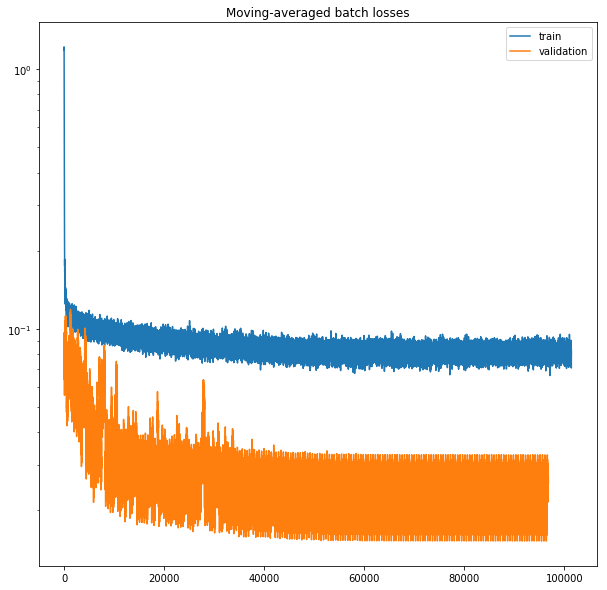

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

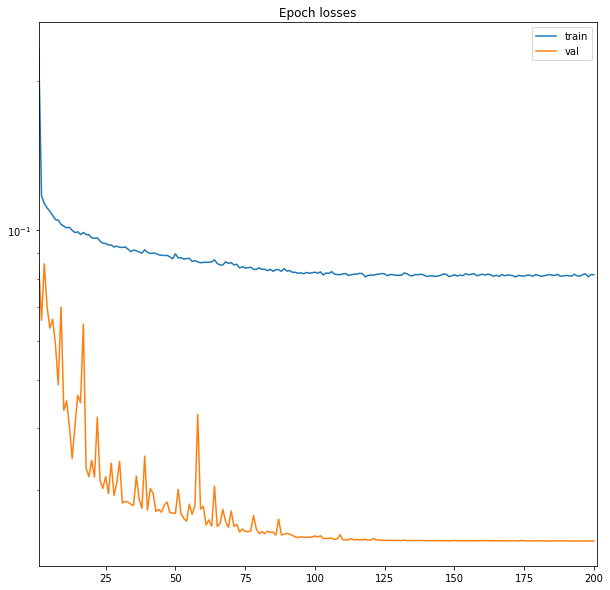

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [23]:
import os

In [24]:
import torch

In [25]:
from visualization_utils import output_to_binary, plot_sample

In [26]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

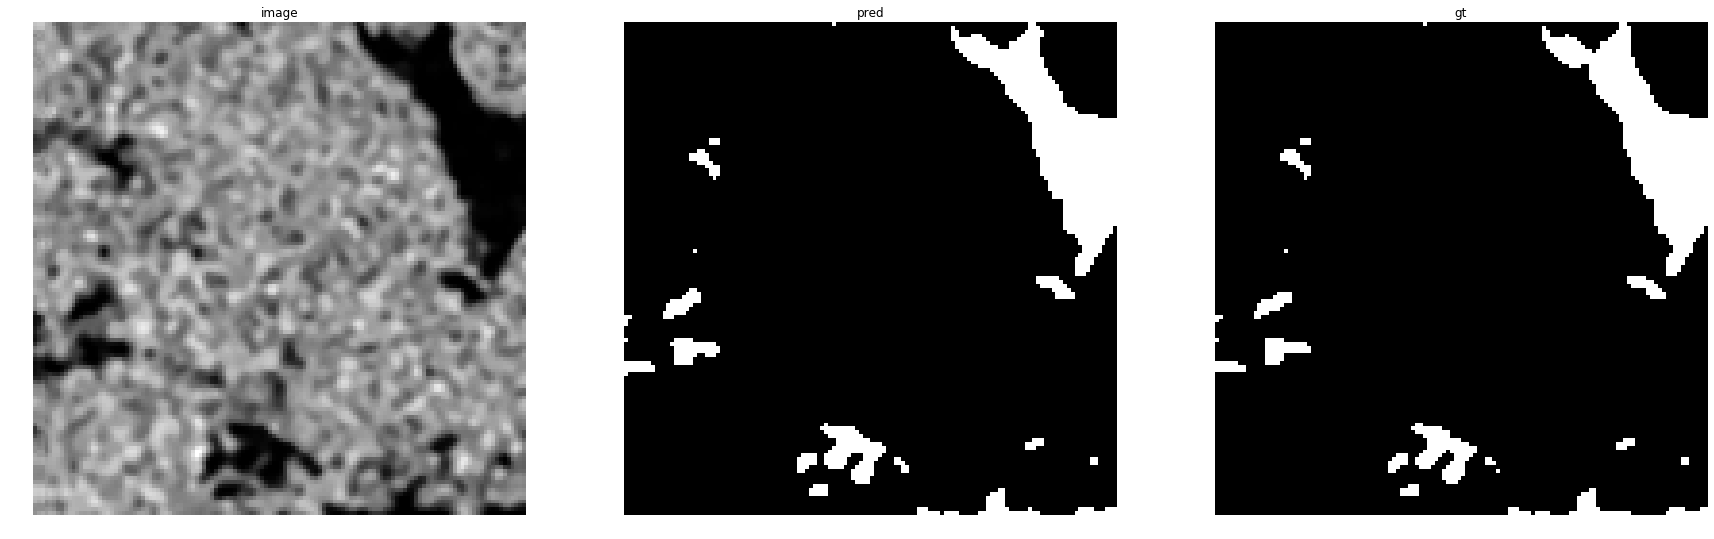

accuracy    : 0.99652099609375
precision   : 0.9617524339360223
recall      : 0.9985559566787003
f1          : 0.9798087141339
pr_auc      : 0.9991033122273809
iou         : 0.9604166666666667


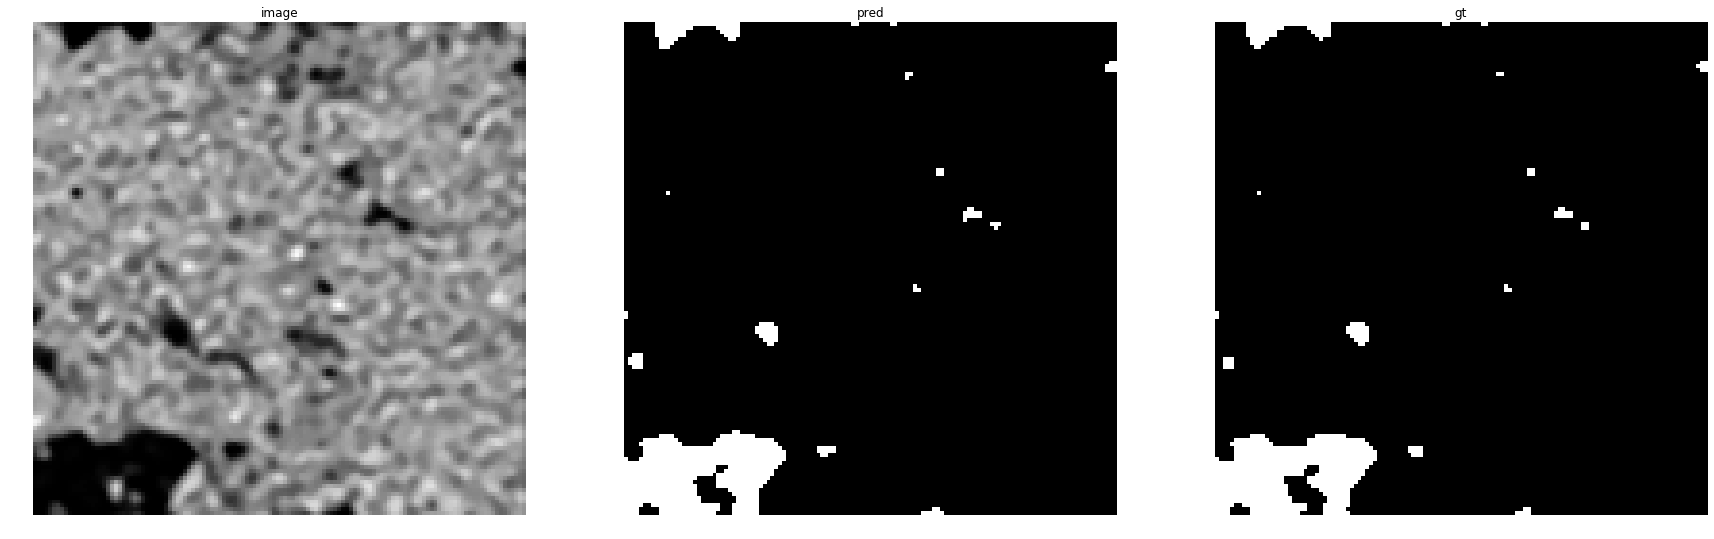

accuracy    : 0.99798583984375
precision   : 0.9627403846153846
recall      : 0.9975093399750934
f1          : 0.9798165137614678
pr_auc      : 0.9992509961835077
iou         : 0.960431654676259


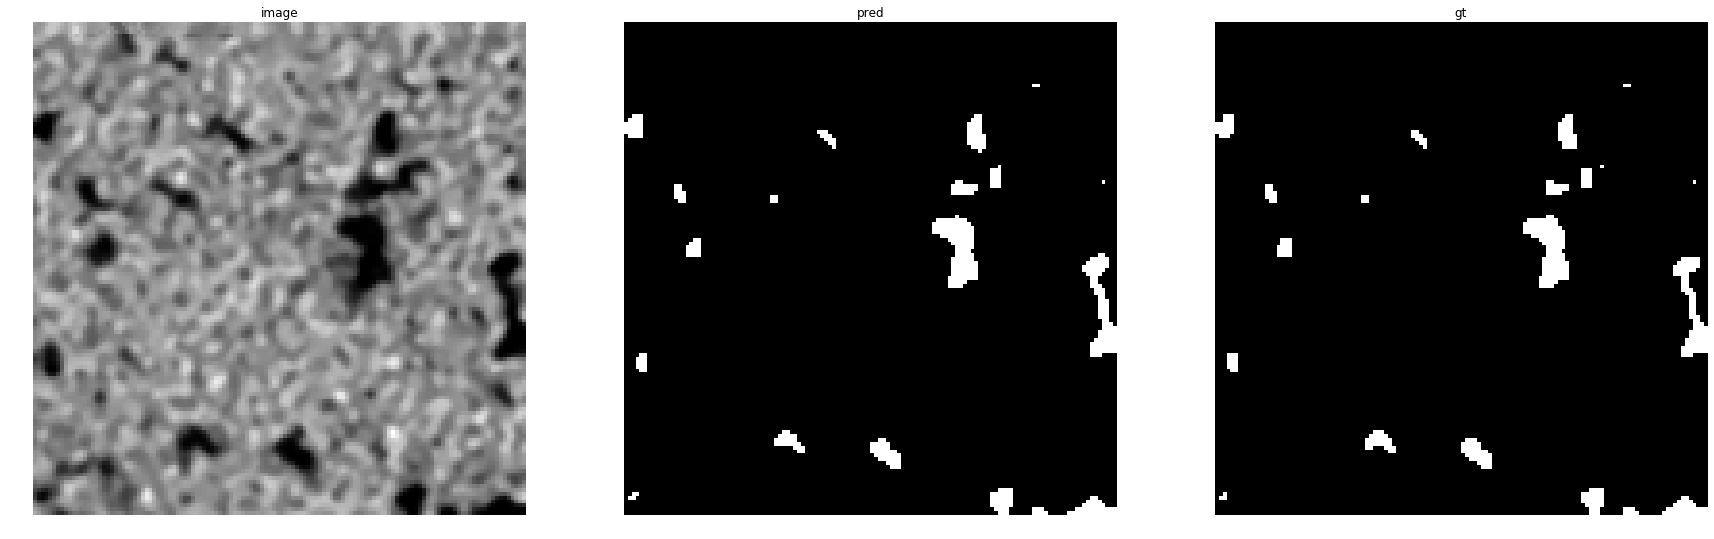

accuracy    : 0.99774169921875
precision   : 0.9522935779816514
recall      : 0.9792452830188679
f1          : 0.9655813953488371
pr_auc      : 0.9969529694812118
iou         : 0.9334532374100719


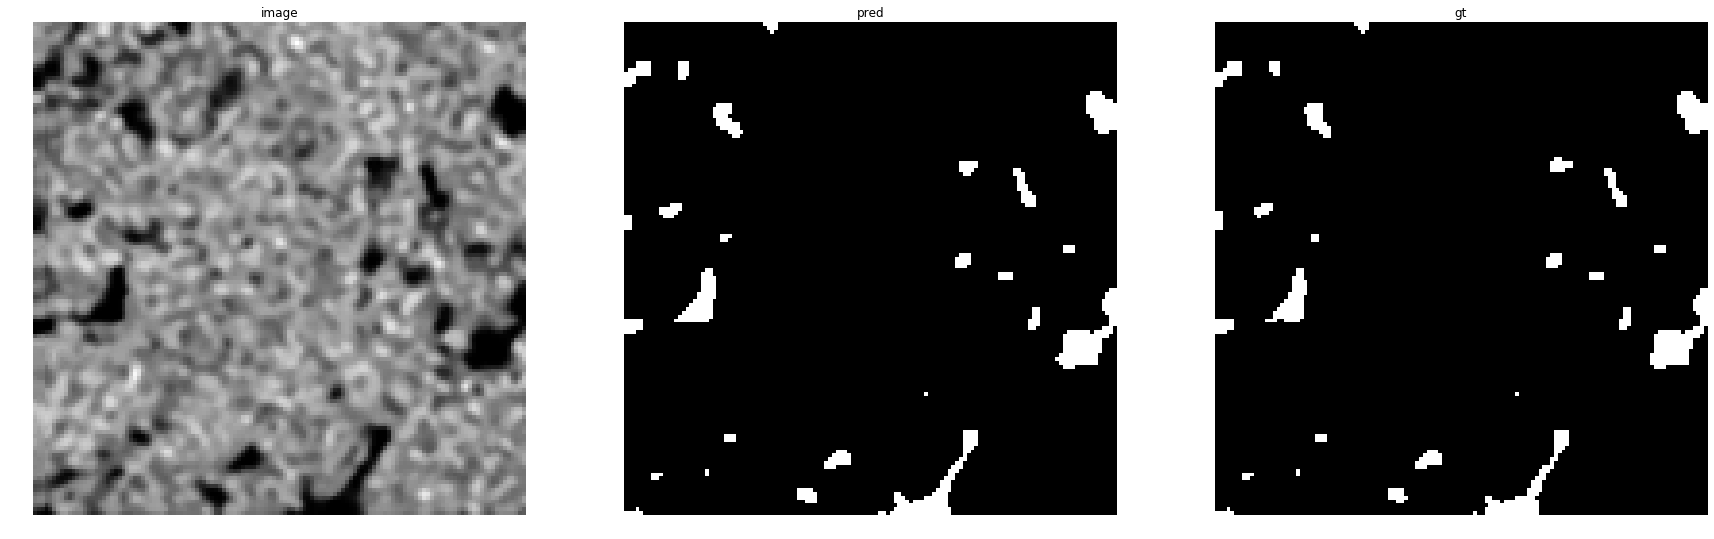

accuracy    : 0.99713134765625
precision   : 0.9410029498525073
recall      : 0.9891472868217054
f1          : 0.9644746787603931
pr_auc      : 0.9968231156048121
iou         : 0.9313868613138686


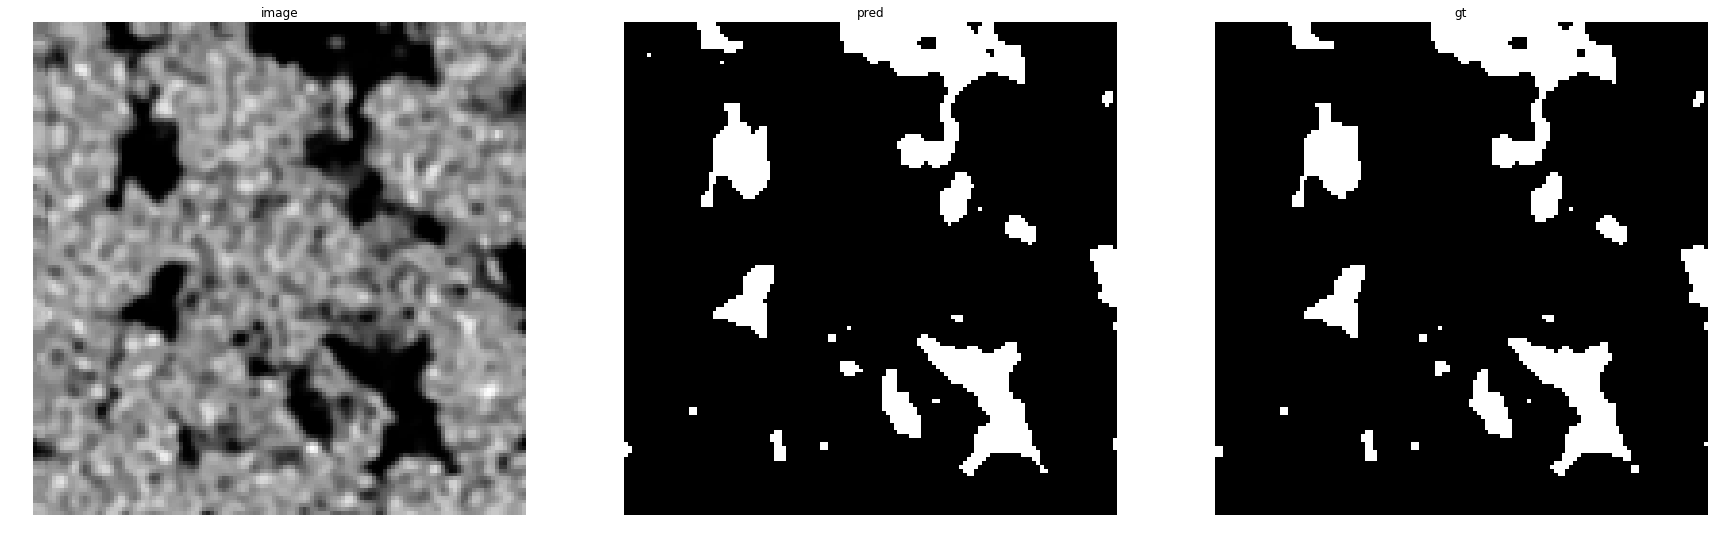

accuracy    : 0.99481201171875
precision   : 0.9654150197628458
recall      : 0.9923819197562215
f1          : 0.9787127473077887
pr_auc      : 0.9989837235082099
iou         : 0.9583128984796468


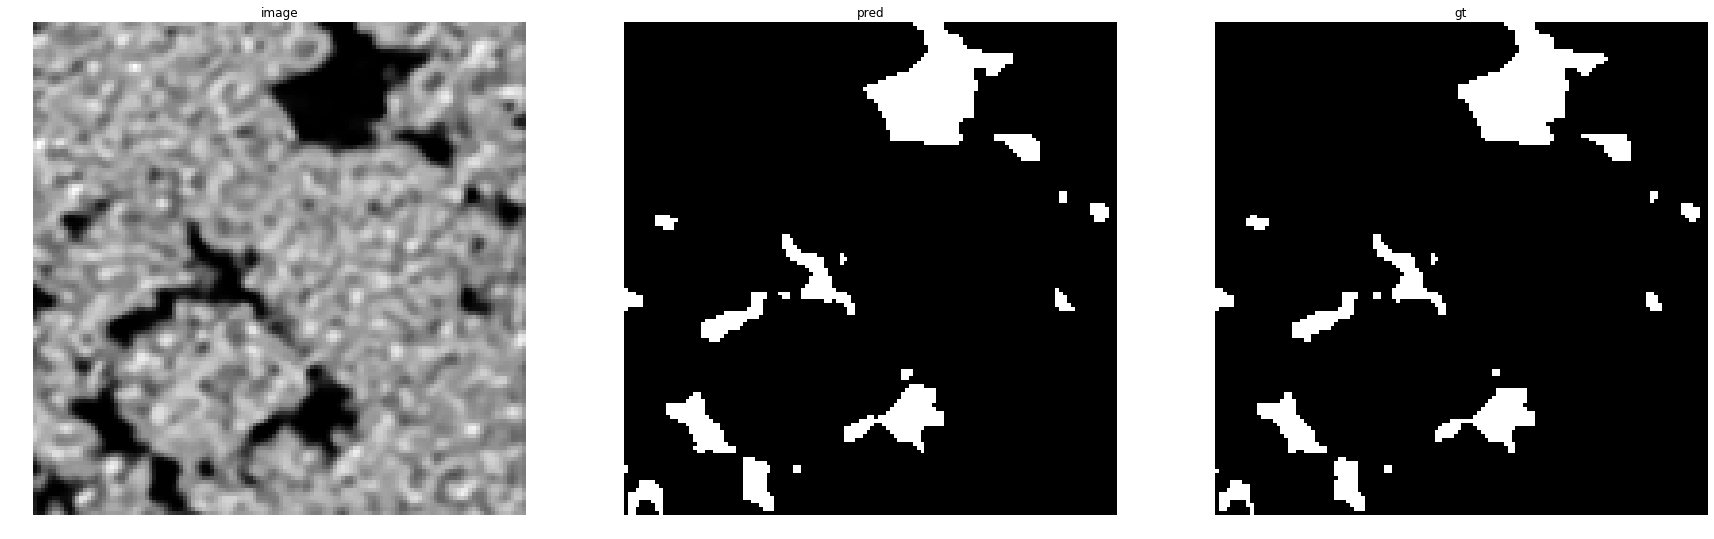

accuracy    : 0.99566650390625
precision   : 0.9573002754820936
recall      : 0.993566833452466
f1          : 0.9750964573833741
pr_auc      : 0.9988381846976881
iou         : 0.9514031485284052


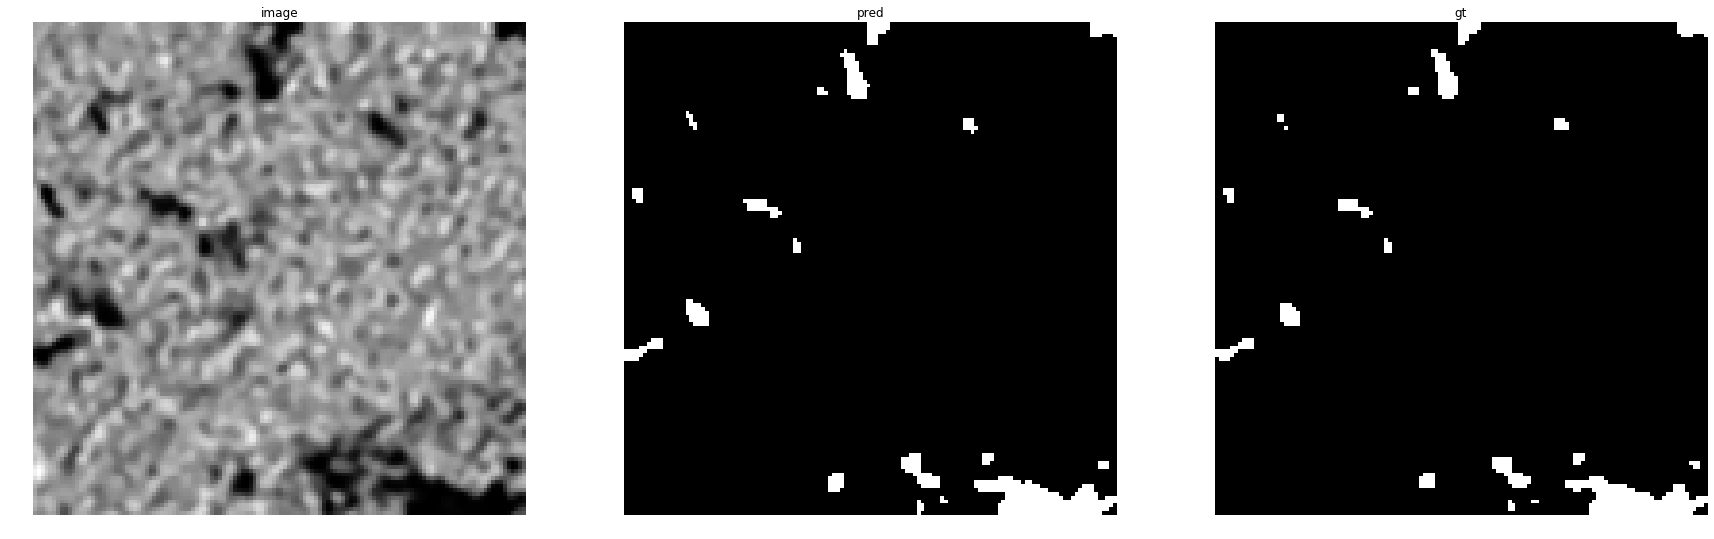

accuracy    : 0.99725341796875
precision   : 0.9324577861163227
recall      : 0.9822134387351779
f1          : 0.956689124157844
pr_auc      : 0.9961932846488413
iou         : 0.9169741697416974


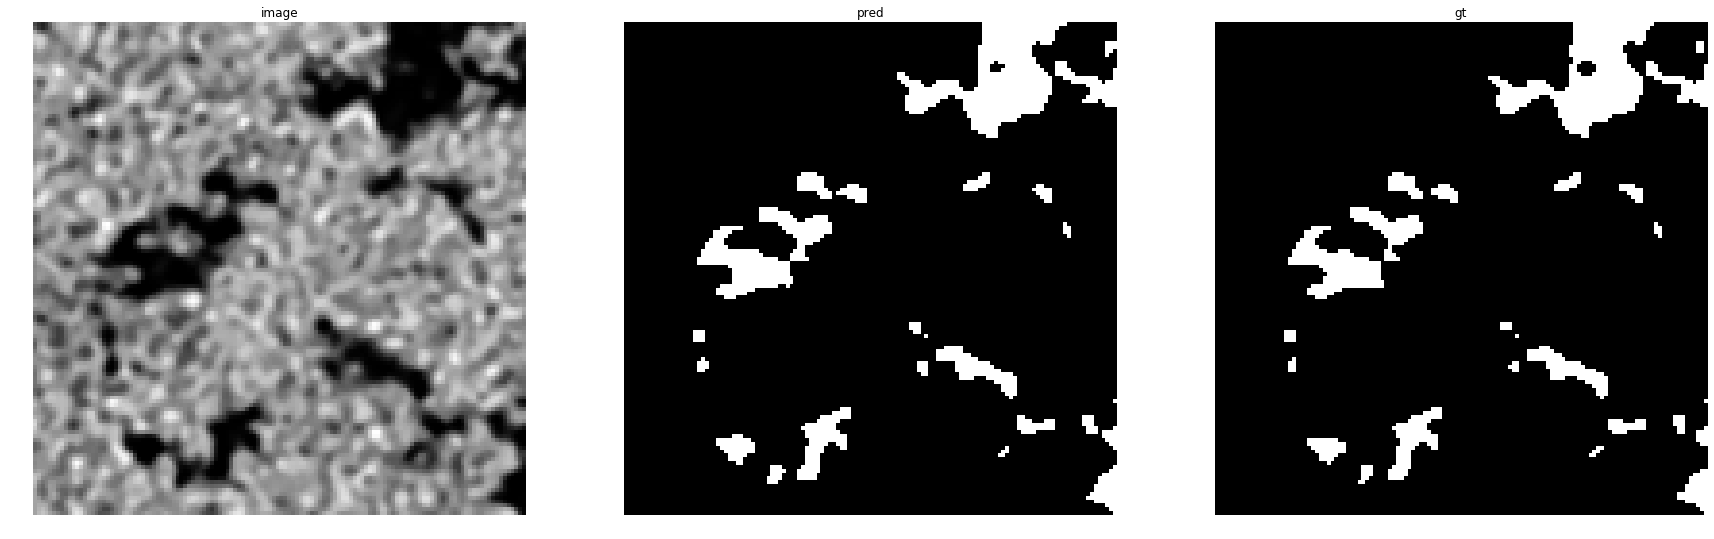

accuracy    : 0.9940185546875
precision   : 0.9446212603437301
recall      : 0.9926421404682274
f1          : 0.9680365296803652
pr_auc      : 0.9974521513220429
iou         : 0.9380530973451328


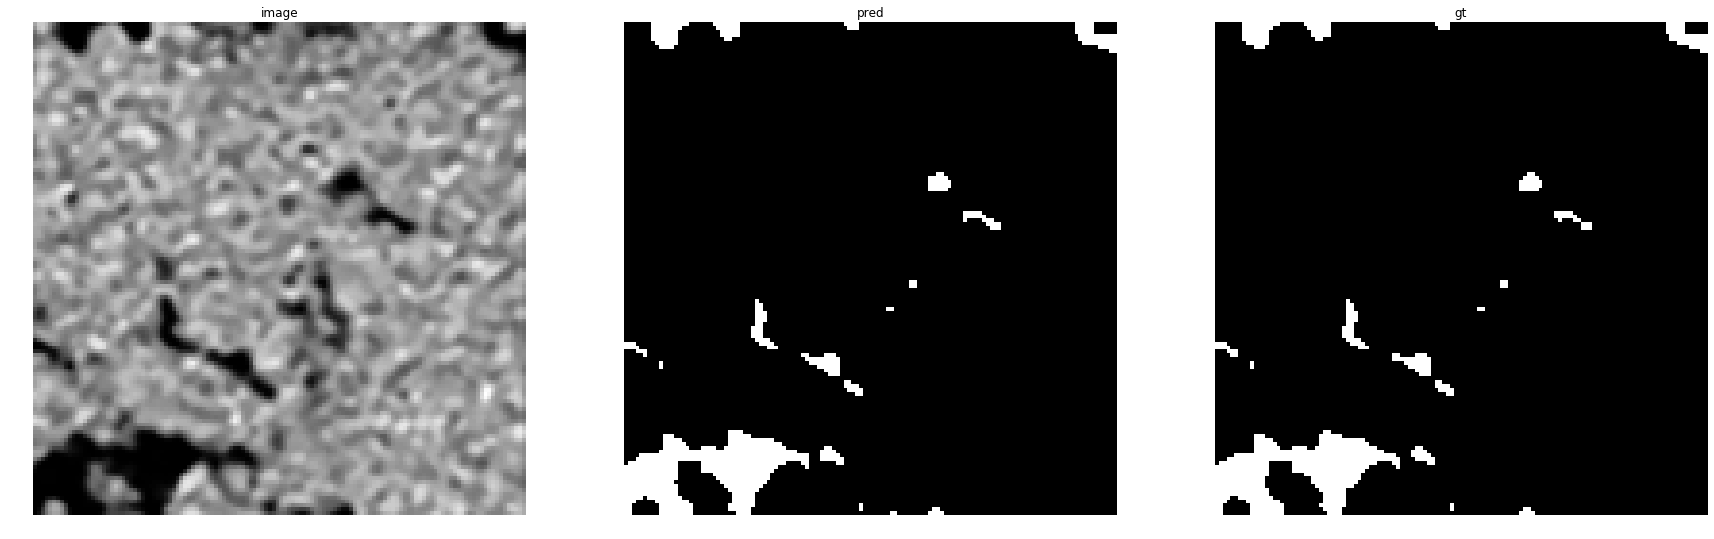

accuracy    : 0.9984130859375
precision   : 0.9730046948356808
recall      : 0.9963942307692307
f1          : 0.984560570071259
pr_auc      : 0.9992356561777597
iou         : 0.9695906432748538


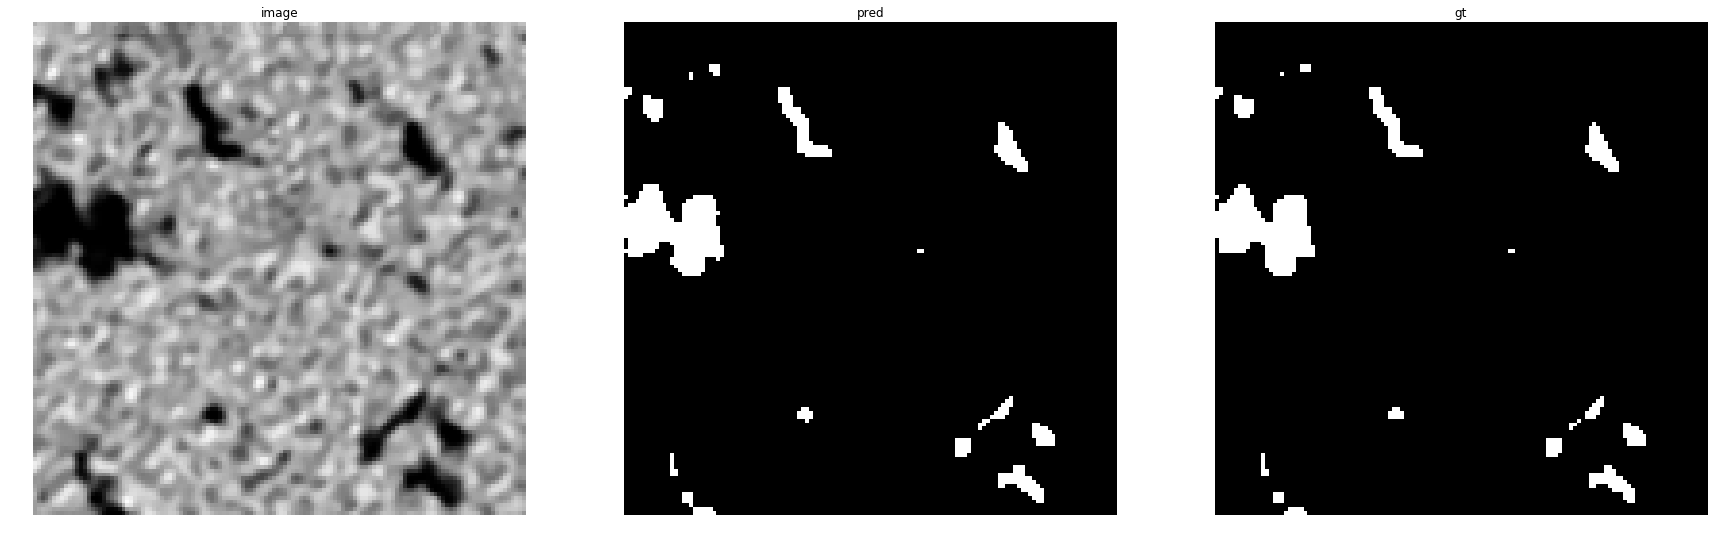

accuracy    : 0.99798583984375
precision   : 0.9551630434782609
recall      : 1.0
f1          : 0.9770674079221682
pr_auc      : 0.9988452200433326
iou         : 0.9551630434782609


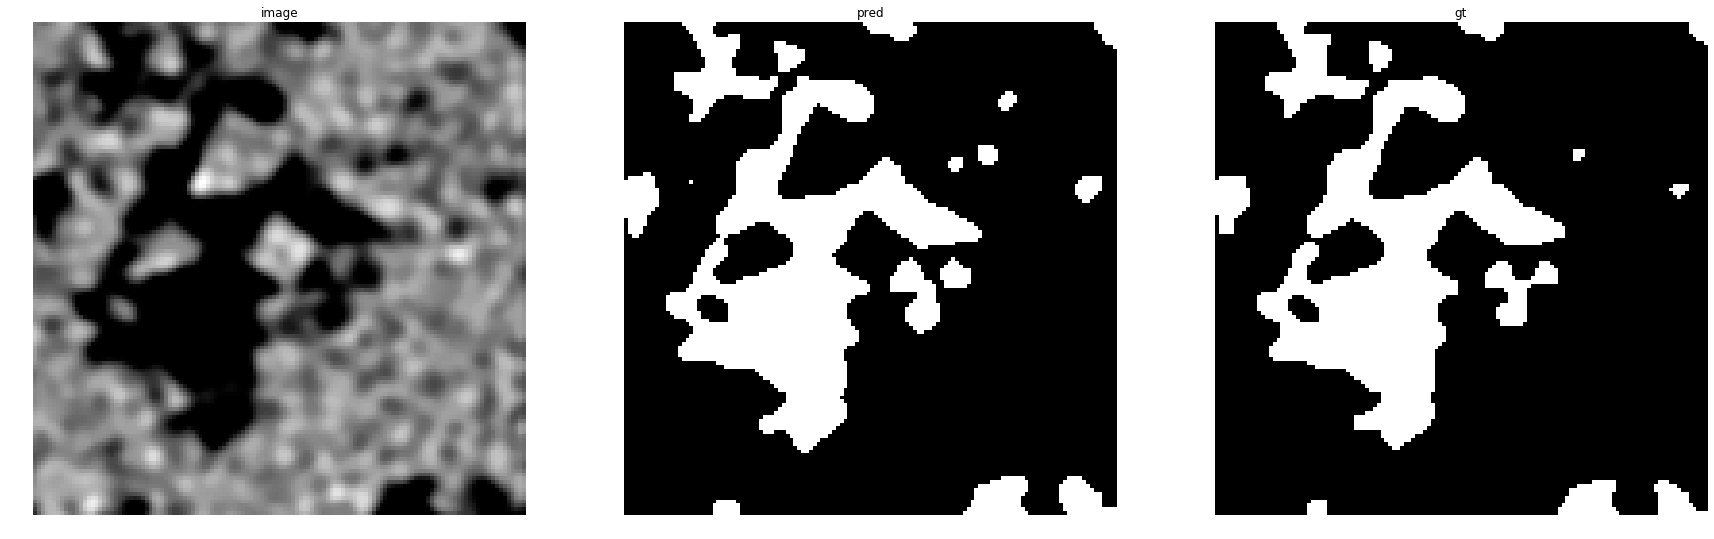

accuracy    : 0.98046875
precision   : 0.9228494623655914
recall      : 0.9904789382573572
f1          : 0.9554689674366824
pr_auc      : 0.9972026017045471
iou         : 0.9147348787636558


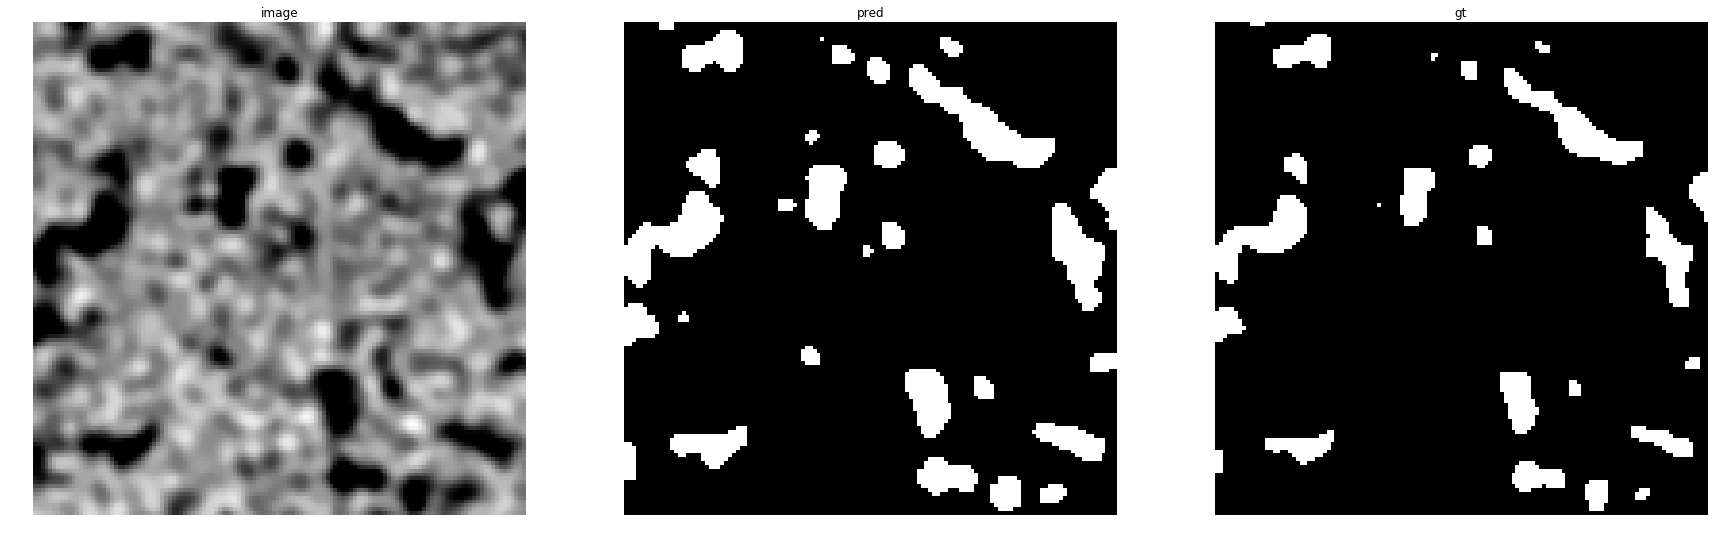

accuracy    : 0.9556884765625
precision   : 0.672234762979684
recall      : 1.0
f1          : 0.8039956803455724
pr_auc      : 0.9912529025989181
iou         : 0.672234762979684


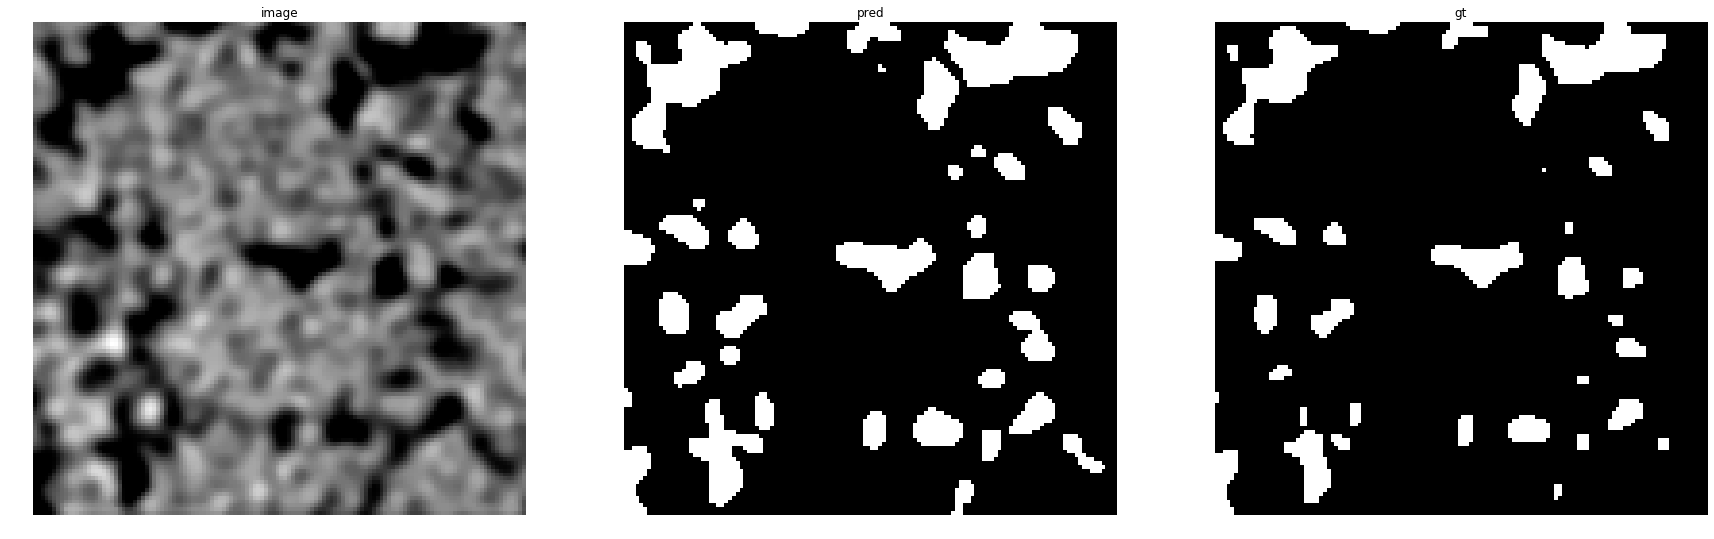

accuracy    : 0.9444580078125
precision   : 0.6745350500715308
recall      : 1.0
f1          : 0.8056386159760787
pr_auc      : 0.9910349417209036
iou         : 0.6745350500715308


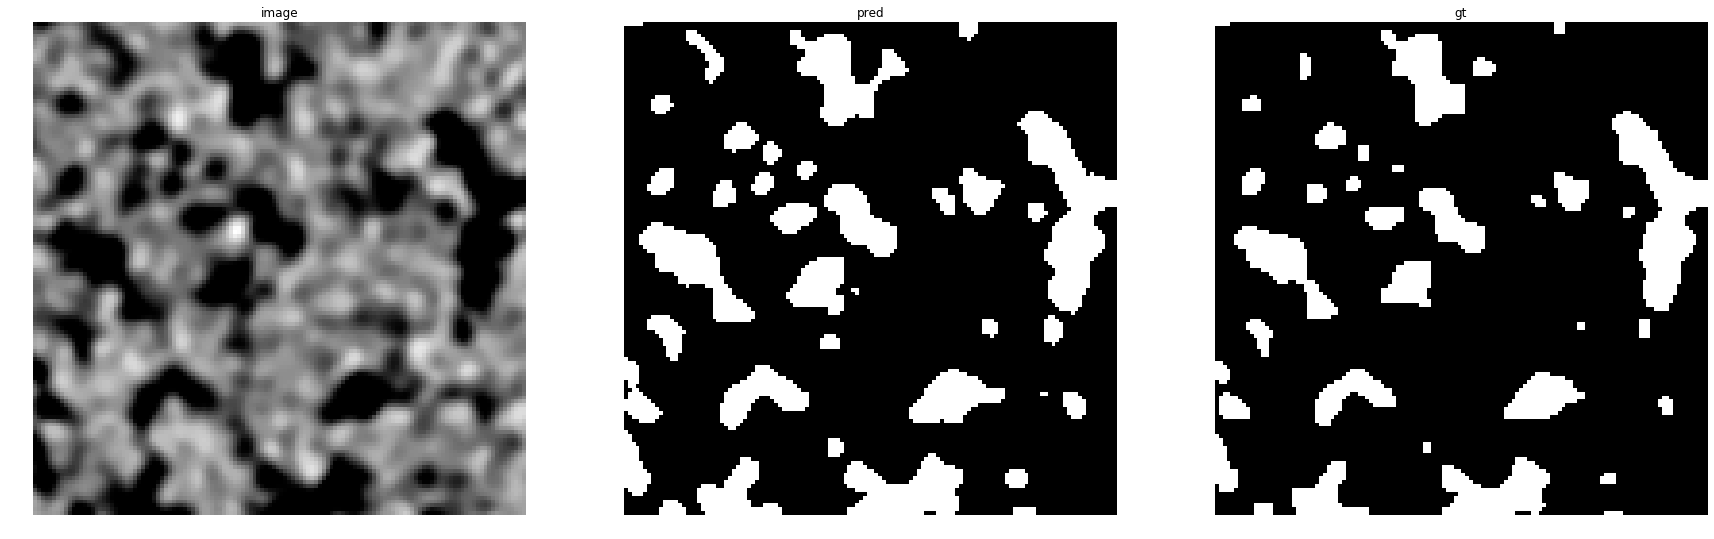

accuracy    : 0.95404052734375
precision   : 0.7784360189573459
recall      : 0.998101025446259
f1          : 0.874687968047928
pr_auc      : 0.9930622394968905
iou         : 0.7772848269742679


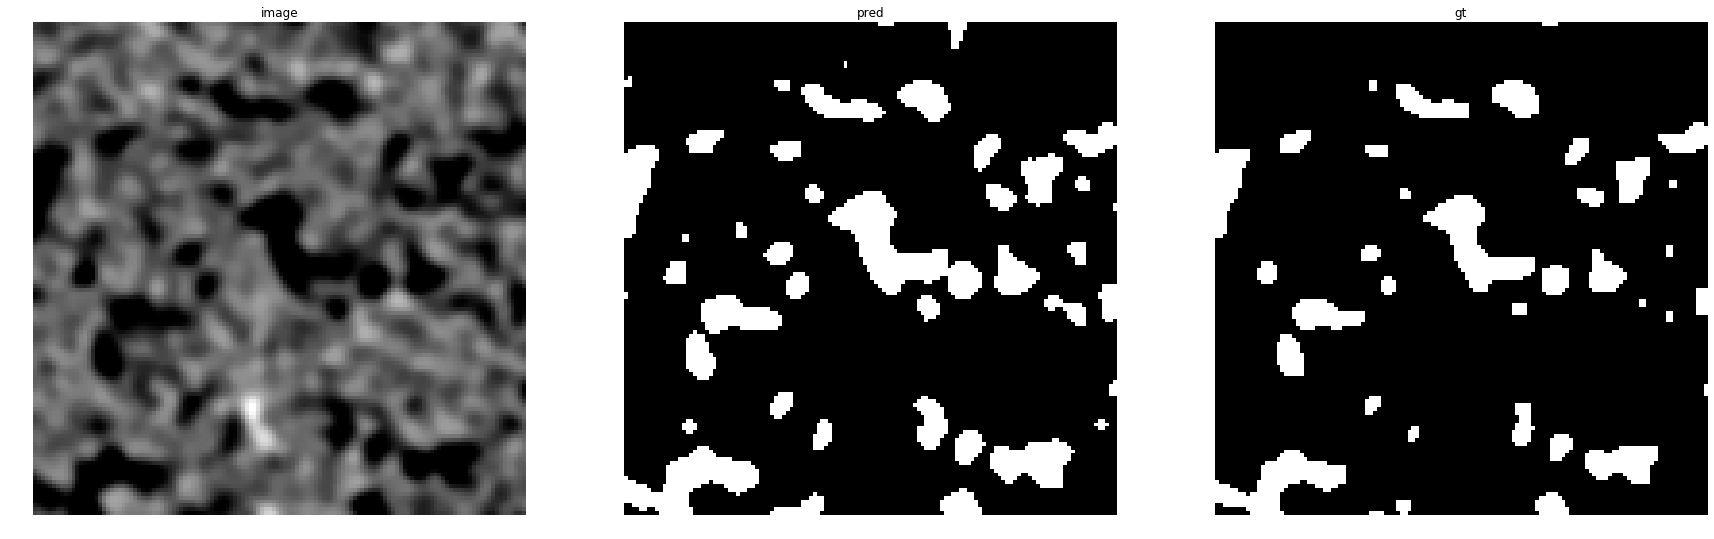

accuracy    : 0.95538330078125
precision   : 0.717391304347826
recall      : 0.9983792544570502
f1          : 0.8348768918003163
pr_auc      : 0.9838086629585535
iou         : 0.716556804963164


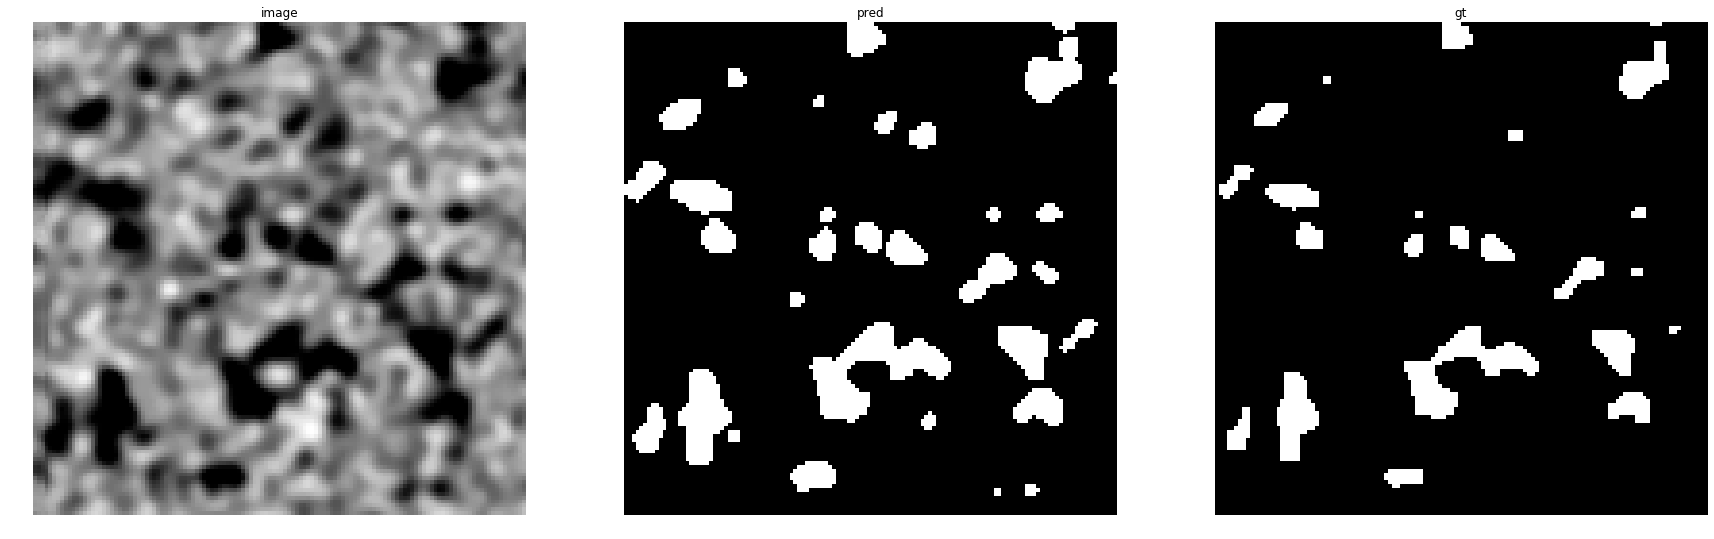

accuracy    : 0.95281982421875
precision   : 0.6203339882121808
recall      : 1.0
f1          : 0.7656865716883905
pr_auc      : 0.9858283956521344
iou         : 0.6203339882121808


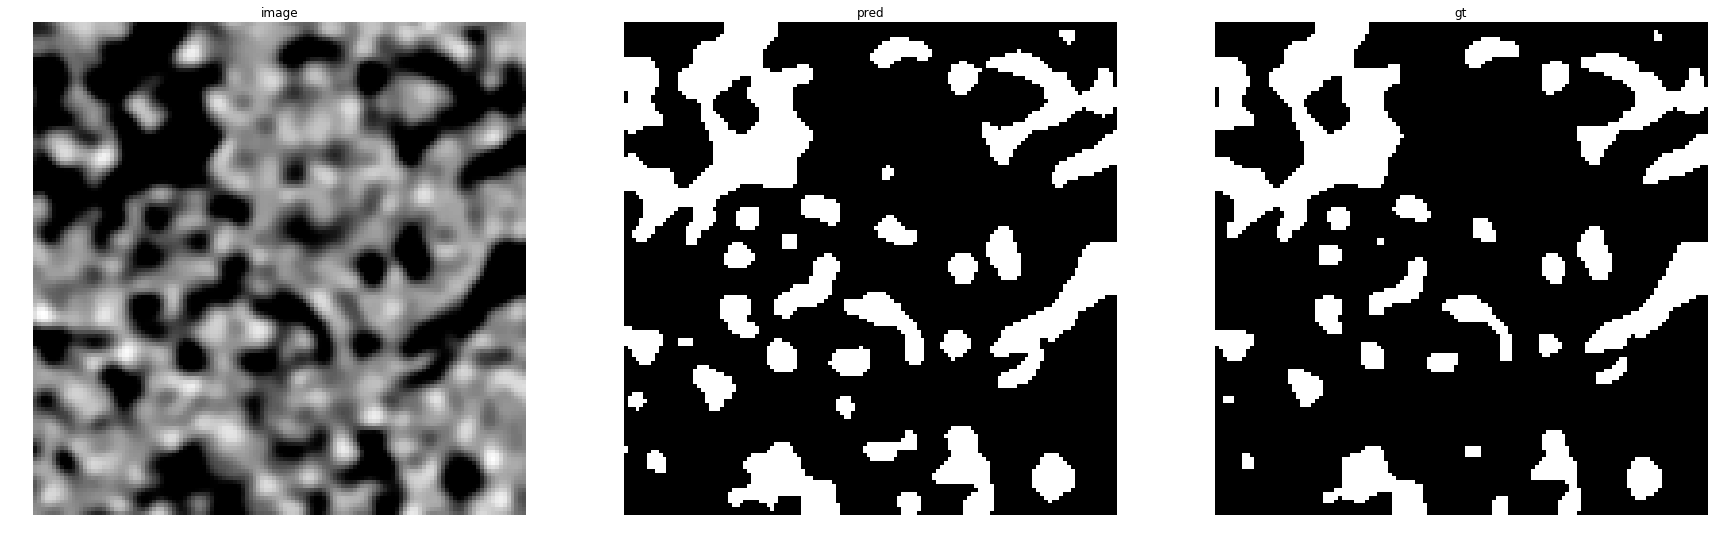

accuracy    : 0.95684814453125
precision   : 0.8394593312781599
recall      : 0.9915966386554622
f1          : 0.9092076537819445
pr_auc      : 0.9930845189366637
iou         : 0.8335295502707794


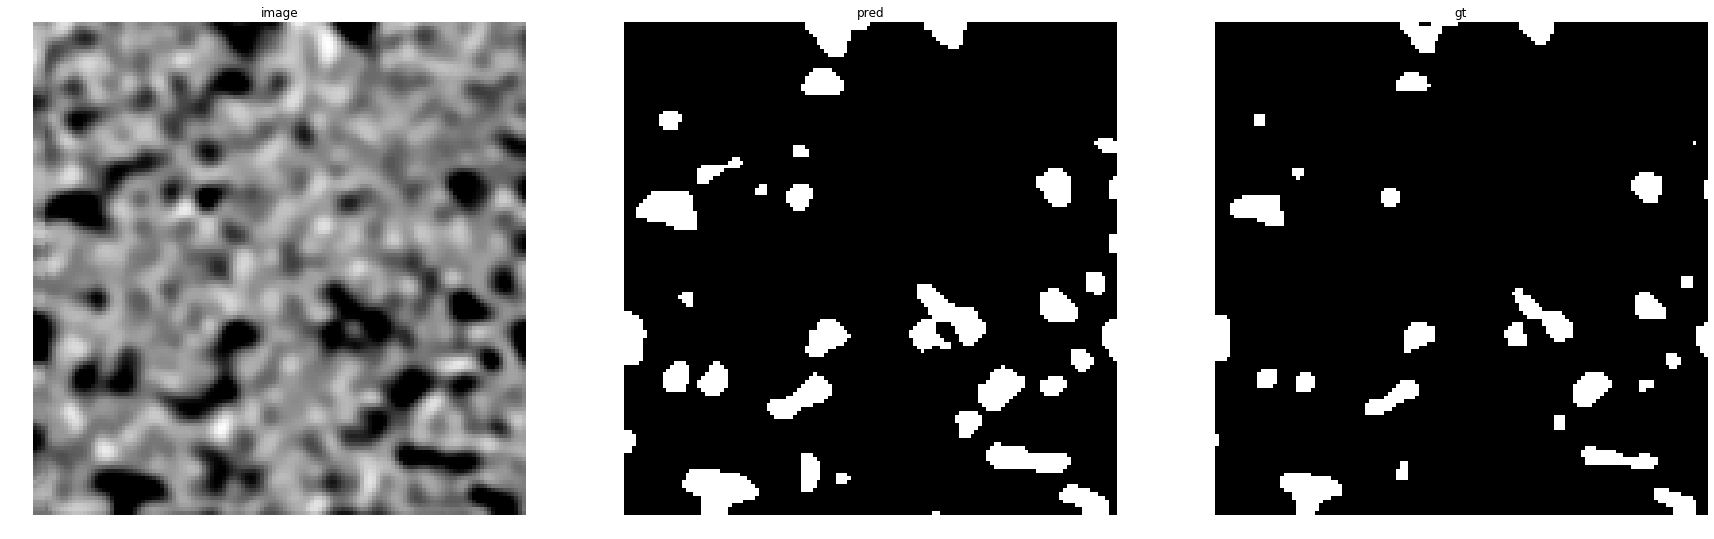

accuracy    : 0.95452880859375
precision   : 0.5861111111111111
recall      : 1.0
f1          : 0.7390542907180385
pr_auc      : 0.9839611760778852
iou         : 0.5861111111111111


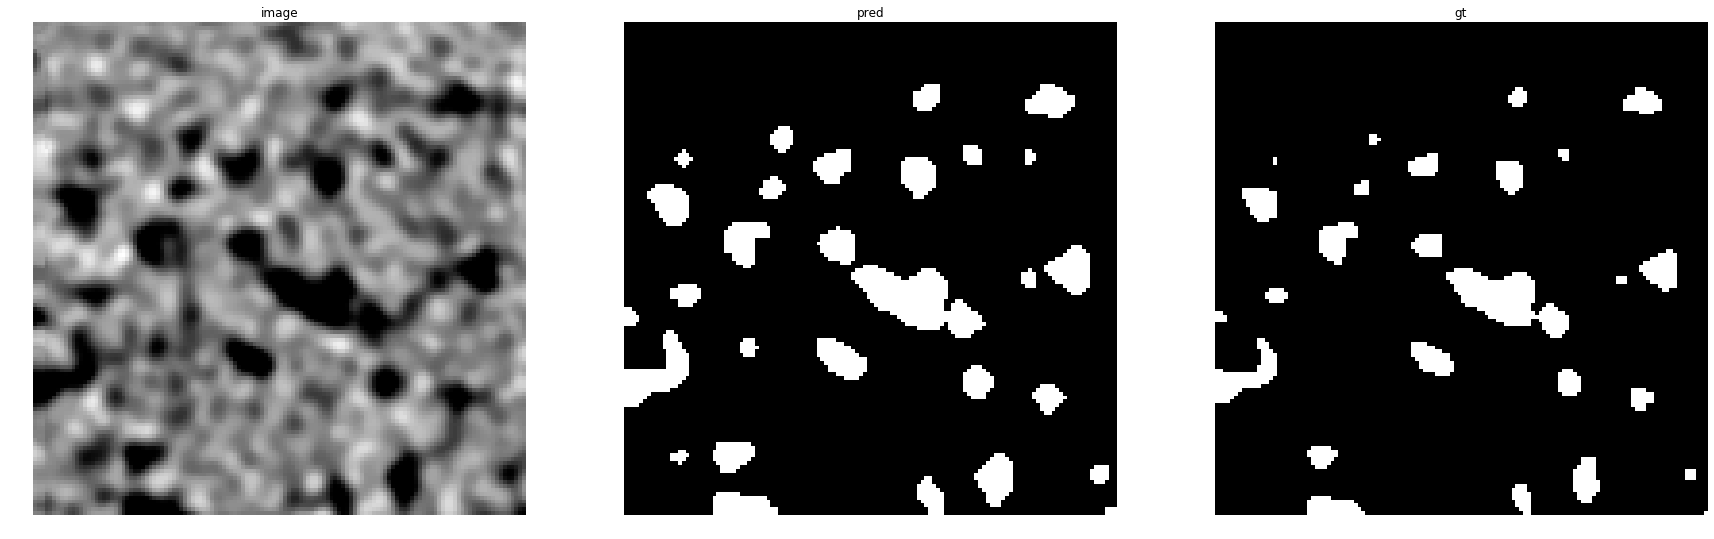

accuracy    : 0.96002197265625
precision   : 0.6476600322754169
recall      : 1.0
f1          : 0.7861573620633366
pr_auc      : 0.9902580232314756
iou         : 0.6476600322754169


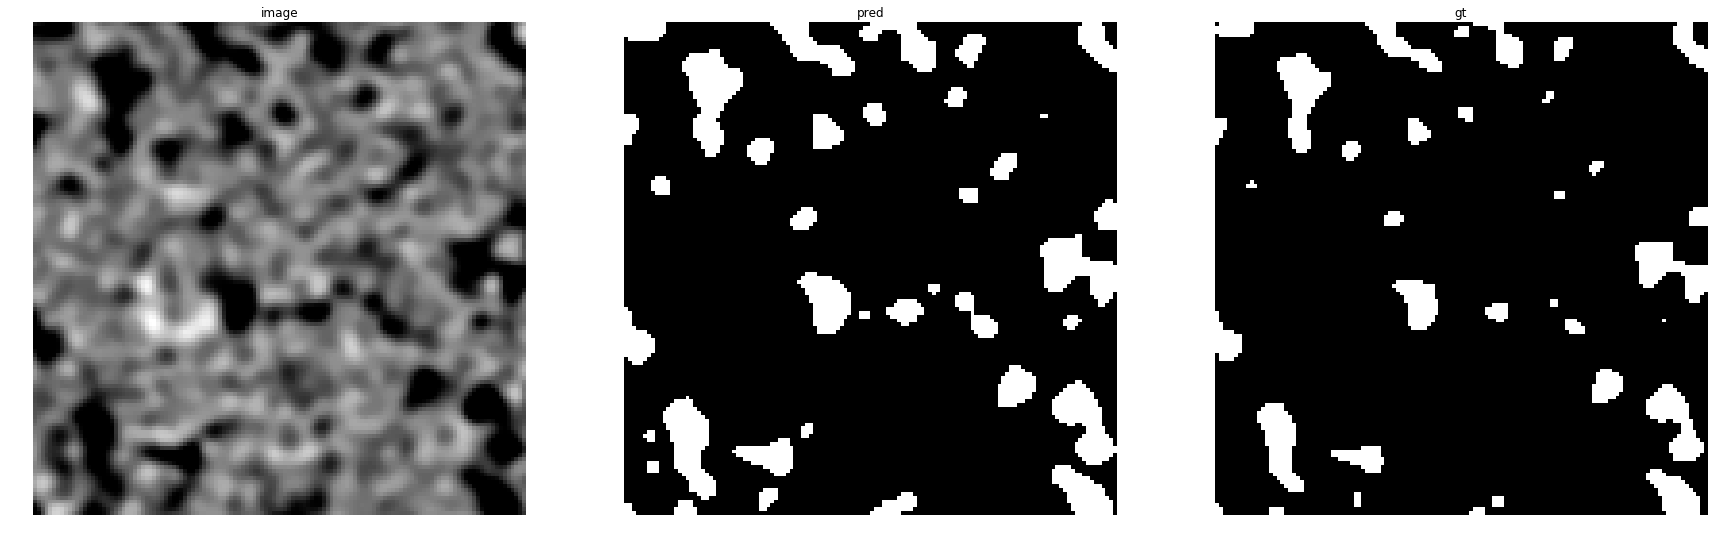

accuracy    : 0.9505615234375
precision   : 0.6582278481012658
recall      : 1.0
f1          : 0.7938931297709924
pr_auc      : 0.9905746131058591
iou         : 0.6582278481012658


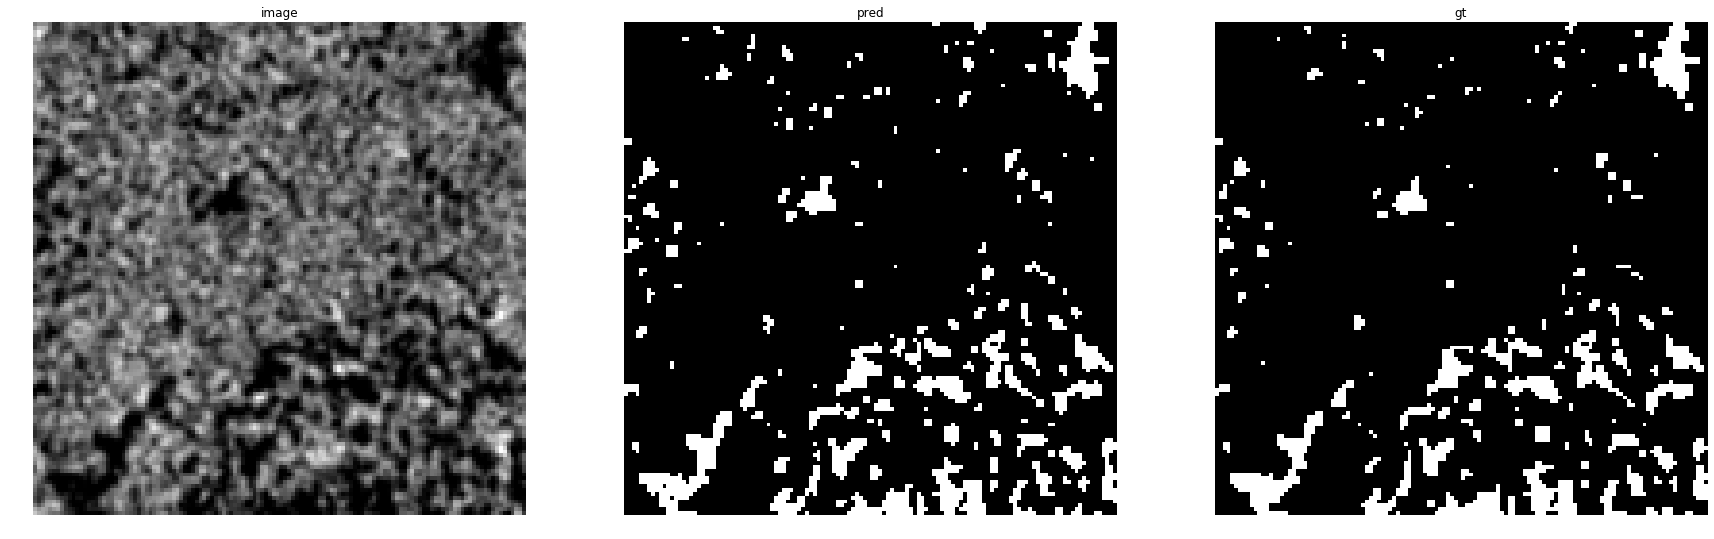

accuracy    : 0.98138427734375
precision   : 0.8687807545106616
recall      : 0.9607013301088271
f1          : 0.9124318116566179
pr_auc      : 0.9830788118126116
iou         : 0.8389651531151003


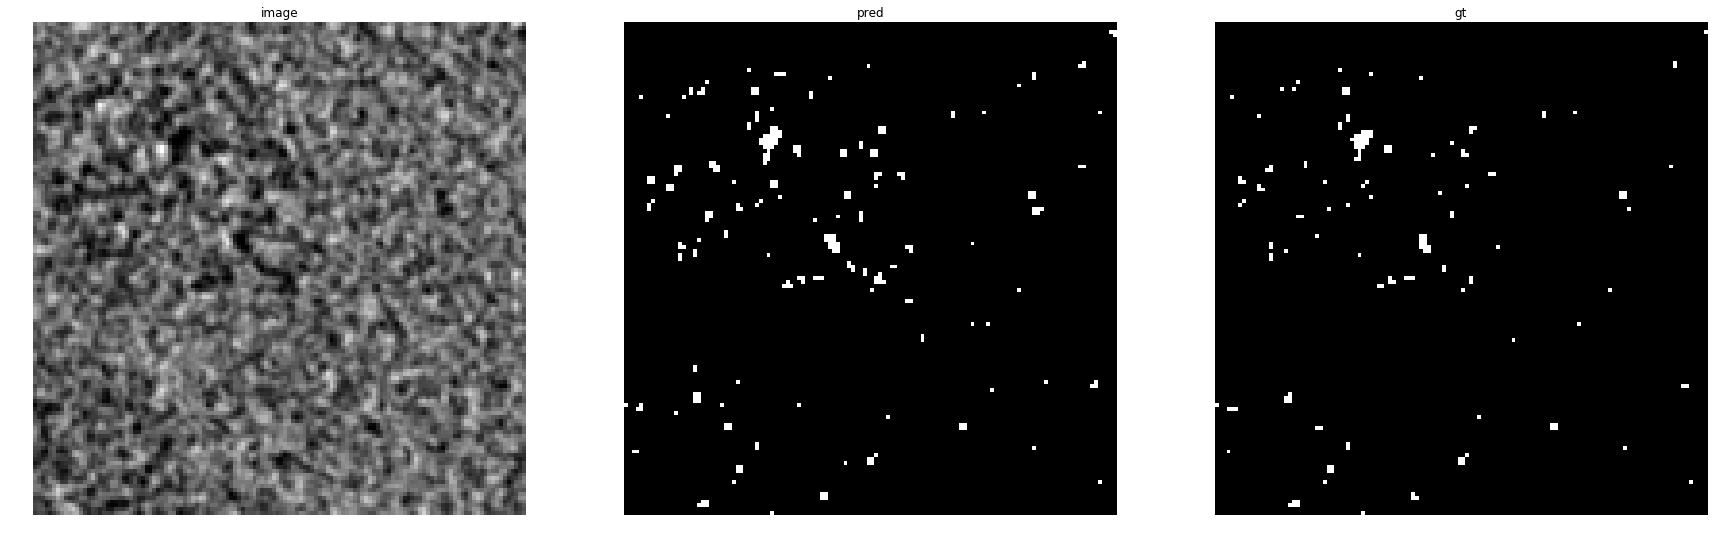

accuracy    : 0.993408203125
precision   : 0.6102941176470589
recall      : 0.9880952380952381
f1          : 0.7545454545454546
pr_auc      : 0.9575966712054155
iou         : 0.6058394160583942


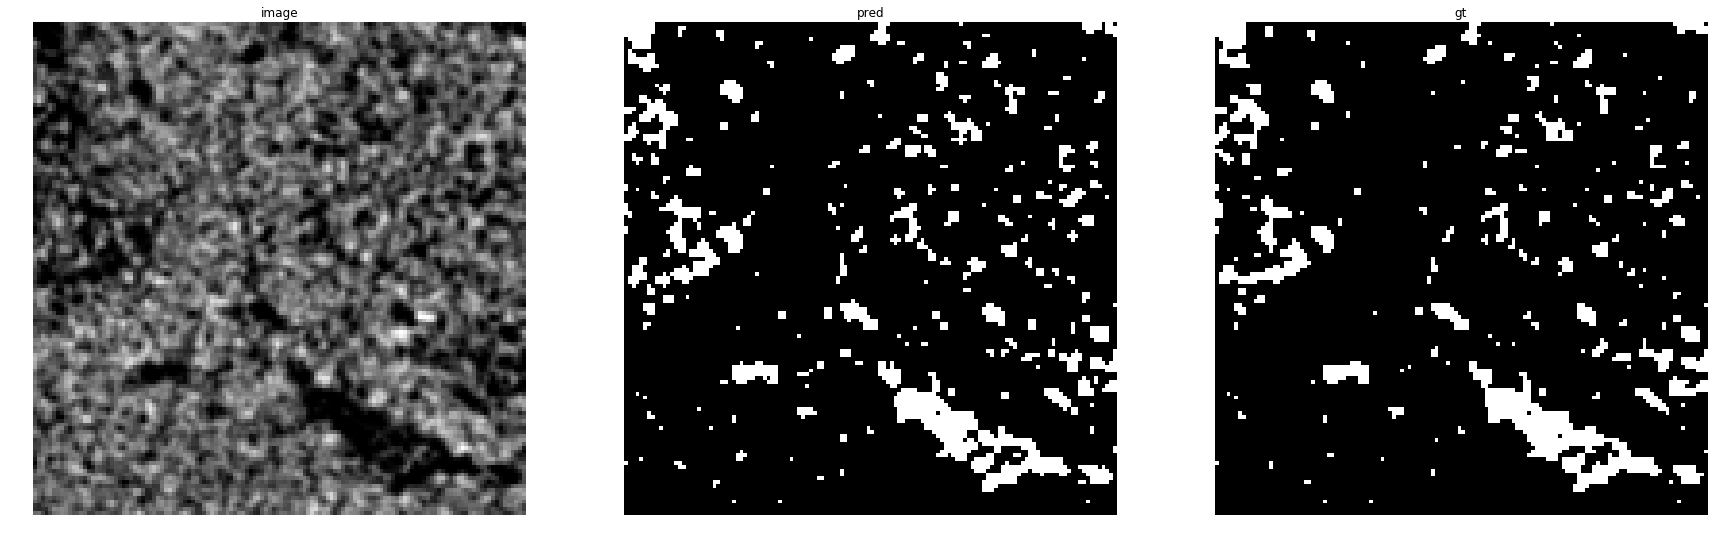

accuracy    : 0.97760009765625
precision   : 0.8603628367234745
recall      : 0.932657926102503
f1          : 0.8950529024878467
pr_auc      : 0.9750821110271626
iou         : 0.8100414078674948


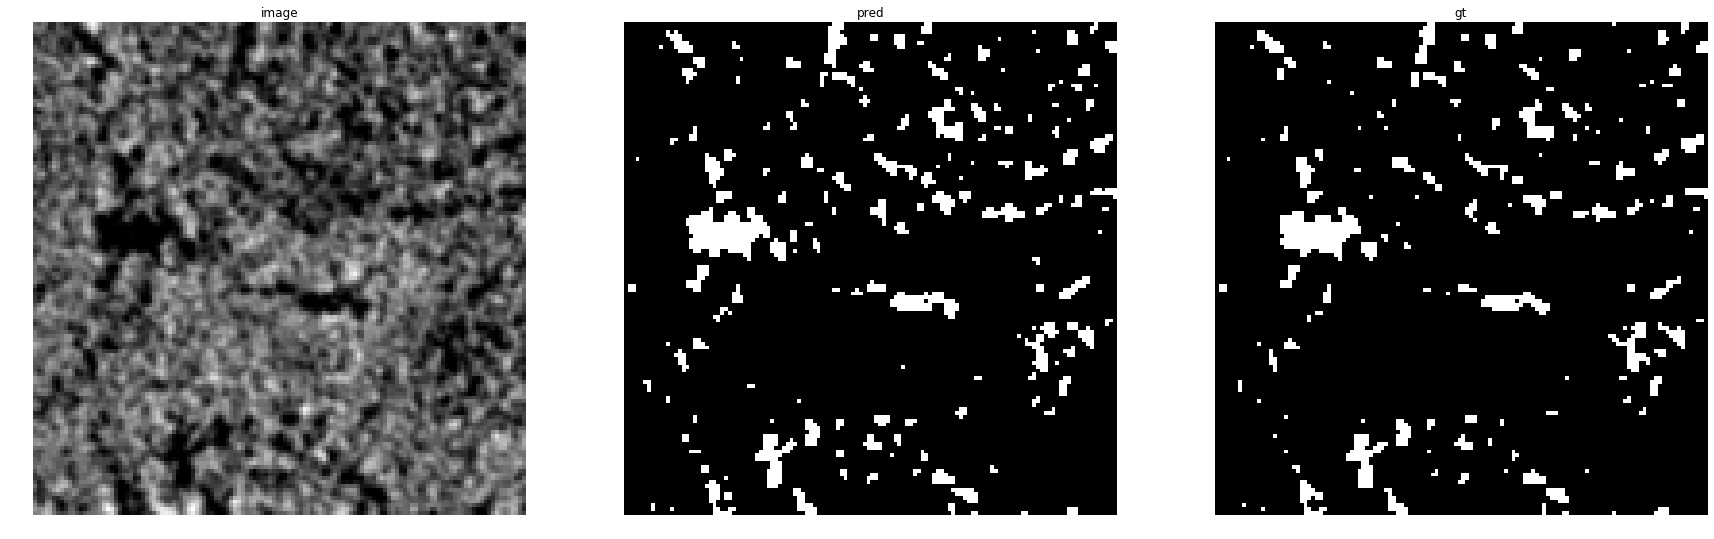

accuracy    : 0.9815673828125
precision   : 0.8200836820083682
recall      : 0.9639344262295082
f1          : 0.8862094951017333
pr_auc      : 0.9801590945473393
iou         : 0.7956698240866035


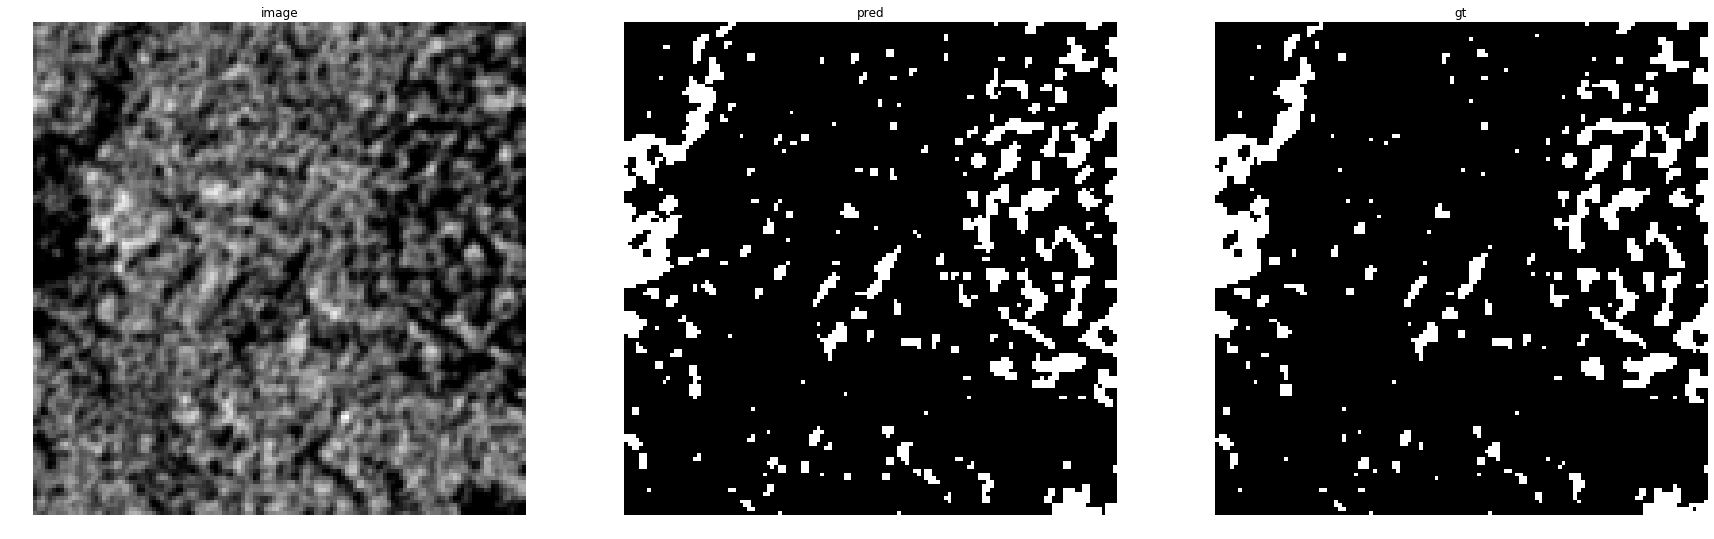

accuracy    : 0.977294921875
precision   : 0.8785780240073869
recall      : 0.9458250497017893
f1          : 0.9109621828626137
pr_auc      : 0.9793878926481417
iou         : 0.8364835164835165


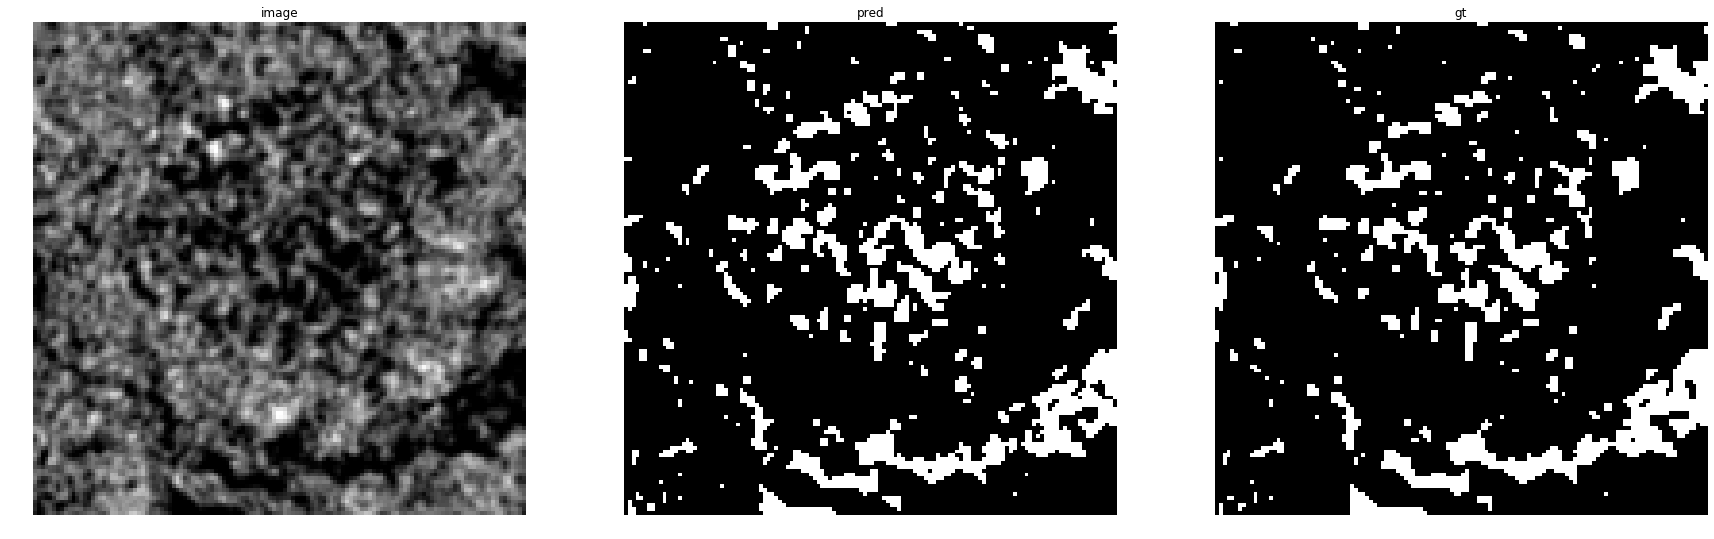

accuracy    : 0.97552490234375
precision   : 0.8855661881977671
recall      : 0.9511777301927195
f1          : 0.9172000825934338
pr_auc      : 0.9835496655745434
iou         : 0.8470633104500381


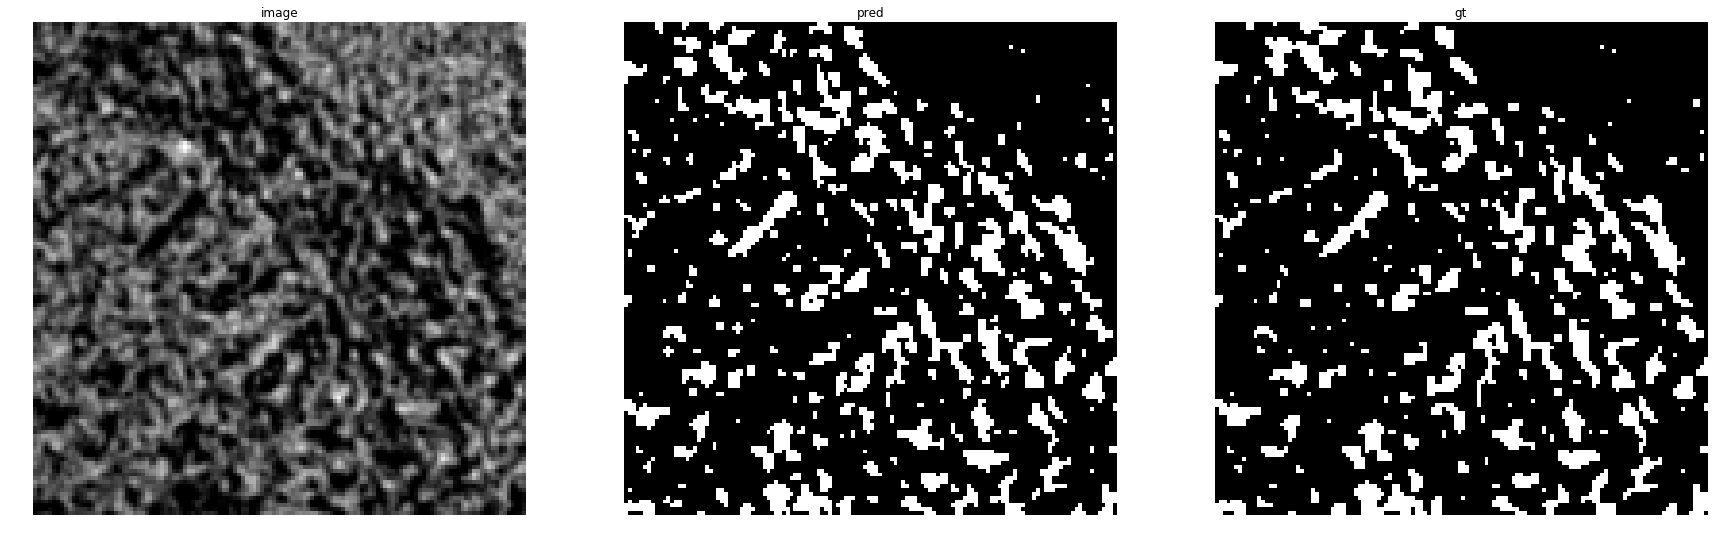

accuracy    : 0.9686279296875
precision   : 0.8867262284620293
recall      : 0.9458815520762424
f1          : 0.9153491436100132
pr_auc      : 0.9816453586801297
iou         : 0.8439113270573945


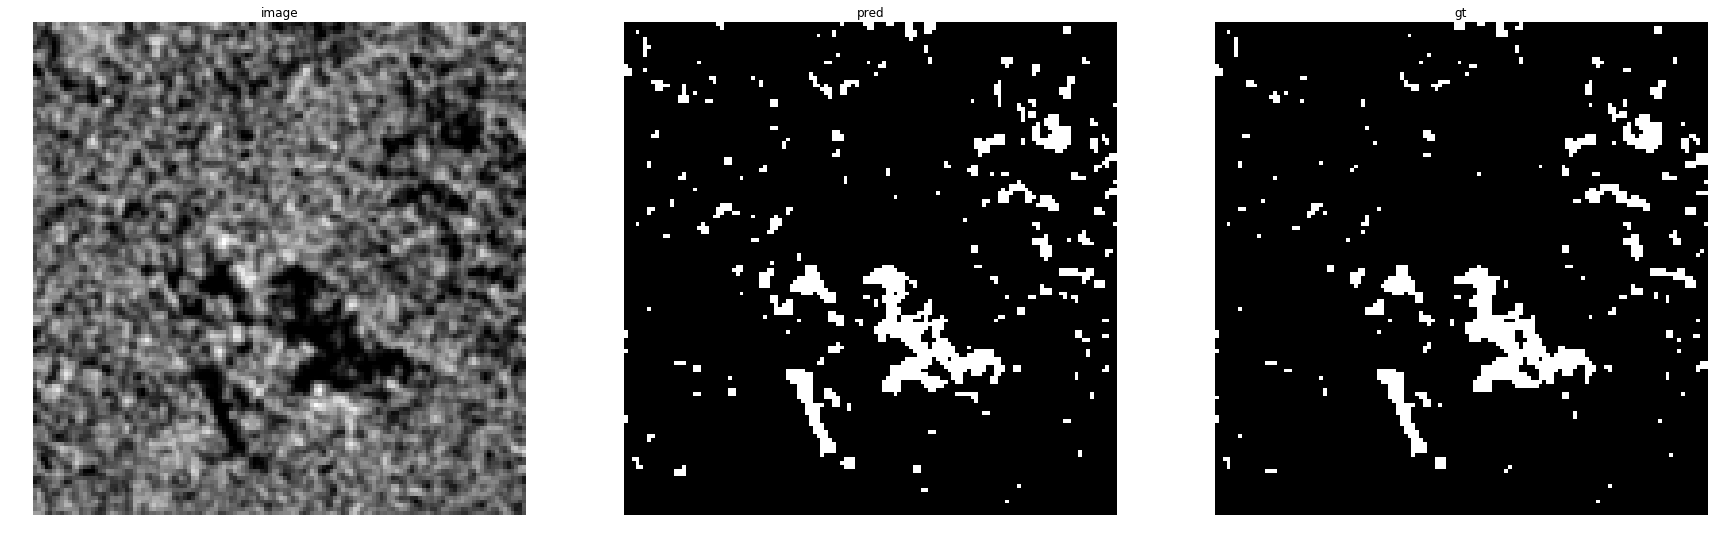

accuracy    : 0.98260498046875
precision   : 0.8307332293291732
recall      : 0.9399823477493381
f1          : 0.8819875776397516
pr_auc      : 0.9734590886193695
iou         : 0.7888888888888889


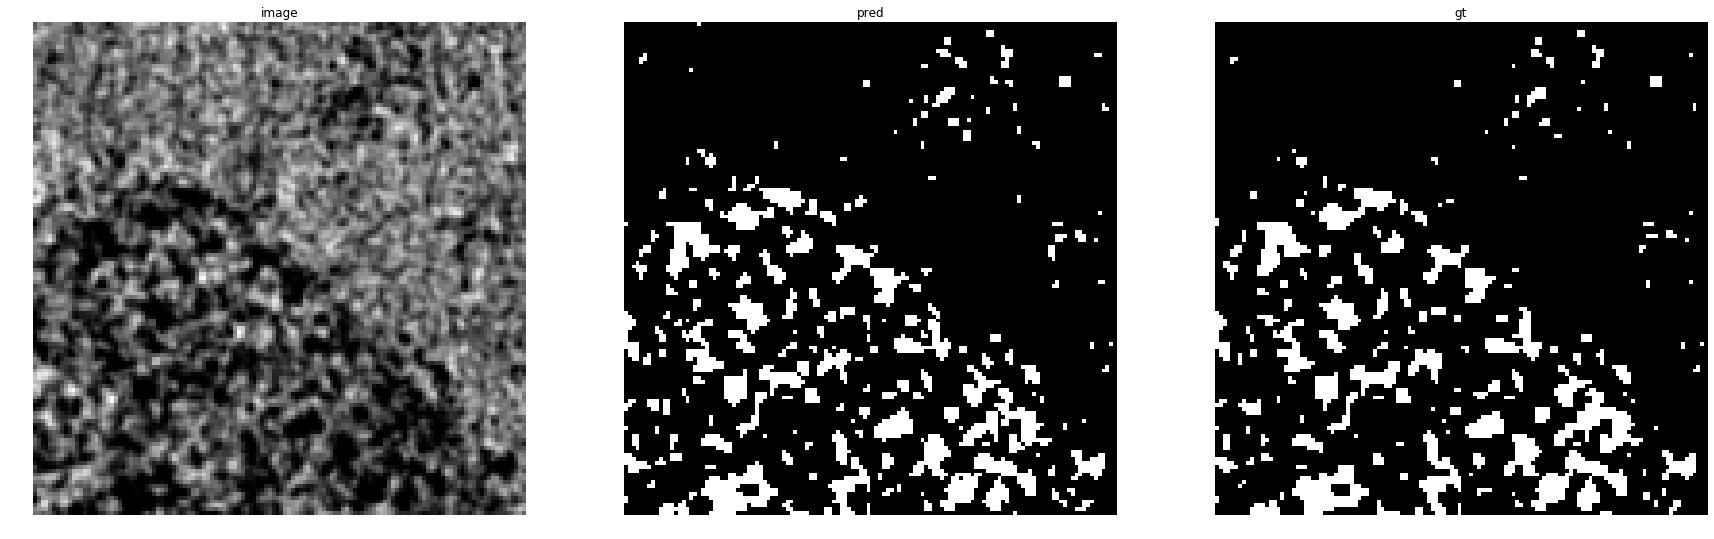

accuracy    : 0.97784423828125
precision   : 0.8859920459566947
recall      : 0.9502369668246445
f1          : 0.9169906242853876
pr_auc      : 0.9828518243432625
iou         : 0.846706081081081


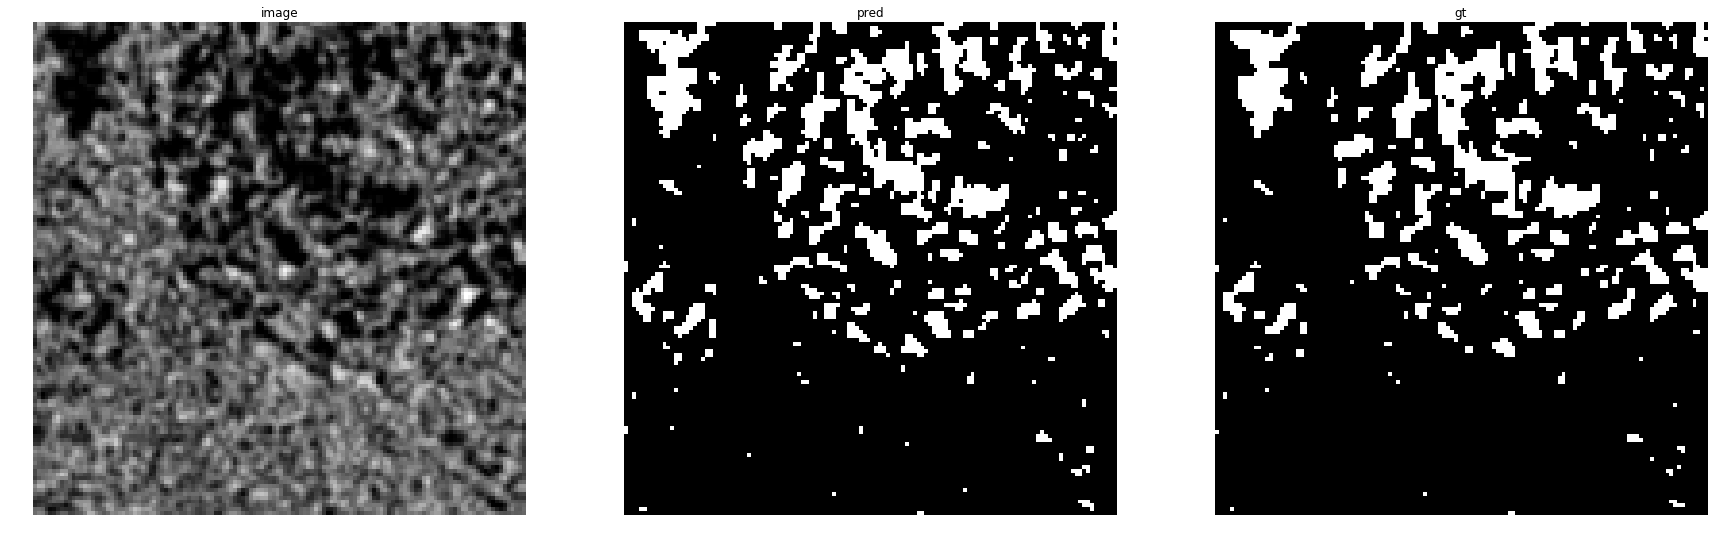

accuracy    : 0.9766845703125
precision   : 0.889967637540453
recall      : 0.9523809523809523
f1          : 0.9201171058134672
pr_auc      : 0.9858741698286715
iou         : 0.8520526723470179


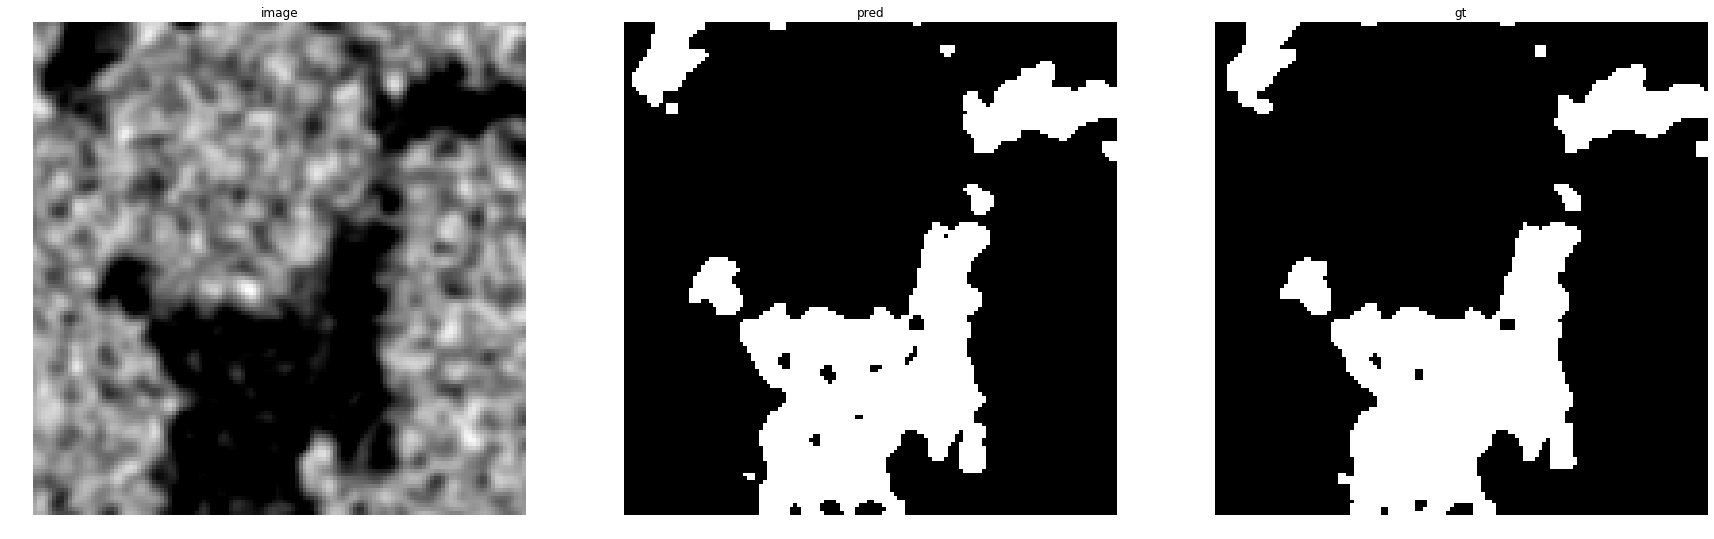

accuracy    : 0.98486328125
precision   : 0.9642394402694999
recall      : 0.9712868702688593
f1          : 0.9677503250975292
pr_auc      : 0.9971341667662572
iou         : 0.9375157470395565


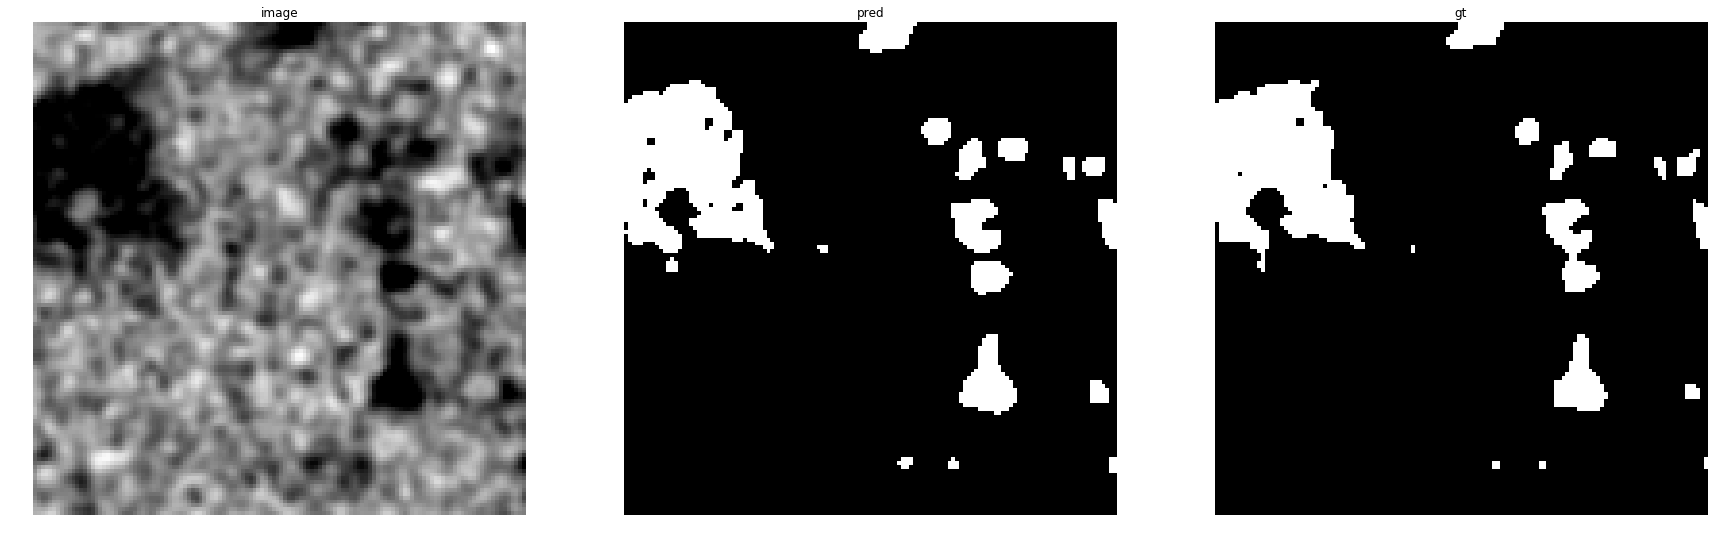

accuracy    : 0.9847412109375
precision   : 0.9012023000522739
recall      : 0.9658263305322129
f1          : 0.932395889670092
pr_auc      : 0.9902387052317754
iou         : 0.8733535967578521


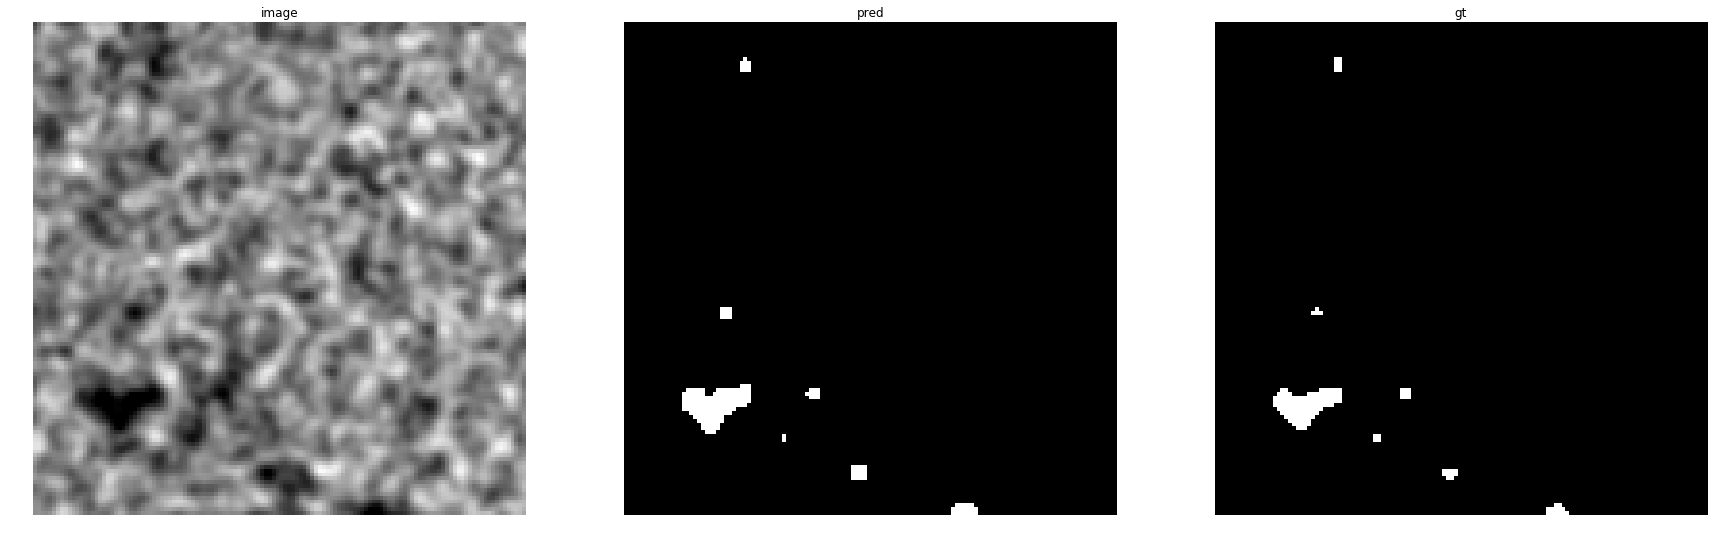

accuracy    : 0.9971923828125
precision   : 0.7902439024390244
recall      : 0.9818181818181818
f1          : 0.8756756756756757
pr_auc      : 0.9850954476055146
iou         : 0.7788461538461539


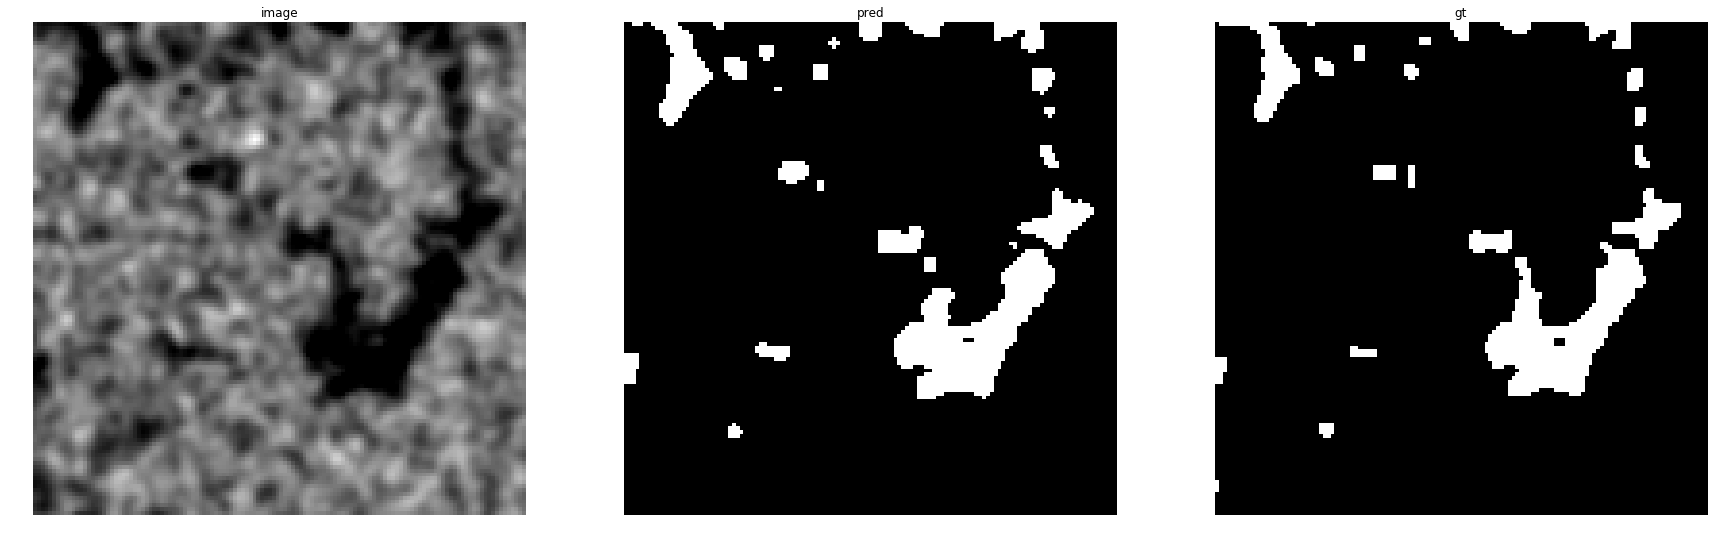

accuracy    : 0.98333740234375
precision   : 0.8587311968606932
recall      : 0.9583941605839416
f1          : 0.905829596412556
pr_auc      : 0.9846584432960489
iou         : 0.8278688524590164


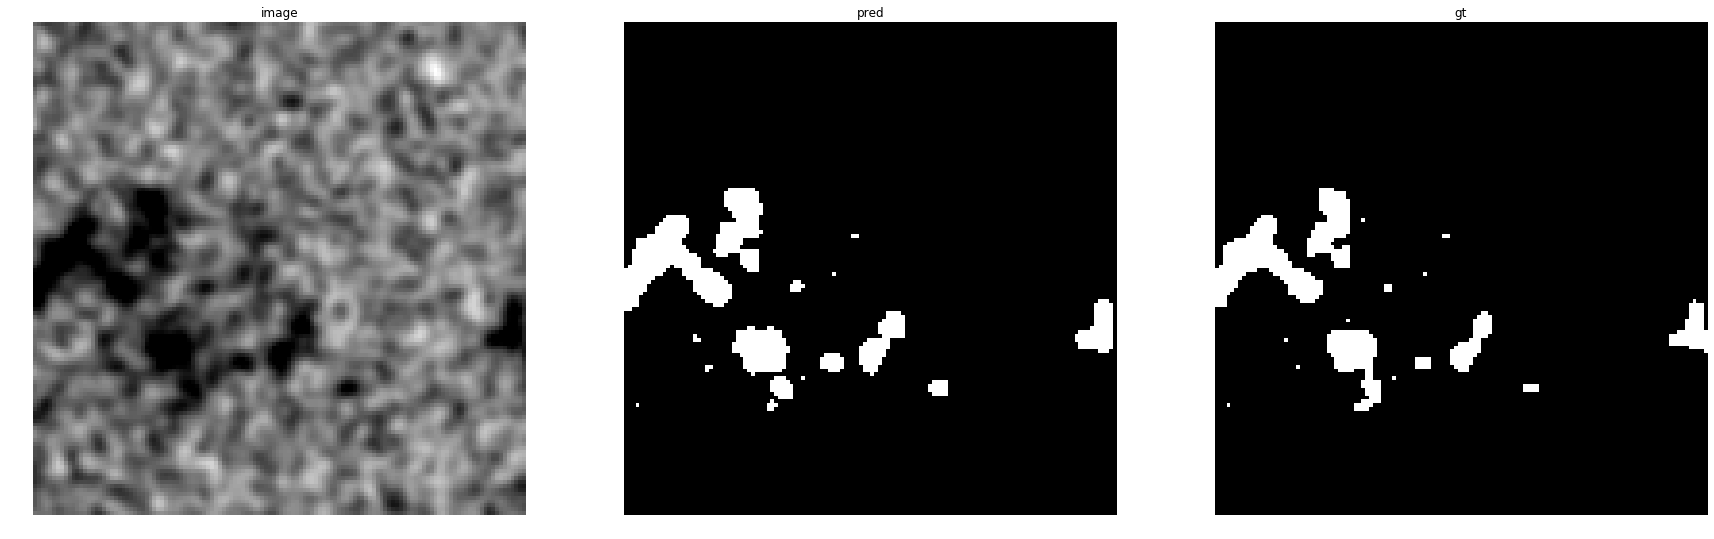

accuracy    : 0.98883056640625
precision   : 0.8302502720348205
recall      : 0.9658227848101266
f1          : 0.892919836161498
pr_auc      : 0.9845465463628239
iou         : 0.806553911205074


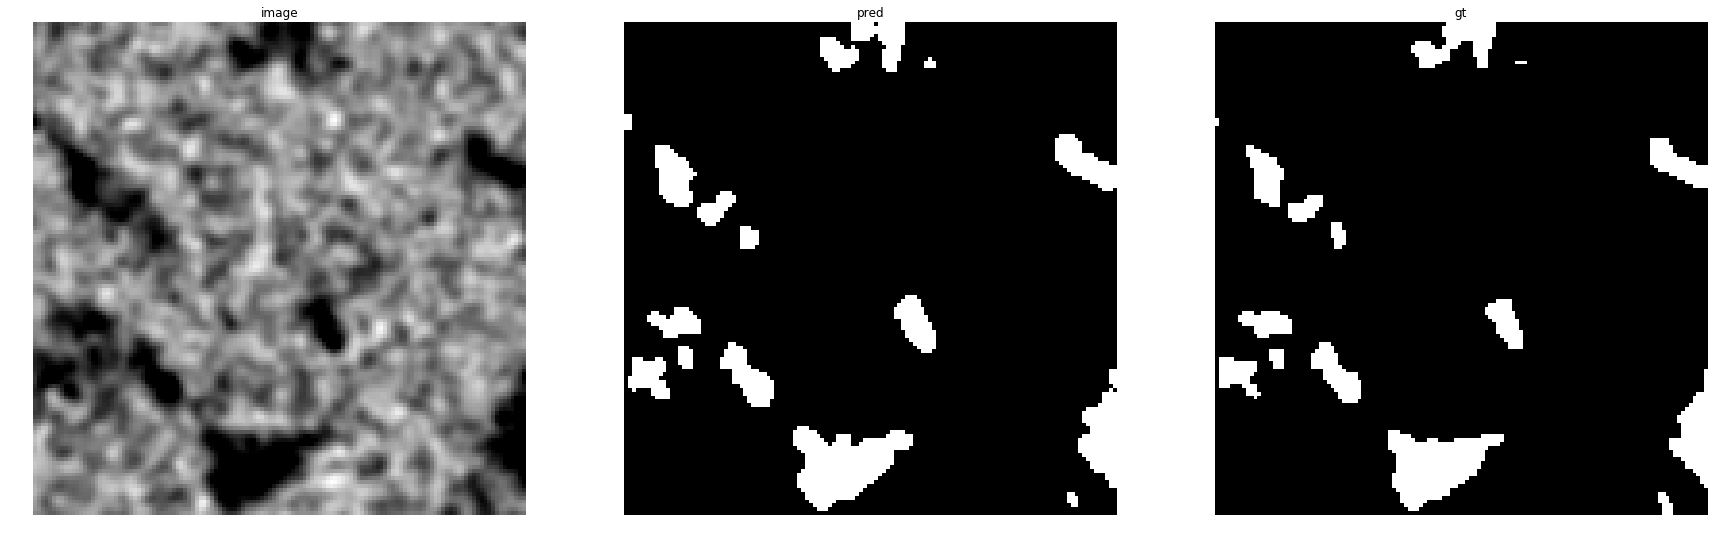

accuracy    : 0.9844970703125
precision   : 0.8549257759784076
recall      : 0.9701378254211332
f1          : 0.9088952654232424
pr_auc      : 0.9843168007700378
iou         : 0.8330046022353714


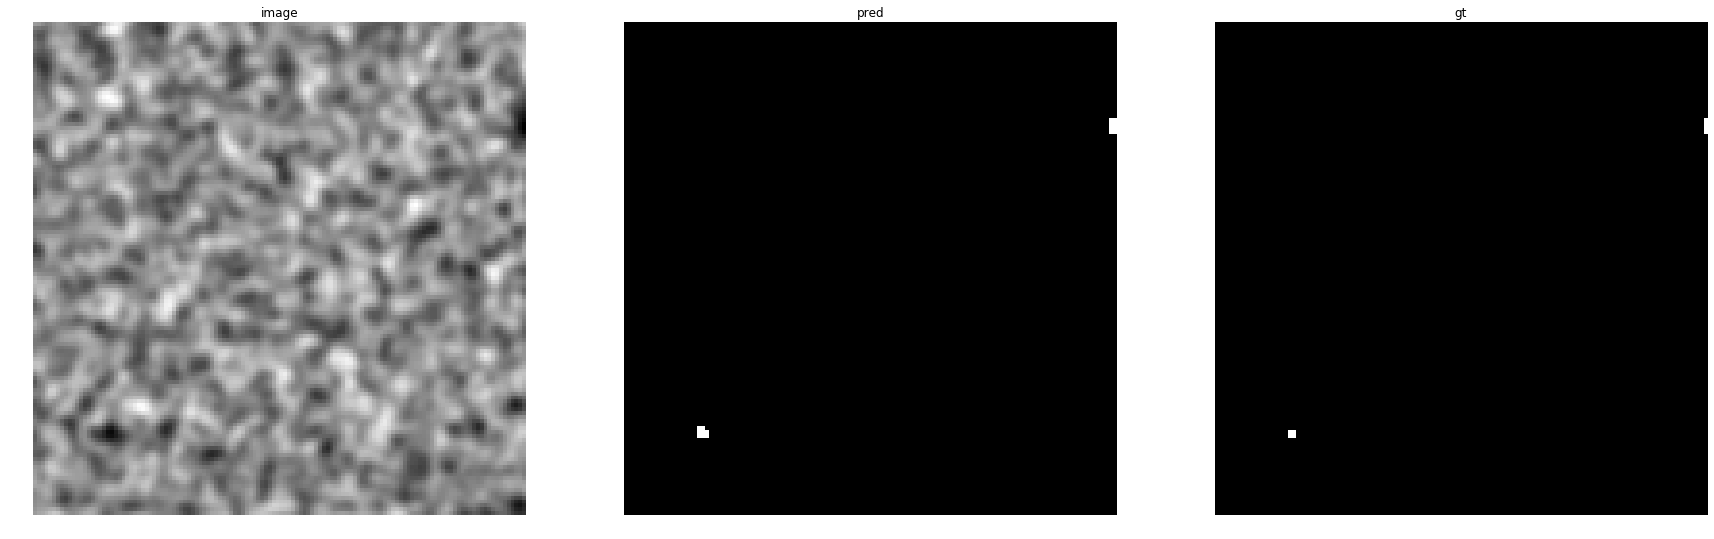

accuracy    : 0.99951171875
precision   : 0.5
recall      : 1.0
f1          : 0.6666666666666666
pr_auc      : 0.9186507936507937
iou         : 0.5


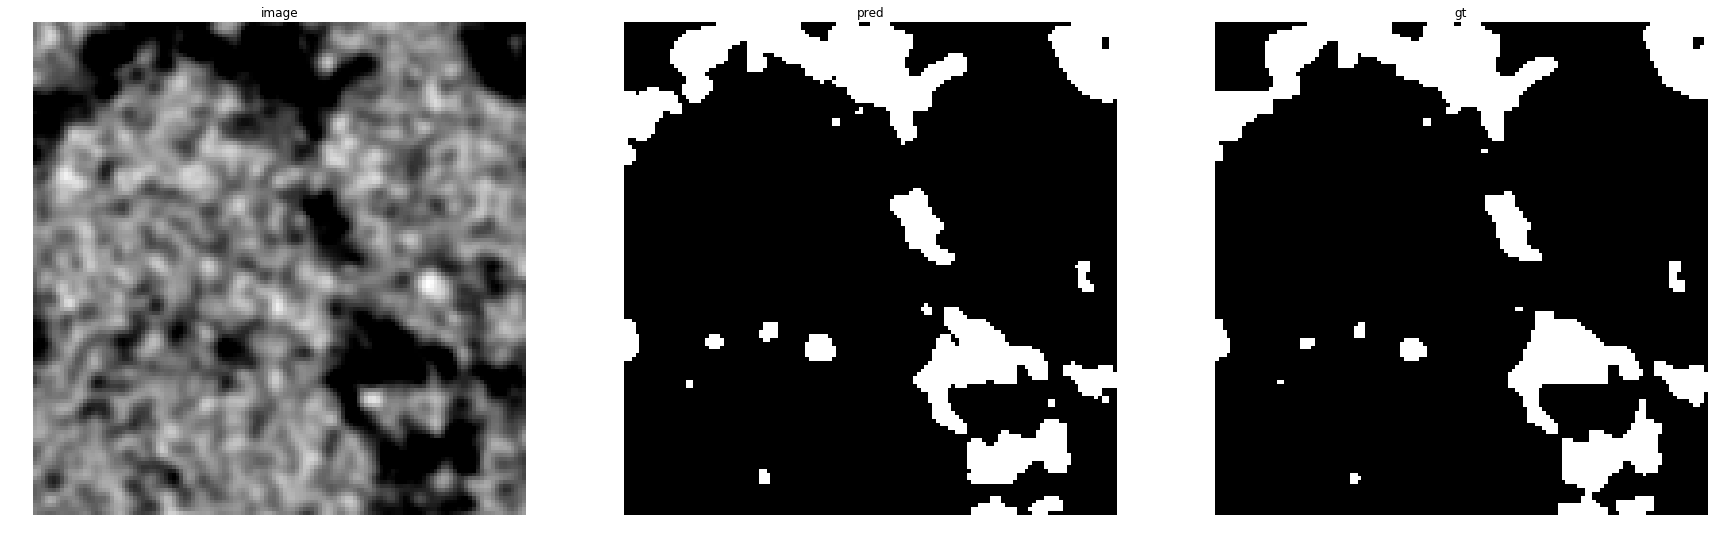

accuracy    : 0.98114013671875
precision   : 0.9333333333333333
recall      : 0.9525233644859813
f1          : 0.9428307123034227
pr_auc      : 0.9910999421998804
iou         : 0.8918445922296114


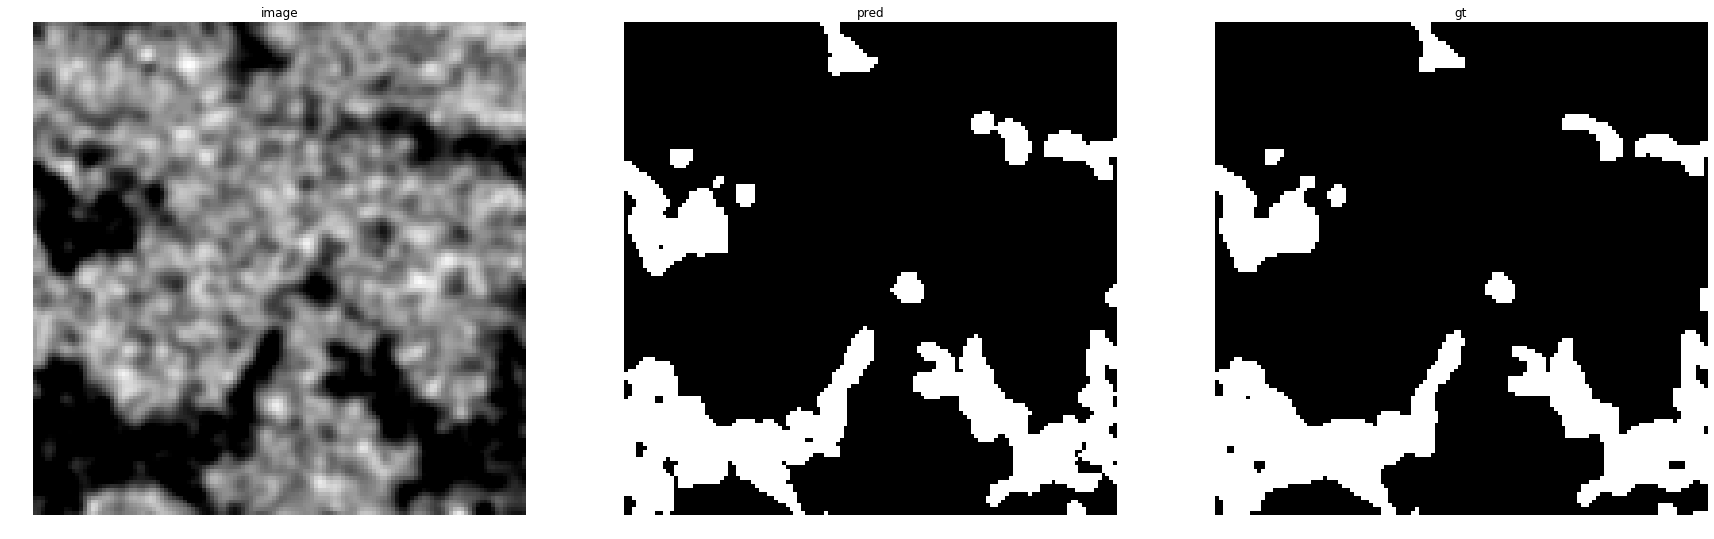

accuracy    : 0.978515625
precision   : 0.9333737129012719
recall      : 0.9589296826384568
f1          : 0.9459791282995703
pr_auc      : 0.9932397972179818
iou         : 0.8974956319161328


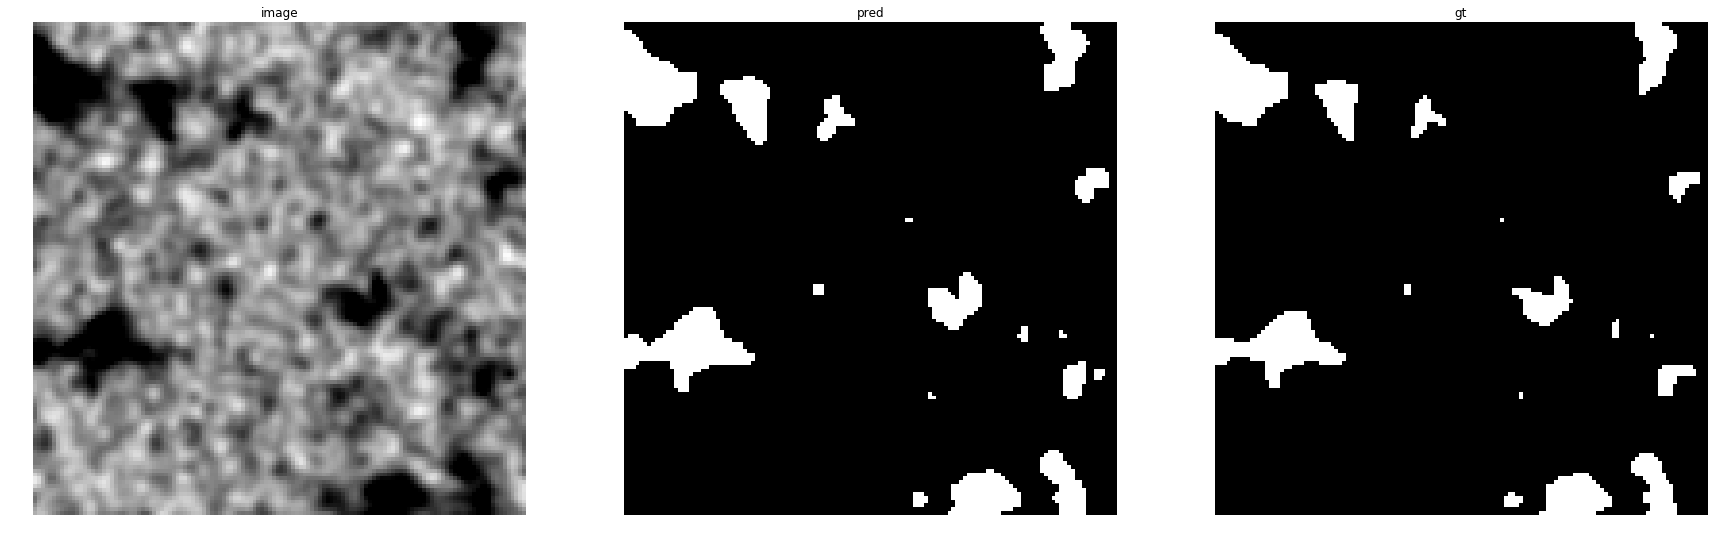

accuracy    : 0.9844970703125
precision   : 0.8574181117533719
recall      : 0.9765910753474762
f1          : 0.9131326949384406
pr_auc      : 0.9882204256738479
iou         : 0.8401510383889238


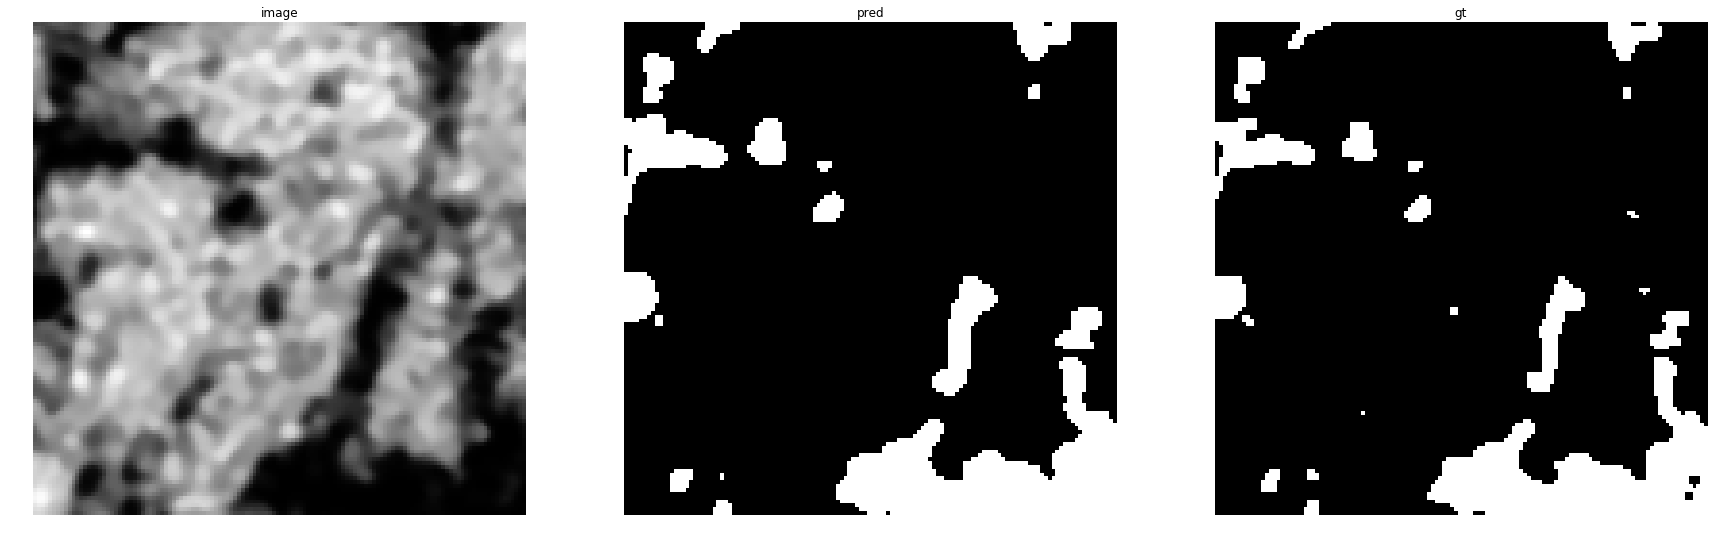

accuracy    : 0.9771728515625
precision   : 0.8564417177914111
recall      : 0.9891355692017005
f1          : 0.9180184129767647
pr_auc      : 0.9946257617935648
iou         : 0.8484602917341977


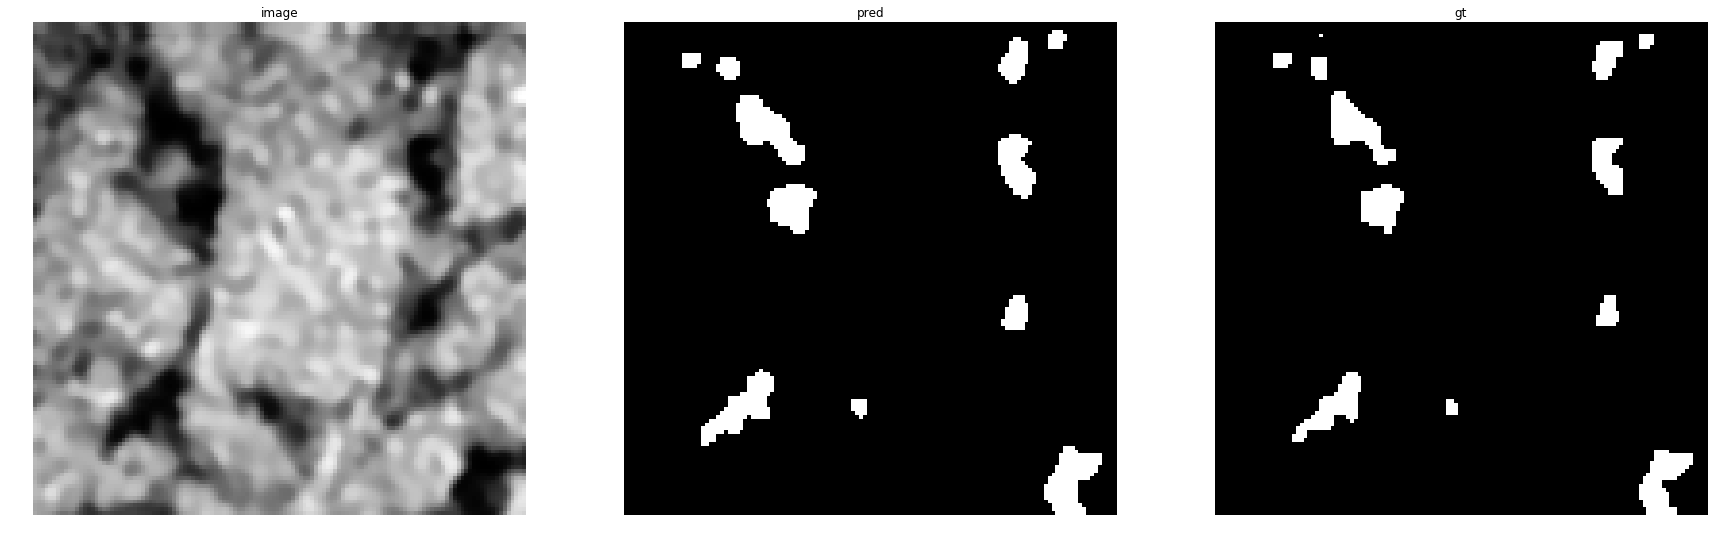

accuracy    : 0.9891357421875
precision   : 0.8200654307524536
recall      : 0.9830065359477124
f1          : 0.8941736028537455
pr_auc      : 0.9886226307159467
iou         : 0.8086021505376344


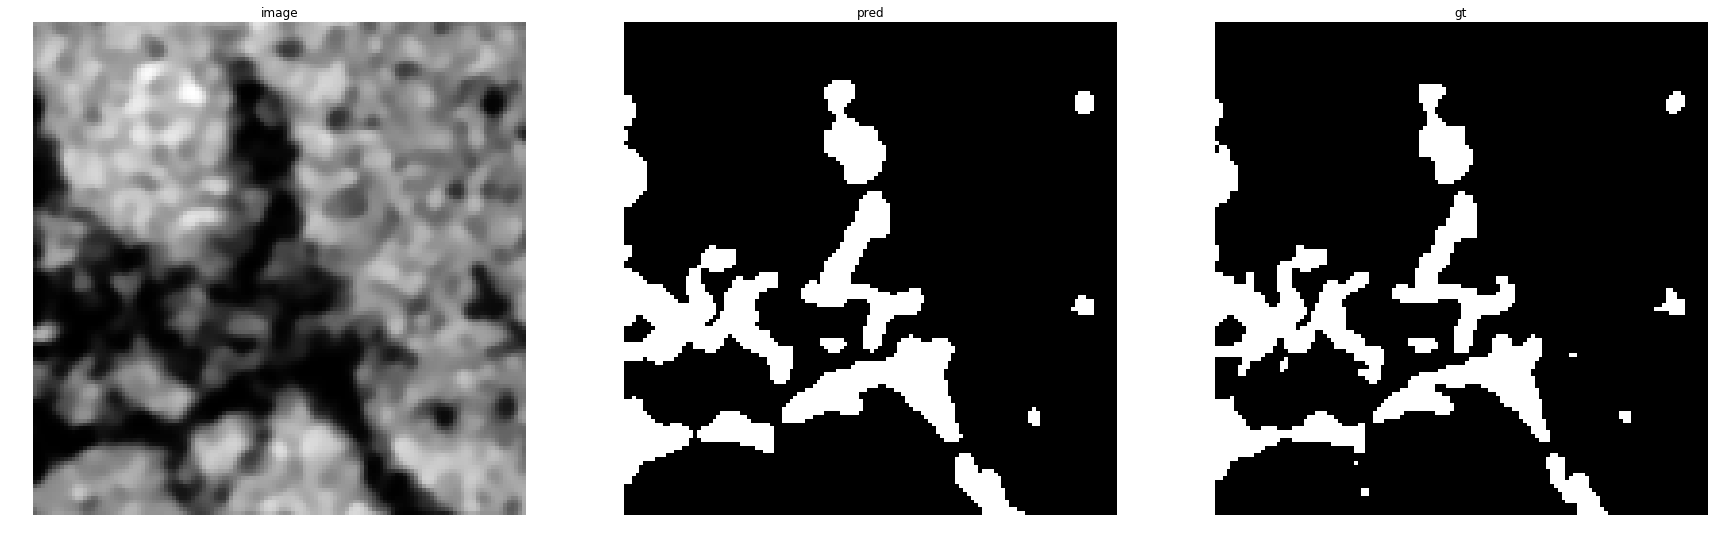

accuracy    : 0.973876953125
precision   : 0.8691660290742158
recall      : 0.9635284139100933
f1          : 0.913917940466613
pr_auc      : 0.985451472332141
iou         : 0.8414814814814815


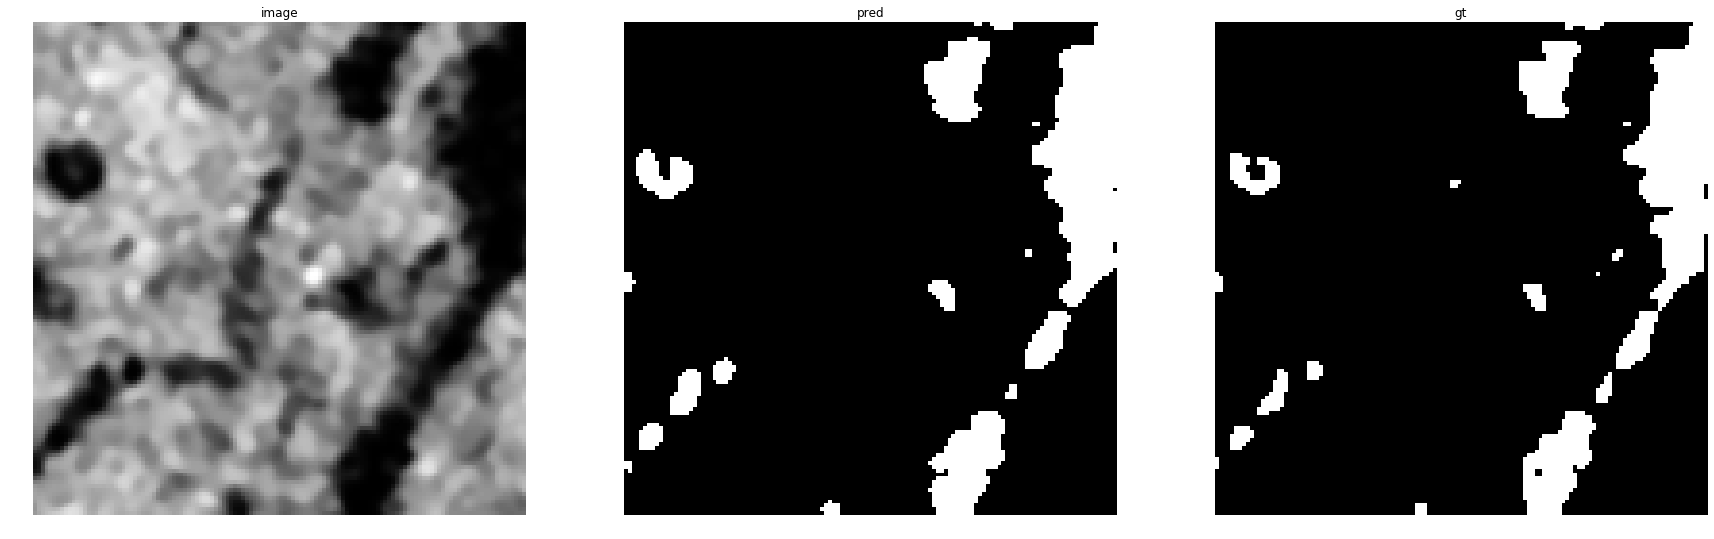

accuracy    : 0.98162841796875
precision   : 0.8744630071599045
recall      : 0.9796791443850268
f1          : 0.9240857503152586
pr_auc      : 0.9925960729579977
iou         : 0.8588842006563525


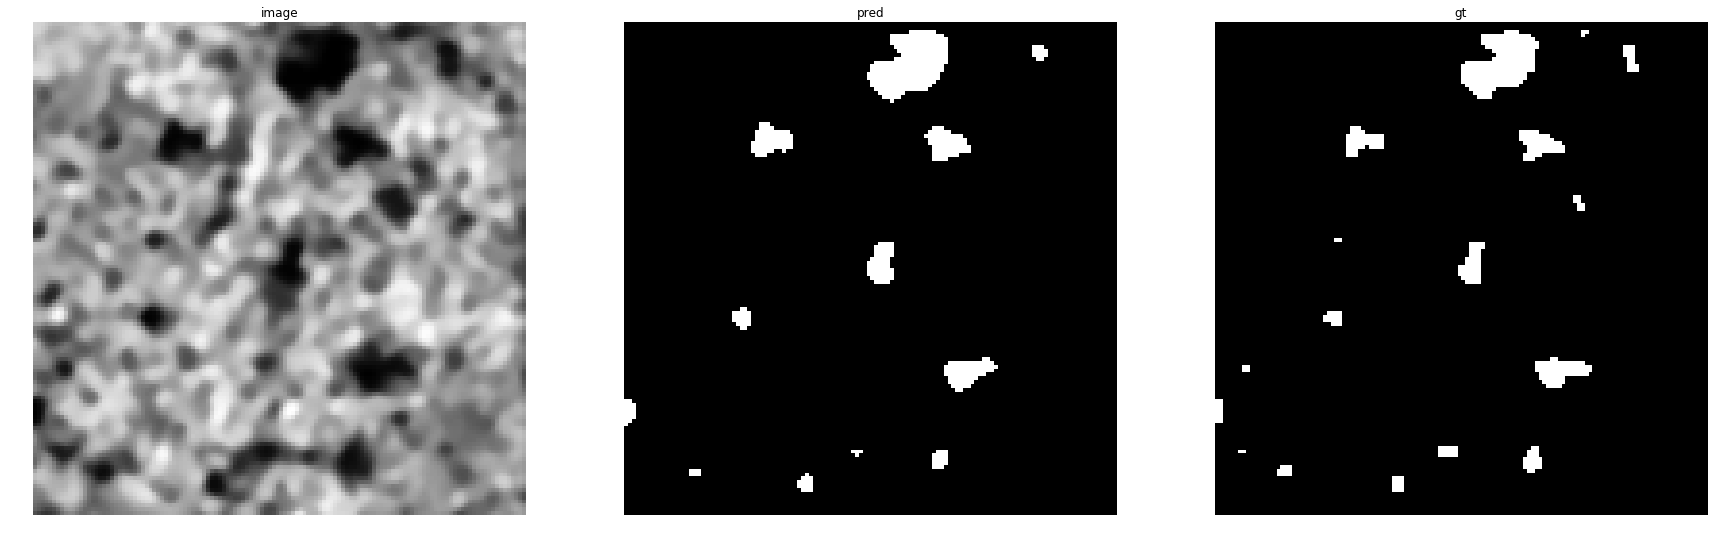

accuracy    : 0.99029541015625
precision   : 0.84688995215311
recall      : 0.8939393939393939
f1          : 0.8697788697788698
pr_auc      : 0.9633611554622316
iou         : 0.7695652173913043


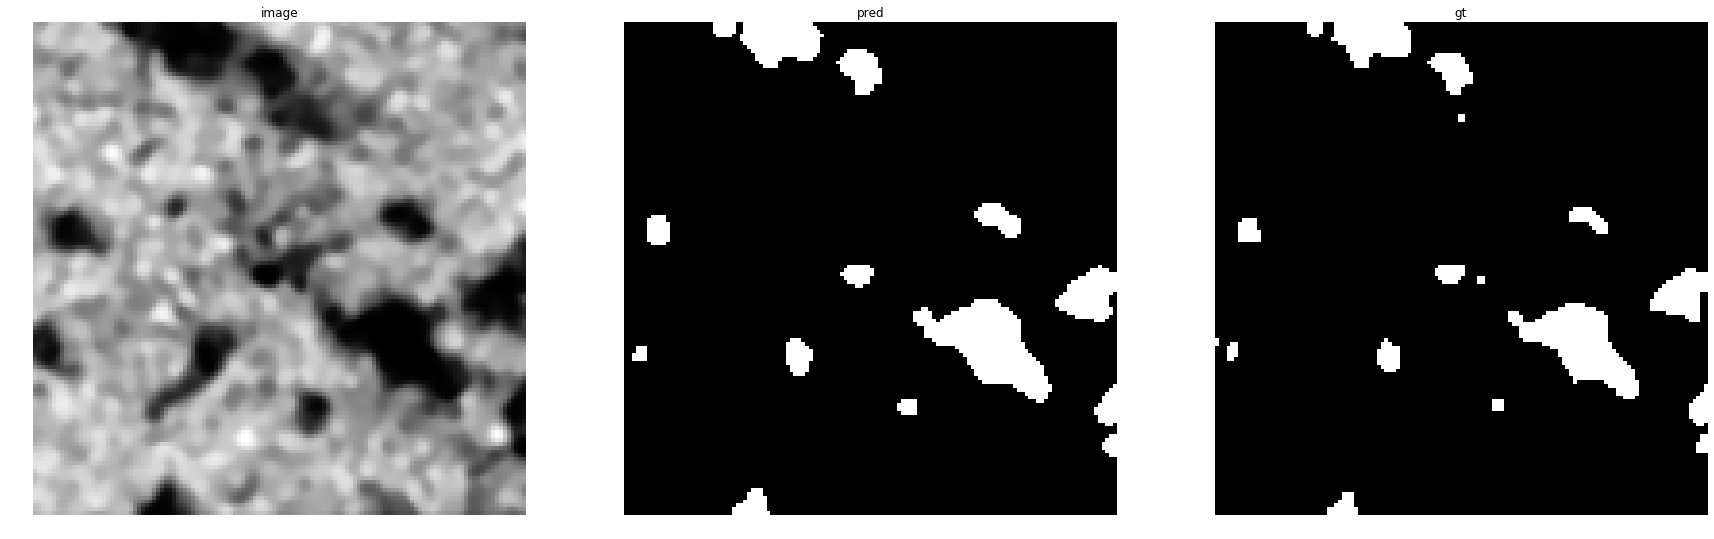

accuracy    : 0.98553466796875
precision   : 0.8237154150197629
recall      : 0.9867424242424242
f1          : 0.8978888410168031
pr_auc      : 0.9911008466934366
iou         : 0.8146989835809226


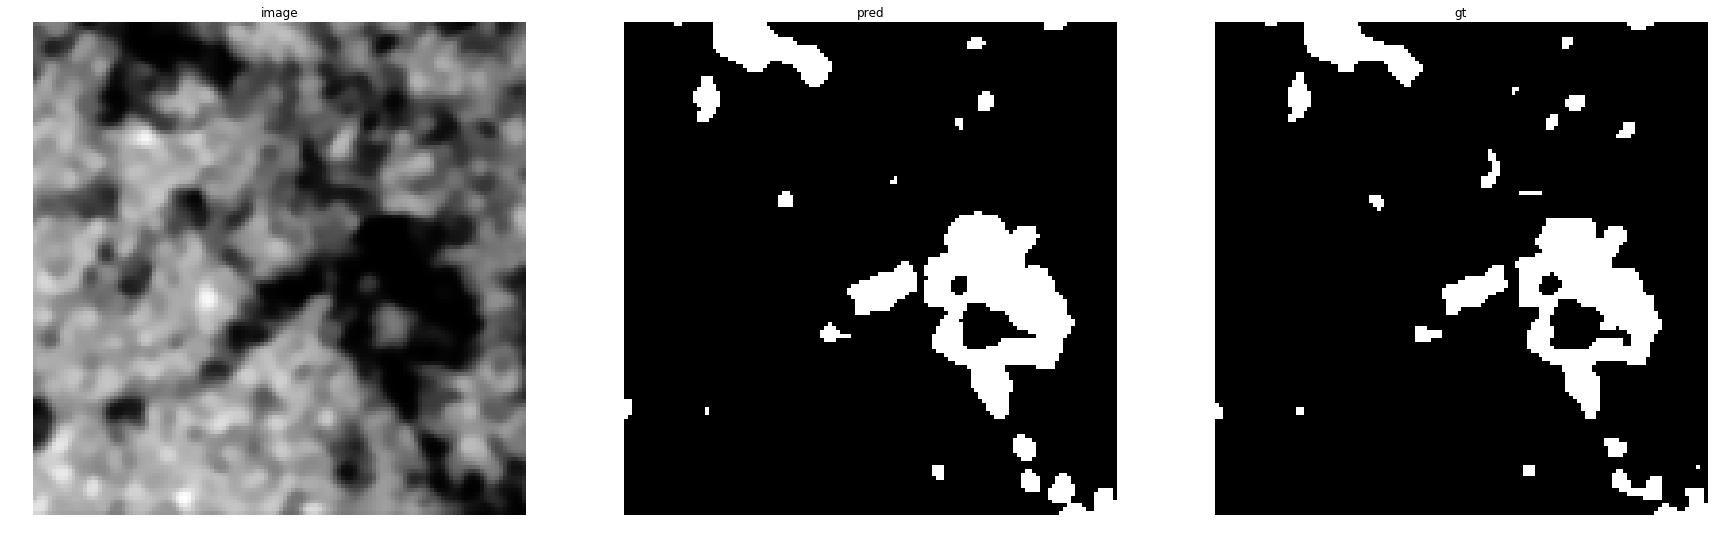

accuracy    : 0.97998046875
precision   : 0.8643243243243244
recall      : 0.9540572792362768
f1          : 0.9069767441860467
pr_auc      : 0.983759097865137
iou         : 0.8297872340425532


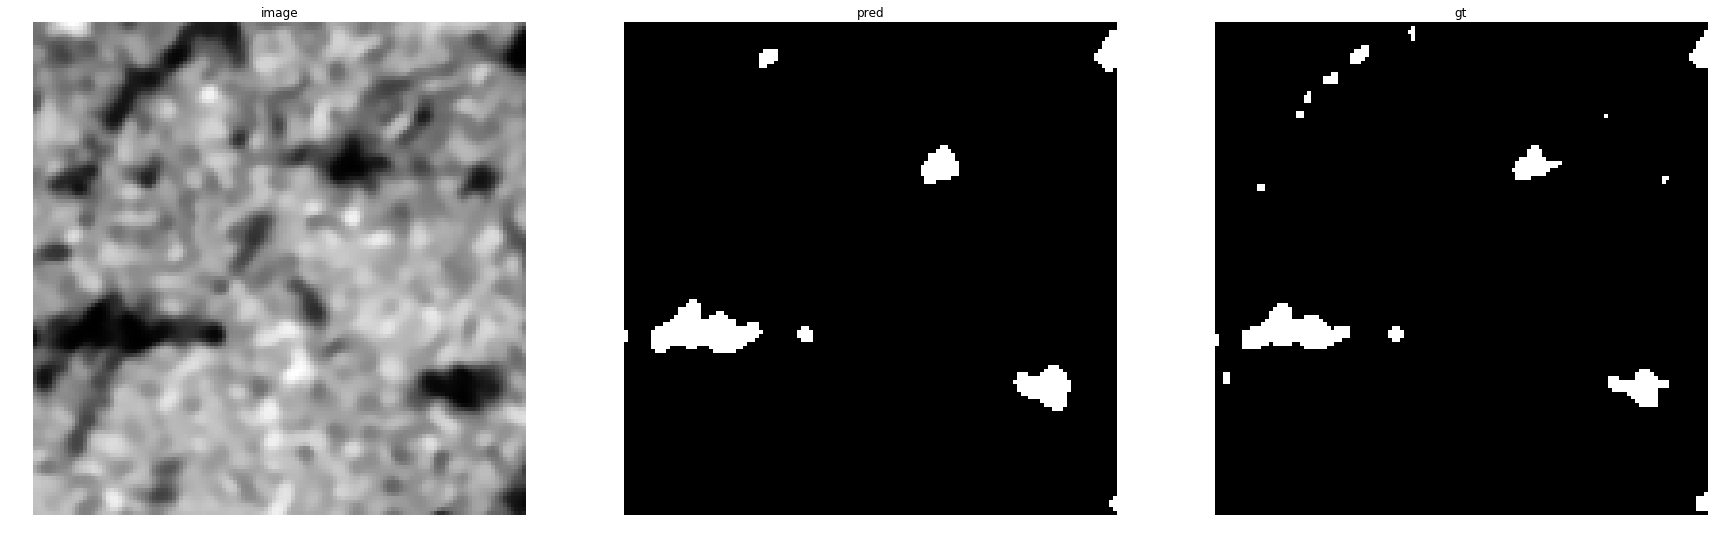

accuracy    : 0.9906005859375
precision   : 0.8056112224448898
recall      : 0.8758169934640523
f1          : 0.8392484342379958
pr_auc      : 0.9484171643457985
iou         : 0.7230215827338129


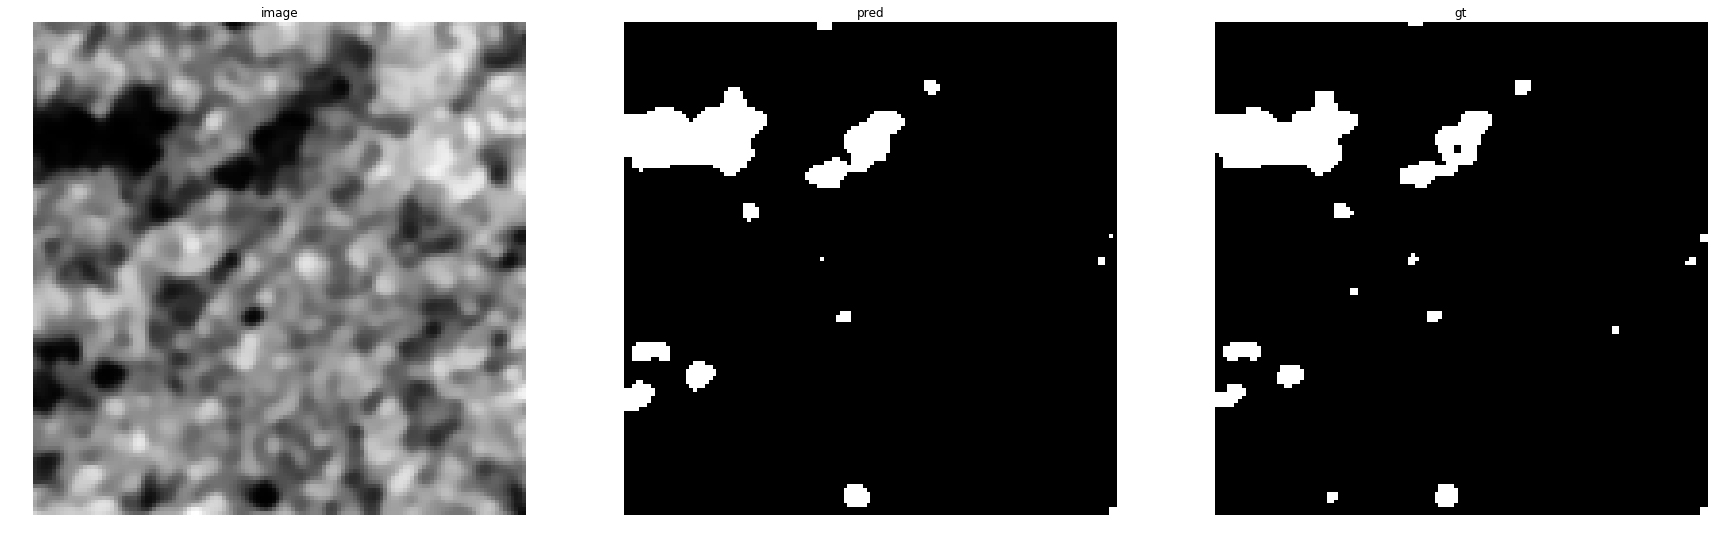

accuracy    : 0.9920654296875
precision   : 0.9035532994923858
recall      : 0.9621621621621622
f1          : 0.9319371727748691
pr_auc      : 0.9878177991260816
iou         : 0.8725490196078431


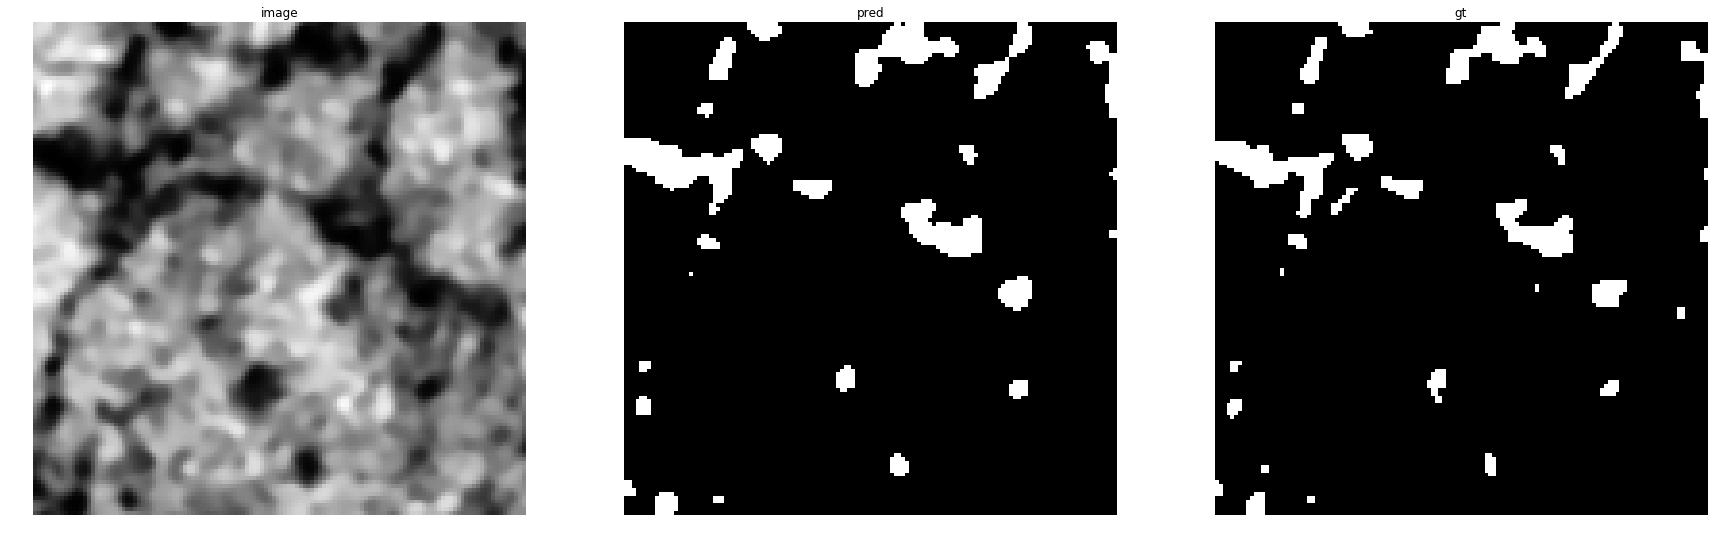

accuracy    : 0.9832763671875
precision   : 0.8392999204455052
recall      : 0.9361135758651287
f1          : 0.8850671140939597
pr_auc      : 0.9707141919154948
iou         : 0.7938299473288186


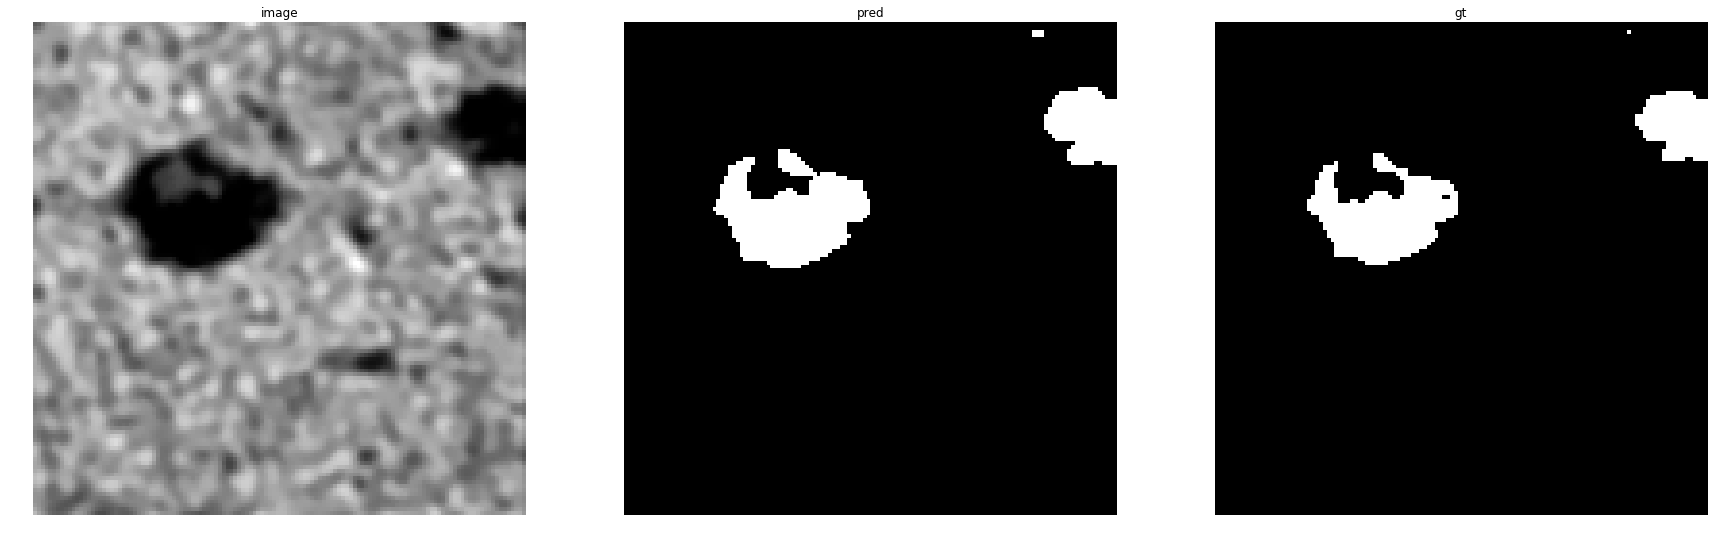

accuracy    : 0.9908447265625
precision   : 0.8576923076923076
recall      : 0.9977628635346756
f1          : 0.9224405377456049
pr_auc      : 0.9974946660958319
iou         : 0.8560460652591171


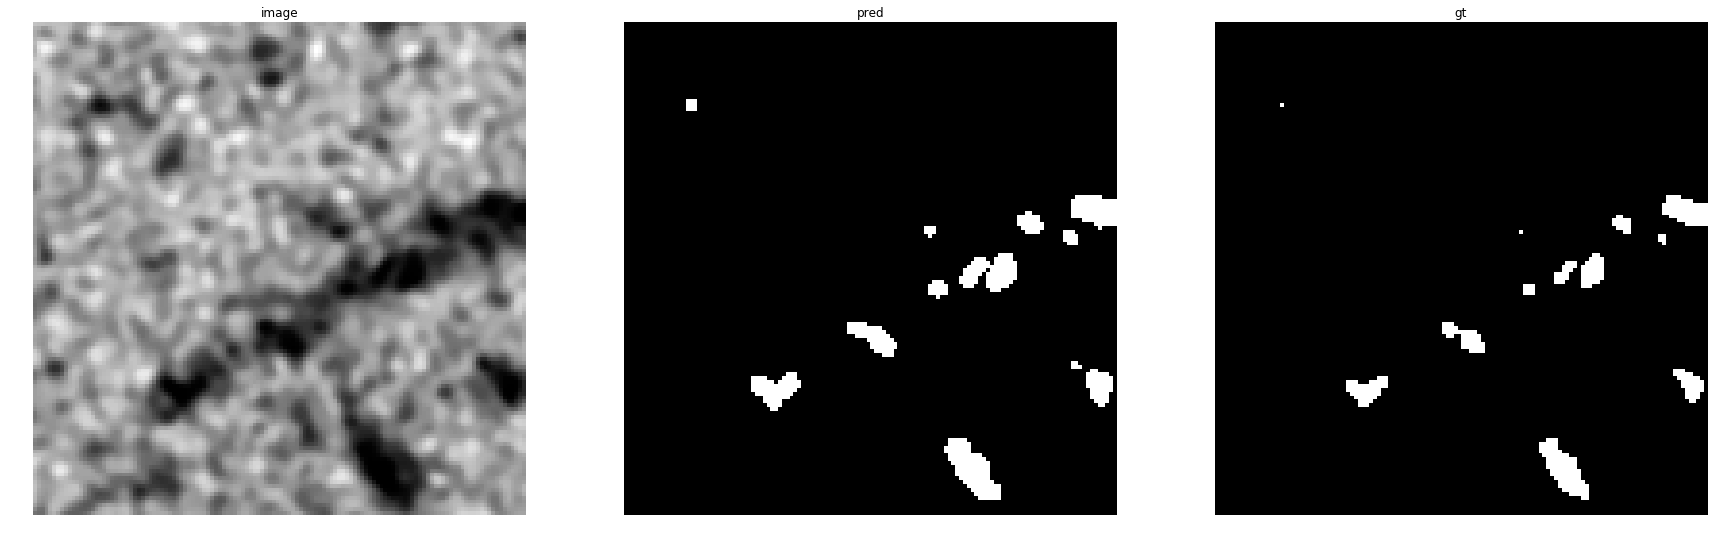

accuracy    : 0.98895263671875
precision   : 0.6946826758147513
recall      : 0.9926470588235294
f1          : 0.8173562058526741
pr_auc      : 0.9848760755728161
iou         : 0.6911262798634812


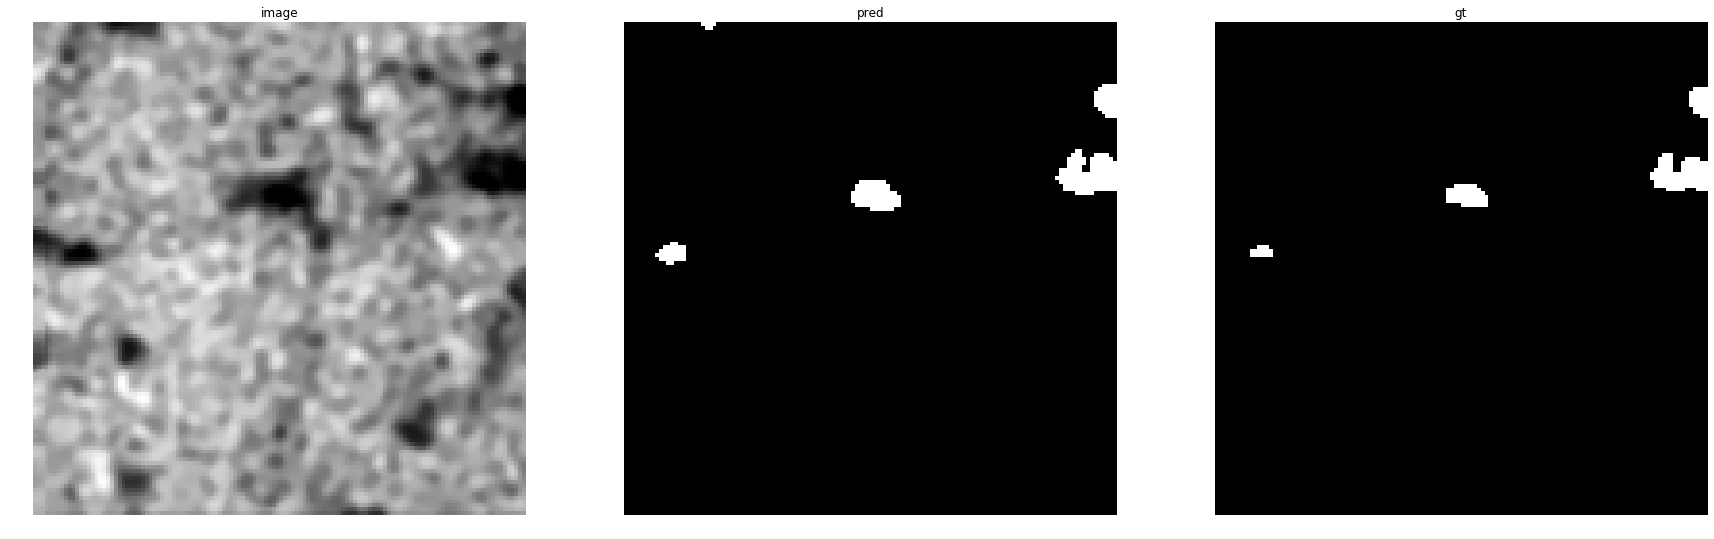

accuracy    : 0.99481201171875
precision   : 0.7157190635451505
recall      : 1.0
f1          : 0.834307992202729
pr_auc      : 0.9874359101423889
iou         : 0.7157190635451505


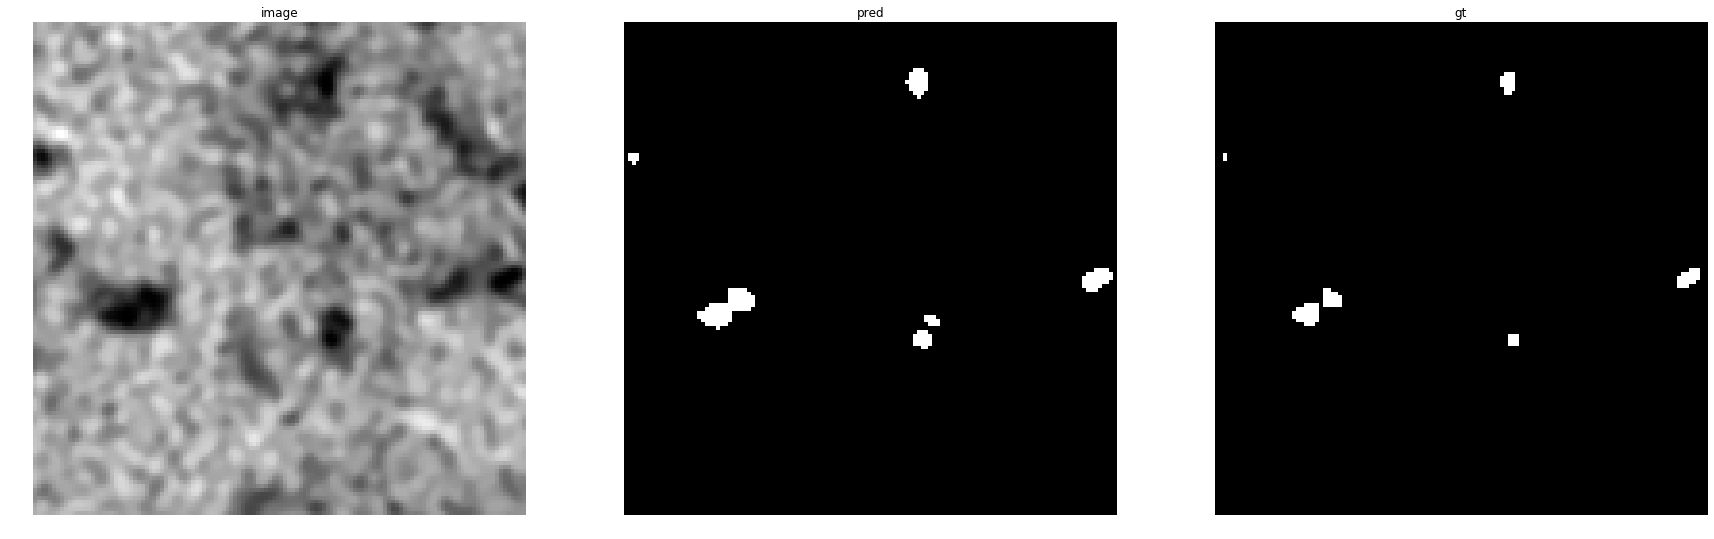

accuracy    : 0.99517822265625
precision   : 0.5752688172043011
recall      : 1.0
f1          : 0.7303754266211605
pr_auc      : 0.9890660740866399
iou         : 0.5752688172043011


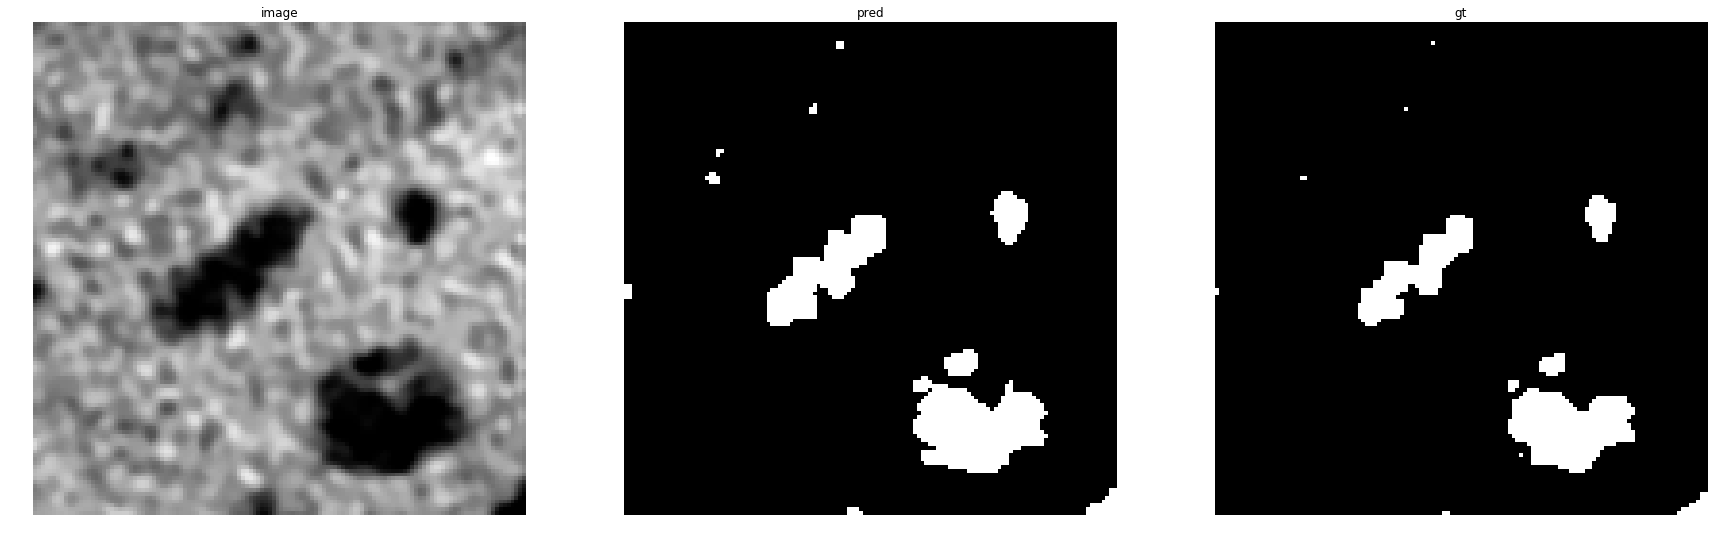

accuracy    : 0.98553466796875
precision   : 0.8039702233250621
recall      : 1.0
f1          : 0.891334250343879
pr_auc      : 0.9955263724574576
iou         : 0.8039702233250621


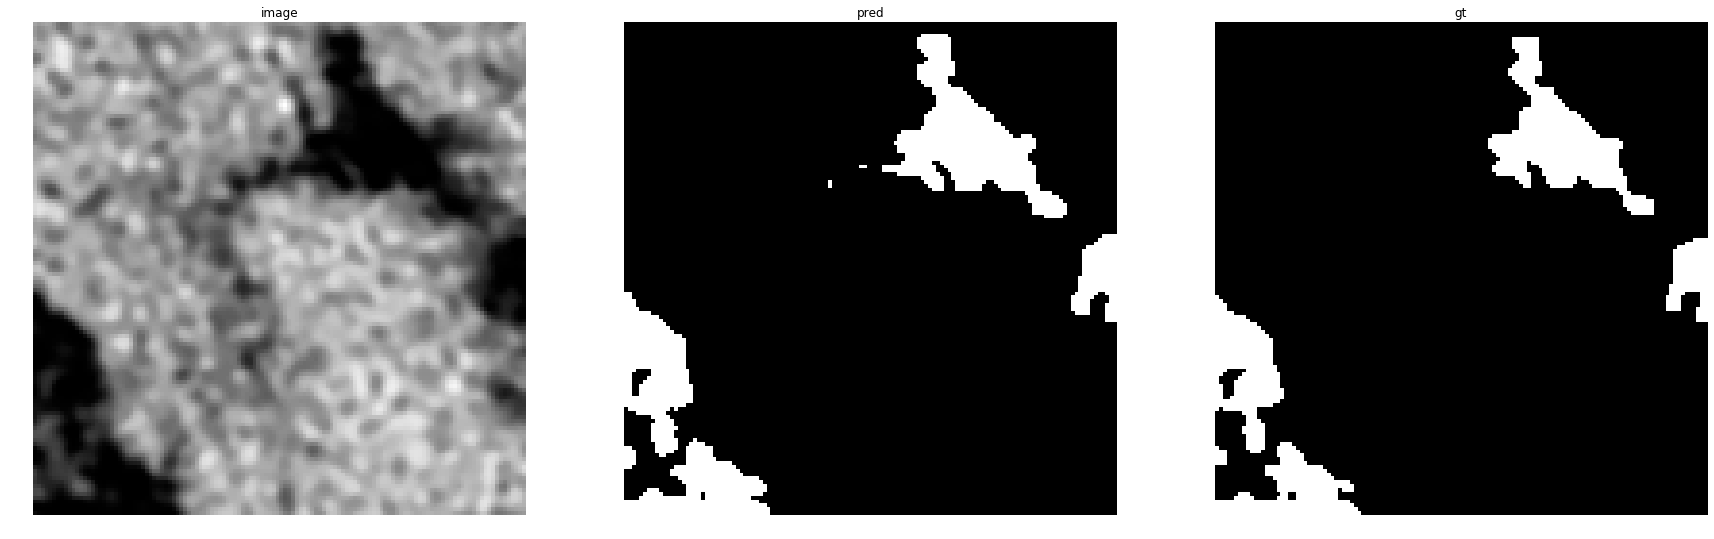

accuracy    : 0.9840087890625
precision   : 0.8606645230439443
recall      : 0.9987562189054726
f1          : 0.9245826137017846
pr_auc      : 0.9974430813508212
iou         : 0.8597430406852249


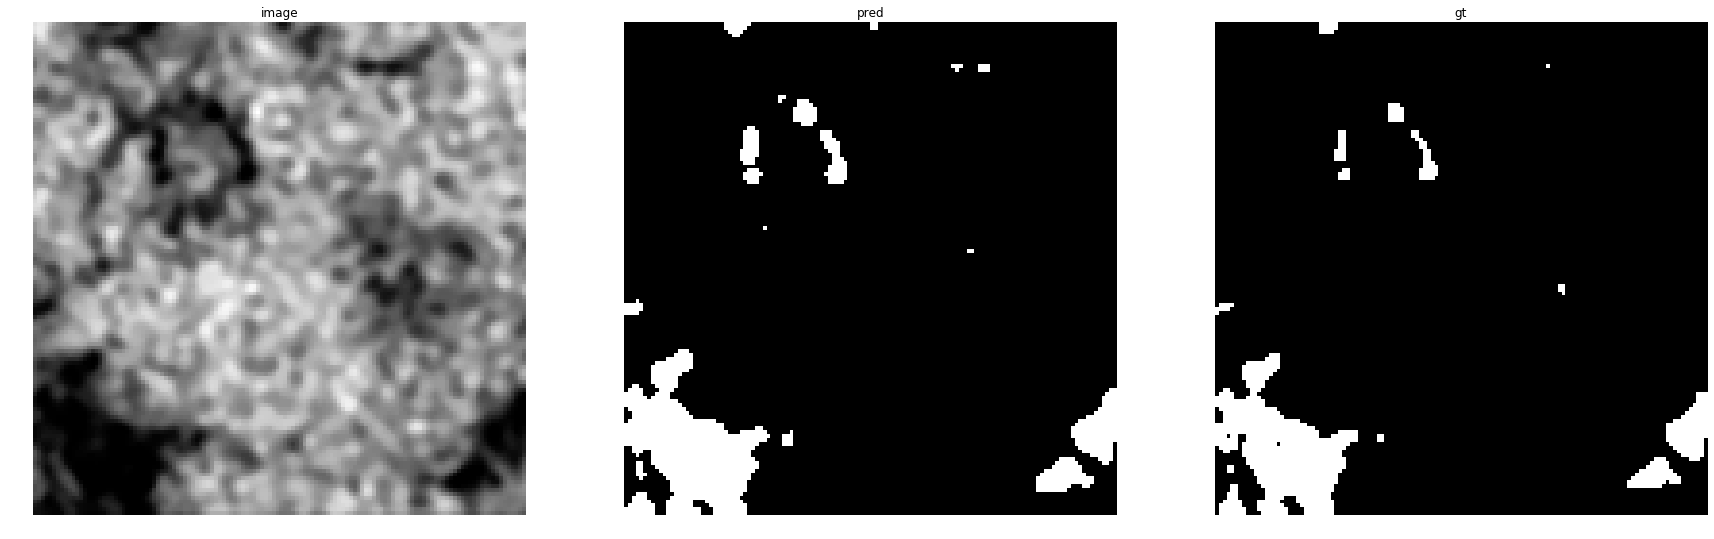

accuracy    : 0.98614501953125
precision   : 0.8325581395348837
recall      : 0.9898617511520738
f1          : 0.9044210526315789
pr_auc      : 0.9936768327383905
iou         : 0.8255188316679477


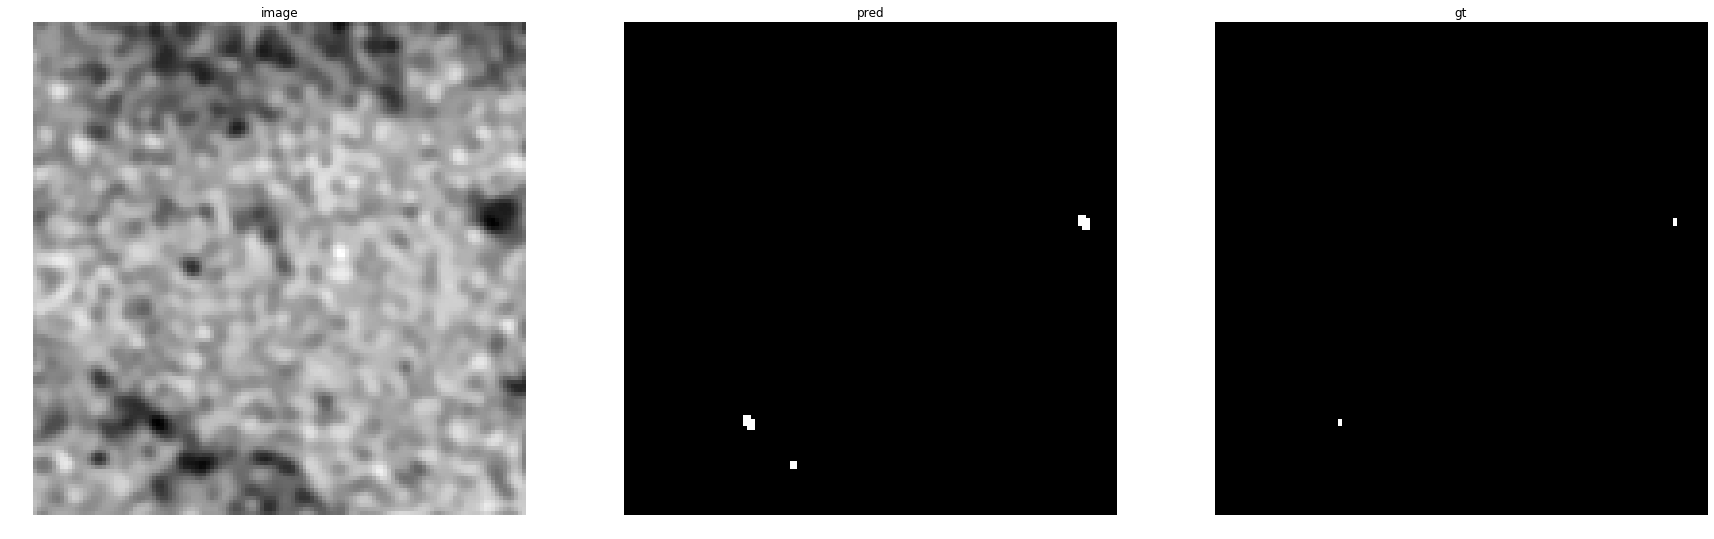

accuracy    : 0.998779296875
precision   : 0.16666666666666666
recall      : 1.0
f1          : 0.2857142857142857
pr_auc      : 1.0
iou         : 0.16666666666666666


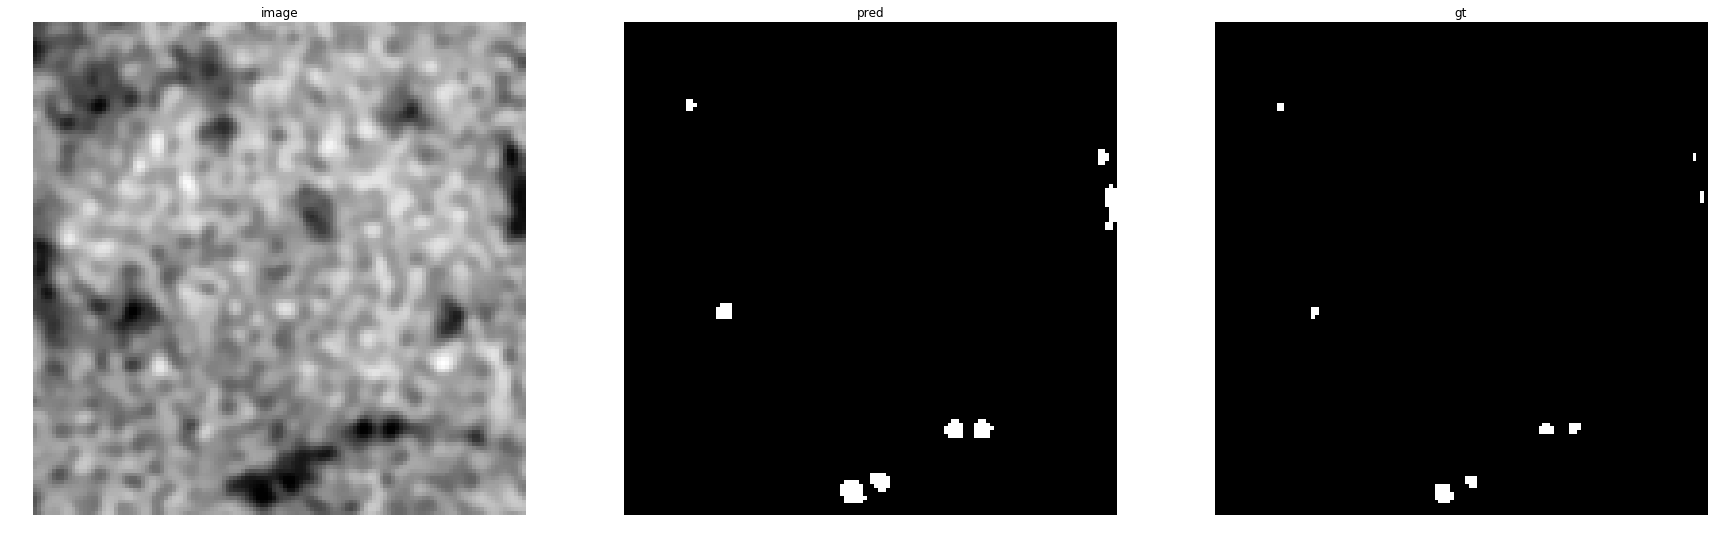

accuracy    : 0.99444580078125
precision   : 0.40131578947368424
recall      : 1.0
f1          : 0.5727699530516432
pr_auc      : 0.9443020182481332
iou         : 0.40131578947368424


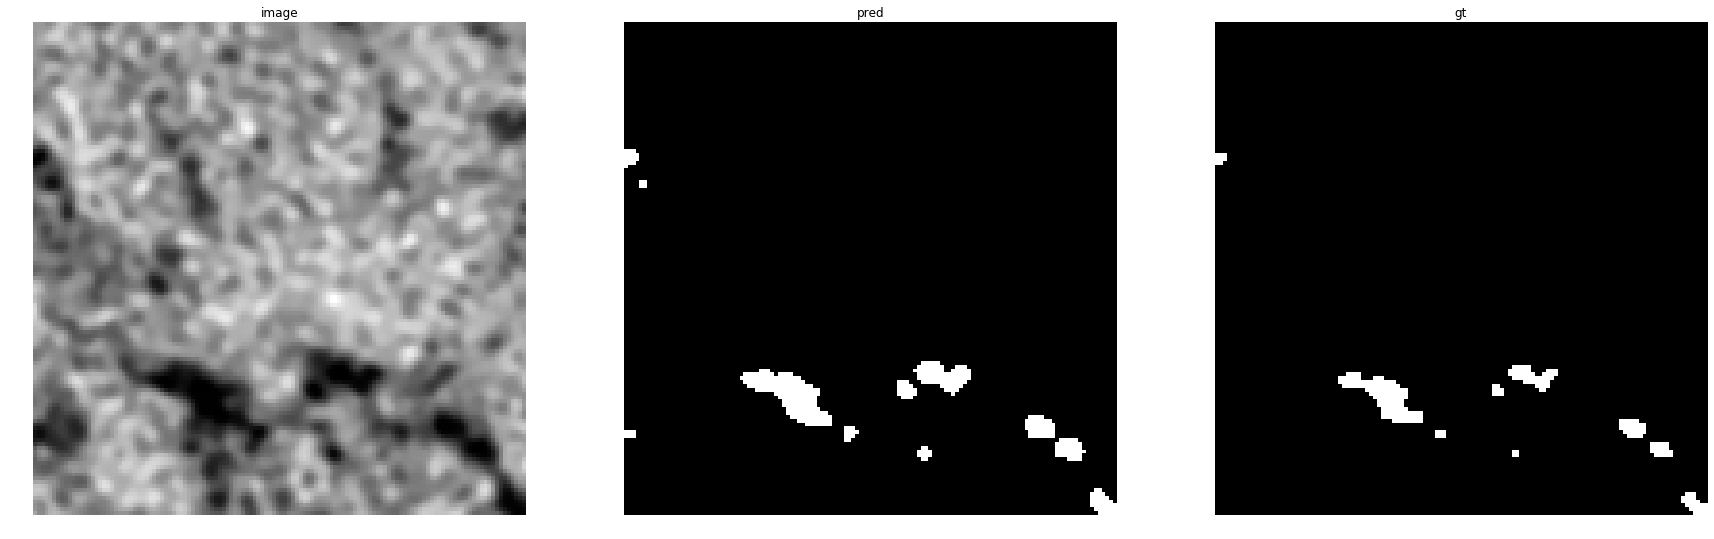

accuracy    : 0.990478515625
precision   : 0.6395348837209303
recall      : 0.9963768115942029
f1          : 0.7790368271954674
pr_auc      : 0.987375783192594
iou         : 0.6380510440835266


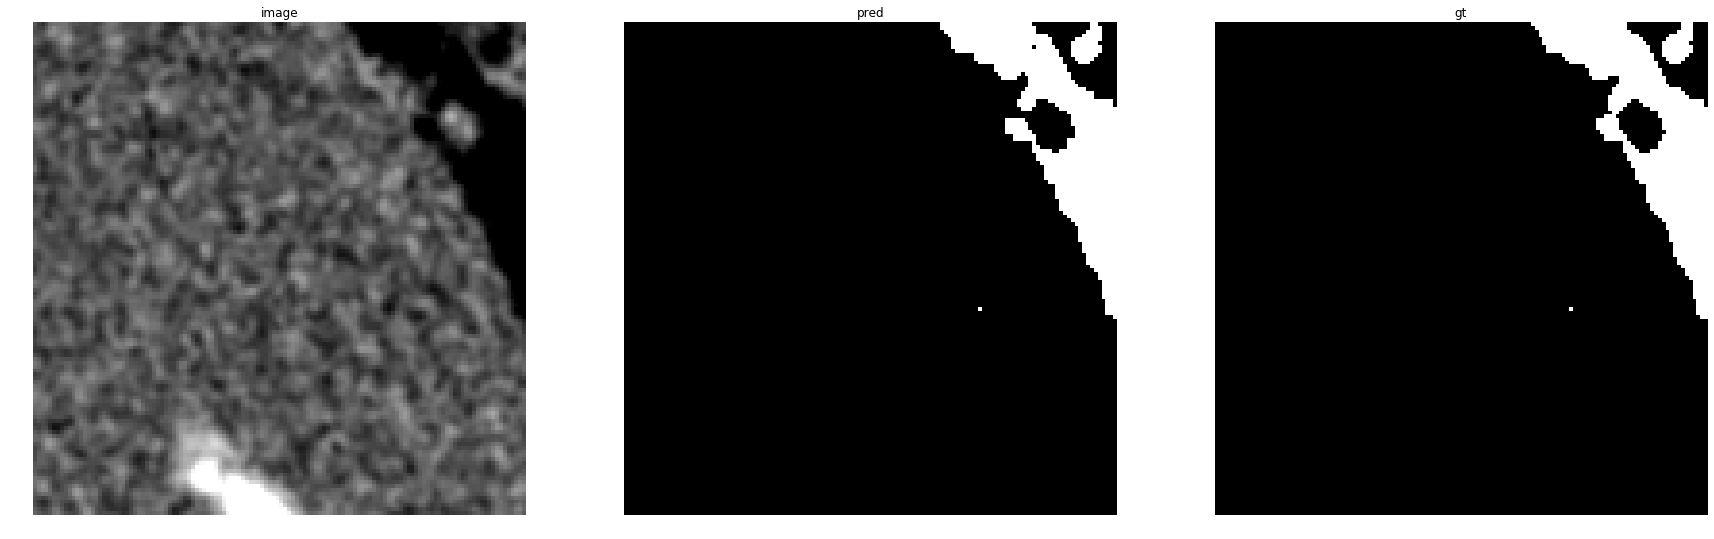

accuracy    : 0.99725341796875
precision   : 0.9940828402366864
recall      : 0.9686985172981878
f1          : 0.981226533166458
pr_auc      : 0.9993588862718761
iou         : 0.9631449631449631


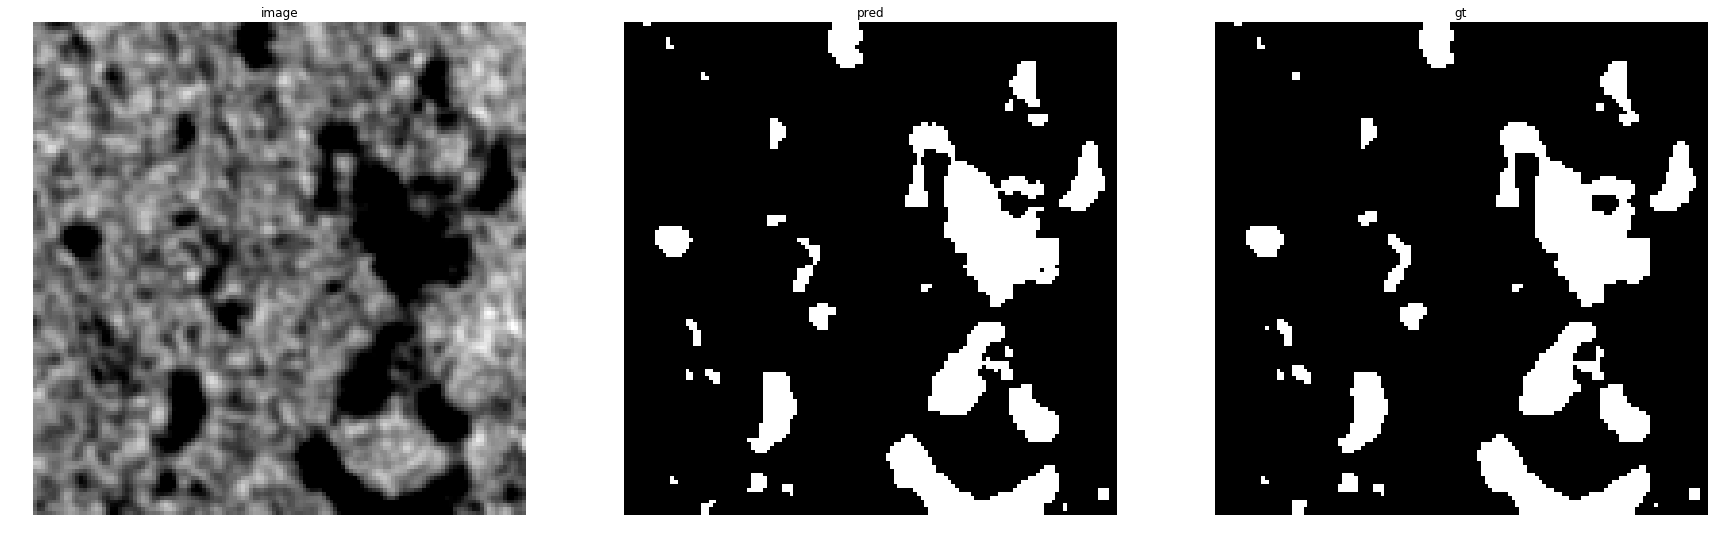

accuracy    : 0.99017333984375
precision   : 0.9913644214162349
recall      : 0.9421419778416086
f1          : 0.9661266568483063
pr_auc      : 0.9976605250394655
iou         : 0.9344729344729344


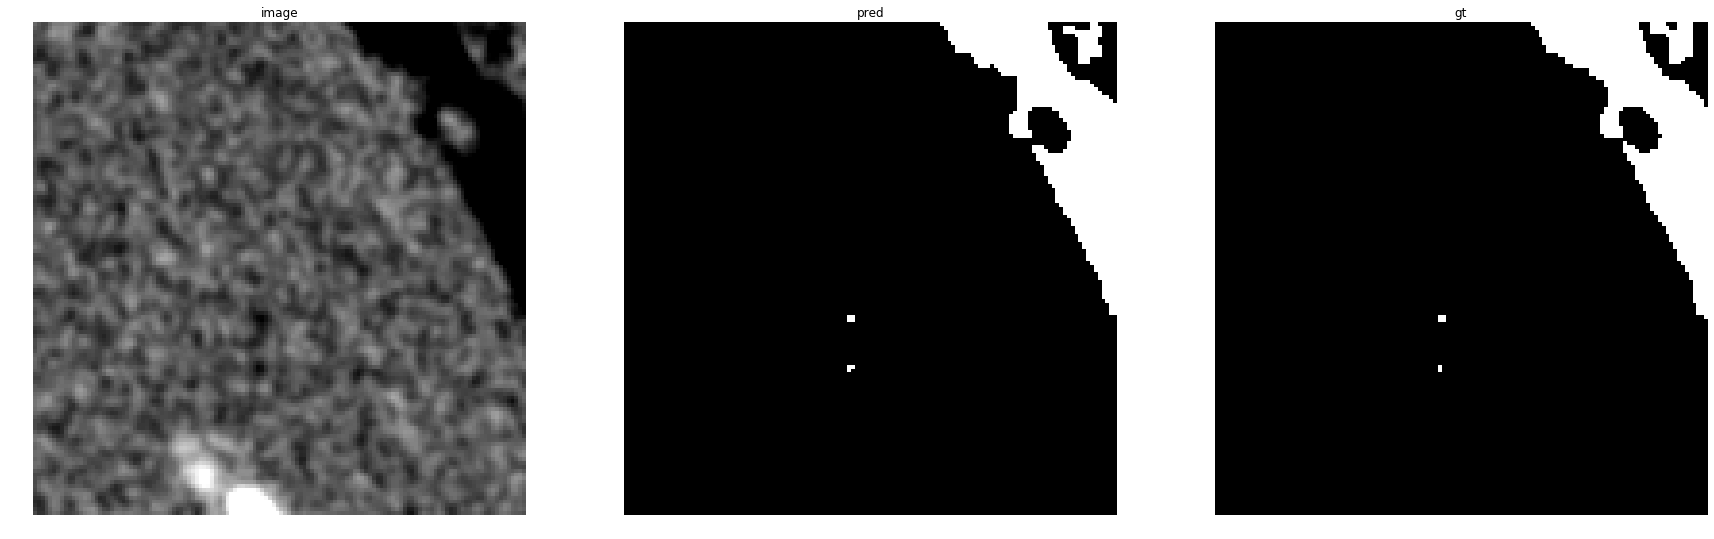

accuracy    : 0.9970703125
precision   : 0.9967871485943776
recall      : 0.9657587548638132
f1          : 0.9810276679841897
pr_auc      : 0.9992587782455364
iou         : 0.9627618308766486


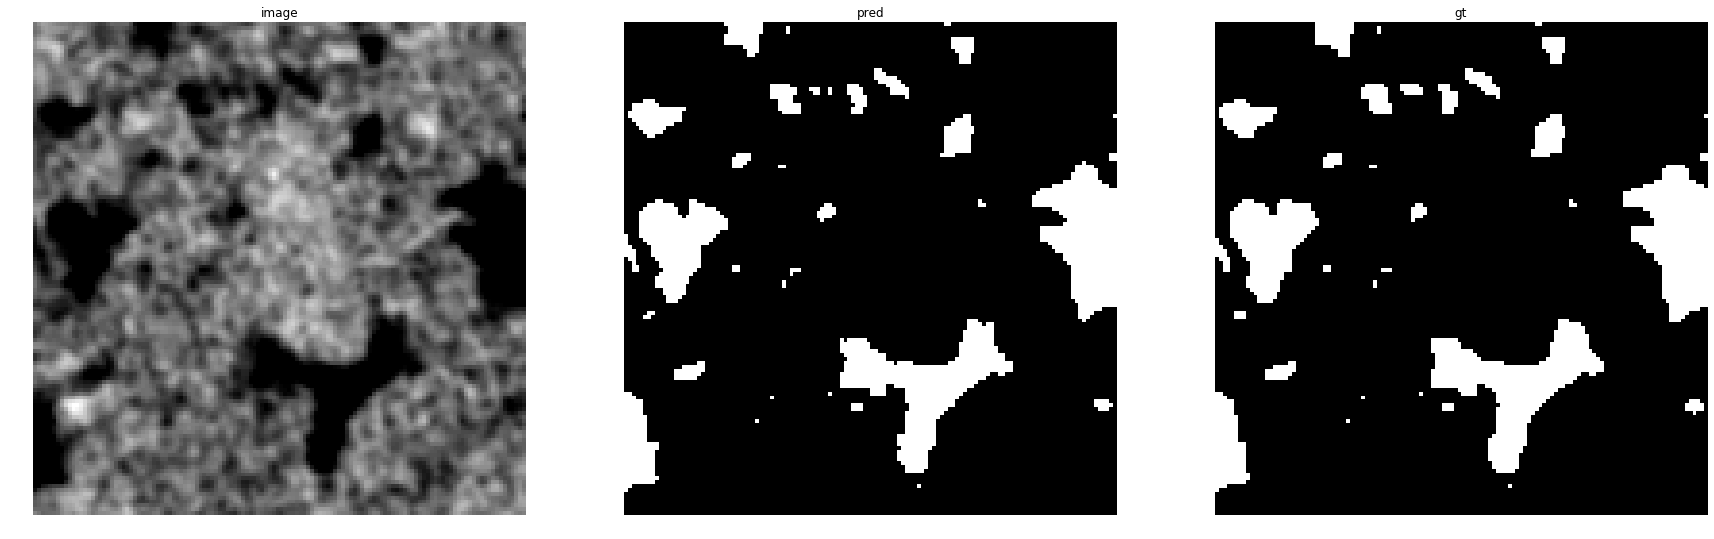

accuracy    : 0.9931640625
precision   : 0.9926840420667581
recall      : 0.9576532862814292
f1          : 0.9748540637629097
pr_auc      : 0.998239515828363
iou         : 0.9509417433201928


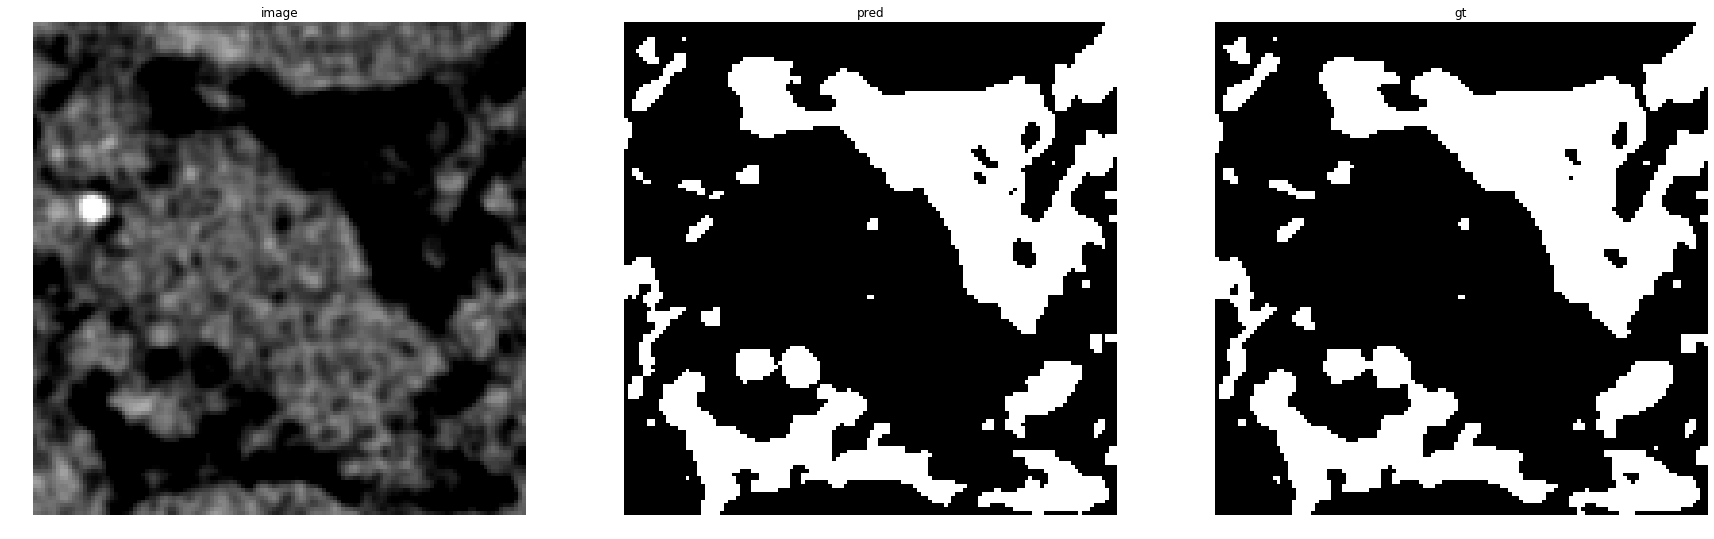

accuracy    : 0.97955322265625
precision   : 0.9947481034818129
recall      : 0.9431943932128366
f1          : 0.9682855249455647
pr_auc      : 0.9981295987657646
iou         : 0.9385208295100018


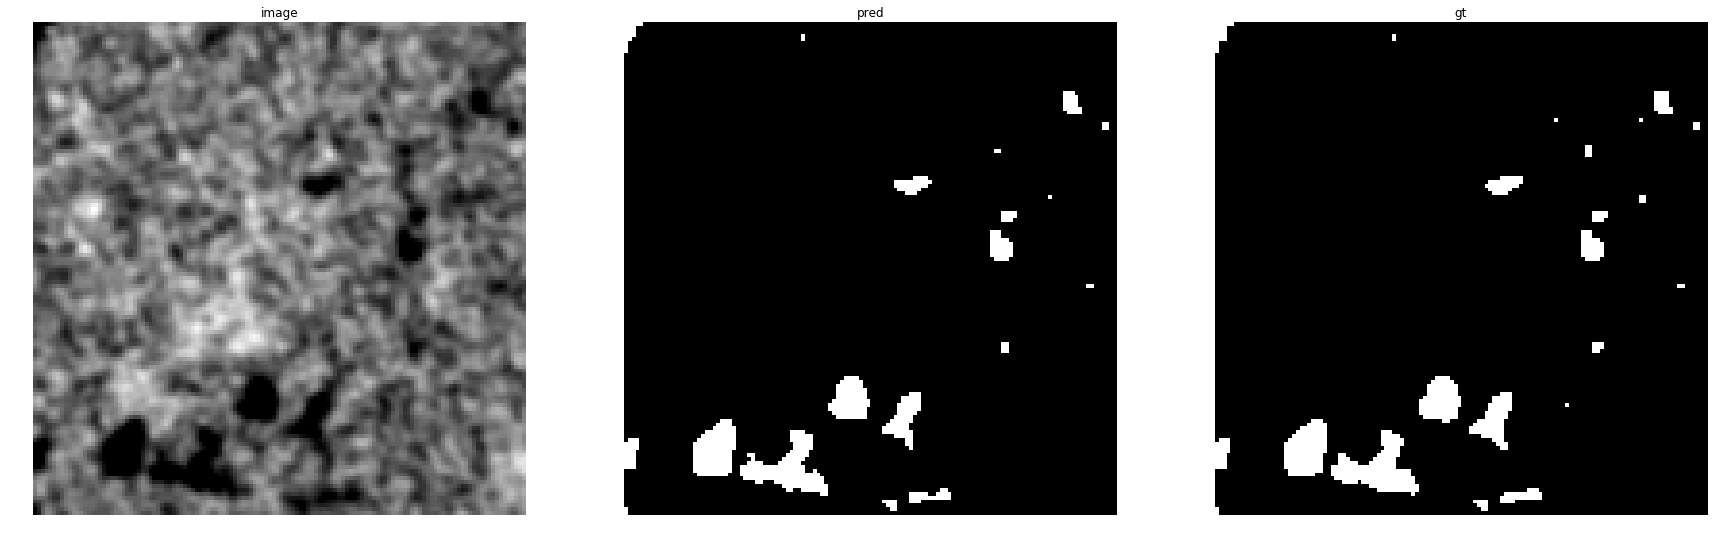

accuracy    : 0.99591064453125
precision   : 0.987987987987988
recall      : 0.9177126917712691
f1          : 0.9515545914678235
pr_auc      : 0.9951354509100859
iou         : 0.9075862068965517


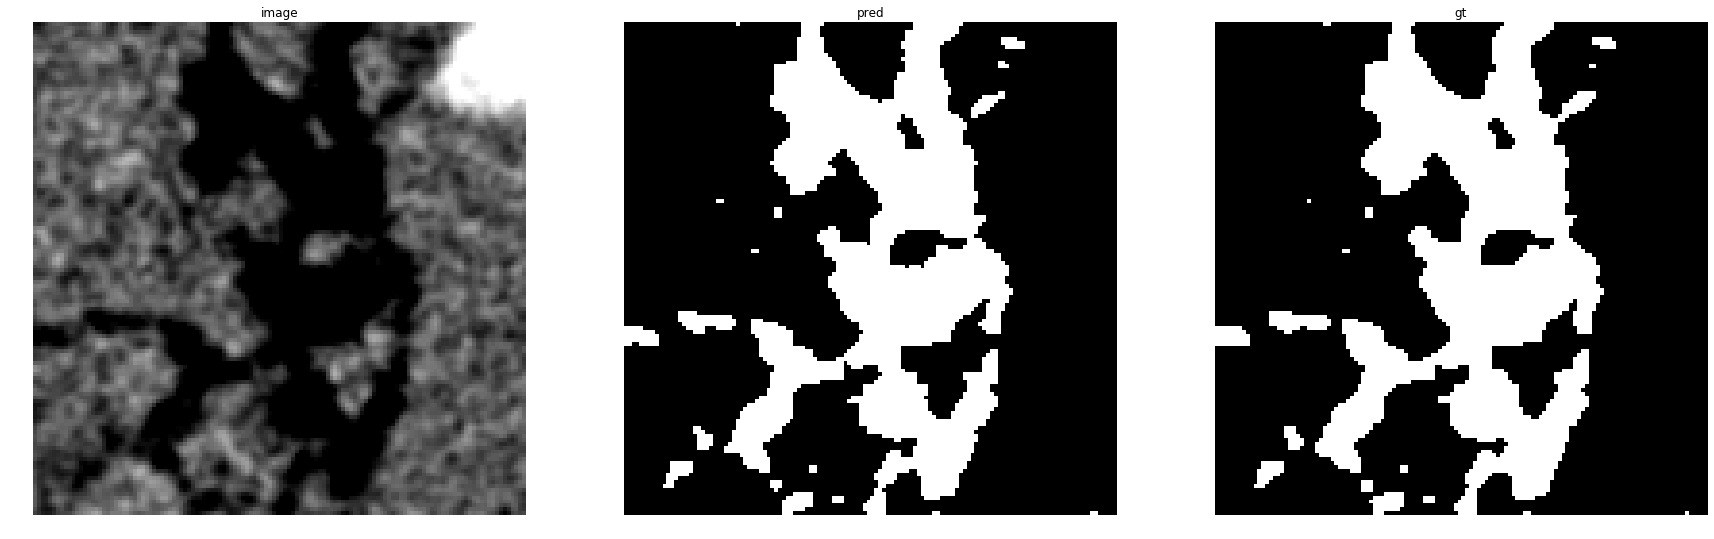

accuracy    : 0.98974609375
precision   : 0.9961328480436761
recall      : 0.9666666666666667
f1          : 0.981178579430876
pr_auc      : 0.9993012764336284
iou         : 0.9630525621288761


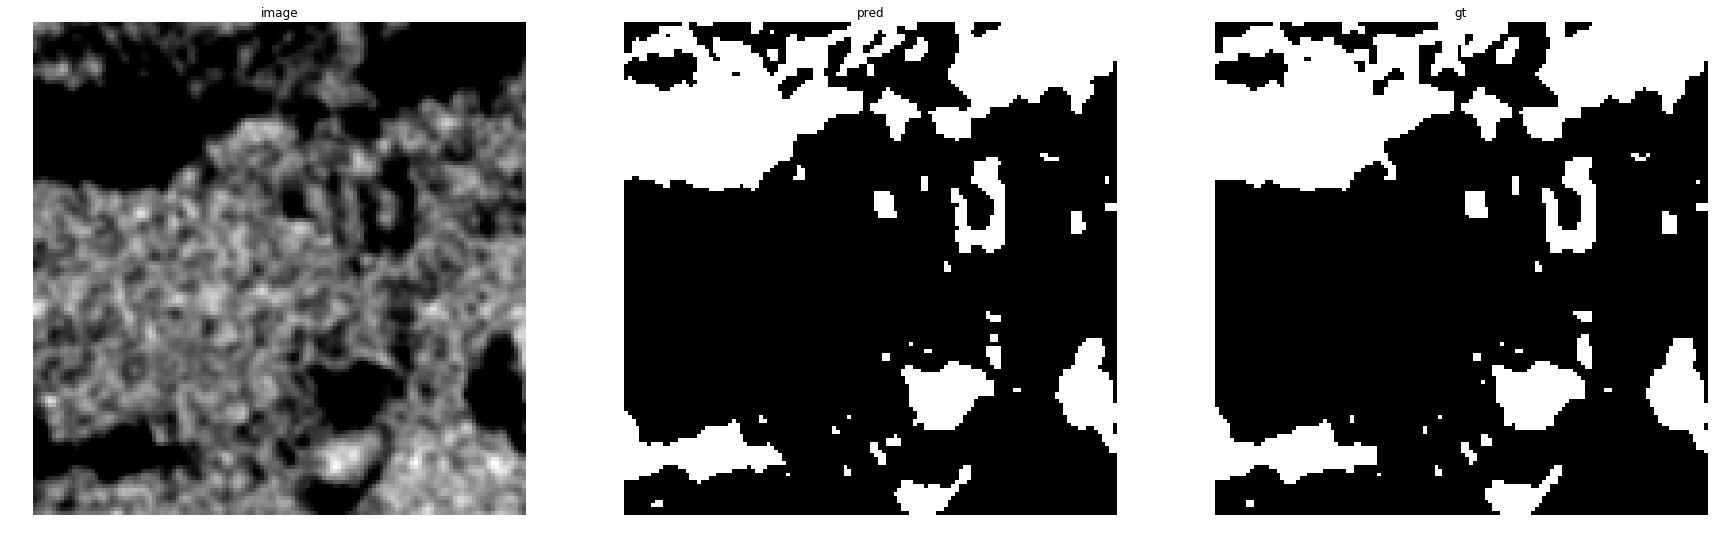

accuracy    : 0.98394775390625
precision   : 0.9952996474735605
recall      : 0.9457347029924074
f1          : 0.9698843467307913
pr_auc      : 0.998264580256134
iou         : 0.9415295686971987


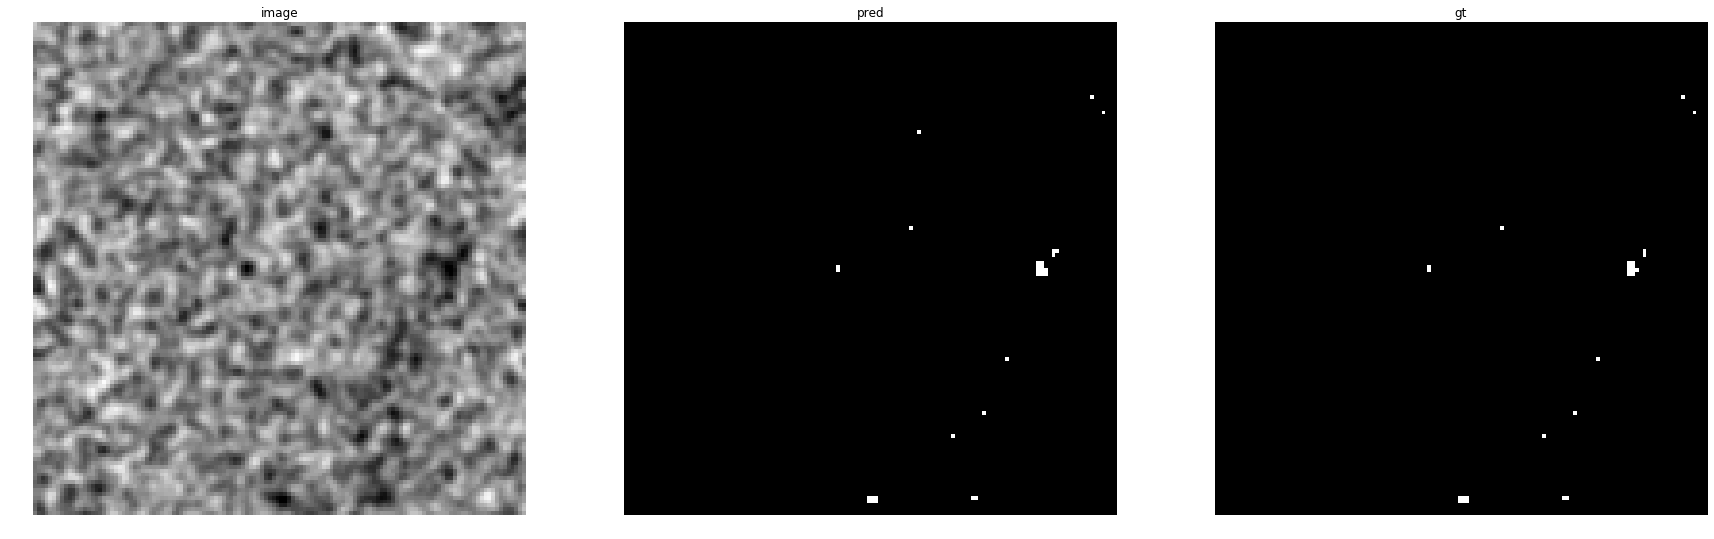

accuracy    : 0.99981689453125
precision   : 0.9
recall      : 1.0
f1          : 0.9473684210526316
pr_auc      : 0.9986772486772484
iou         : 0.9


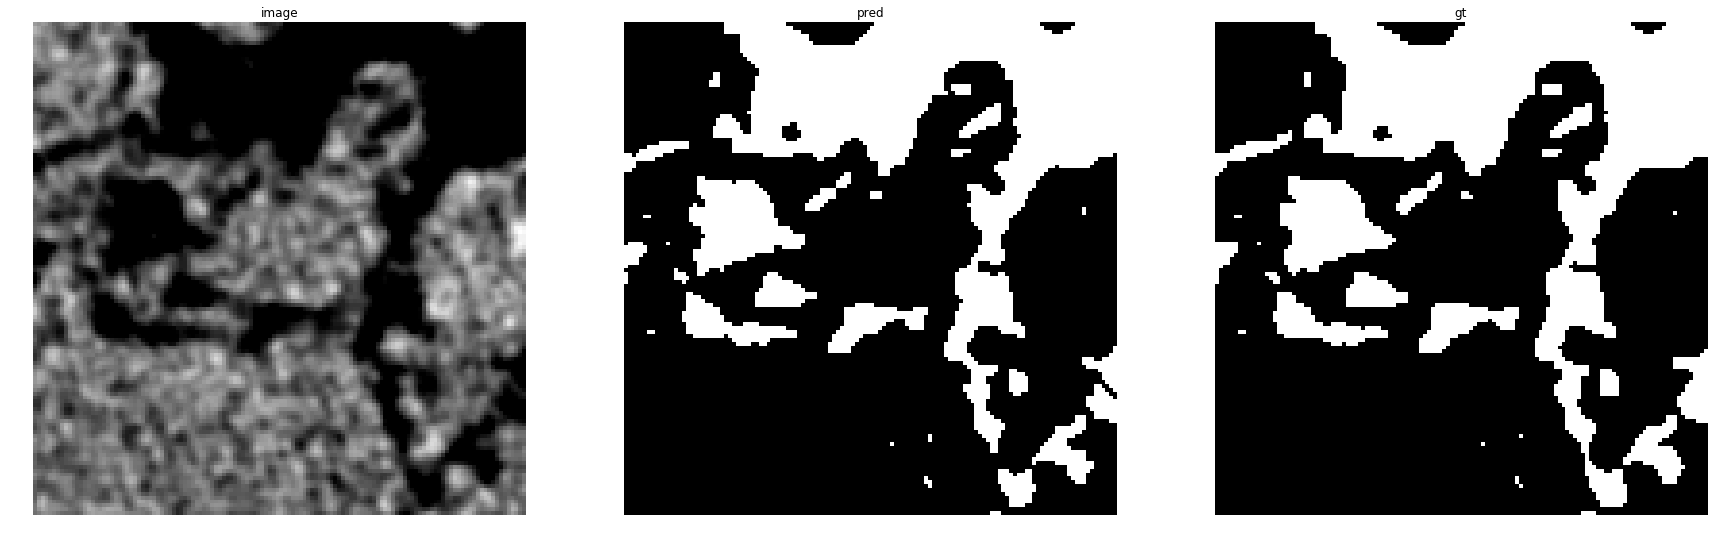

accuracy    : 0.98504638671875
precision   : 0.9955037809115063
recall      : 0.9562230074597565
f1          : 0.9754681085411034
pr_auc      : 0.9988853659390634
iou         : 0.9521110242376857


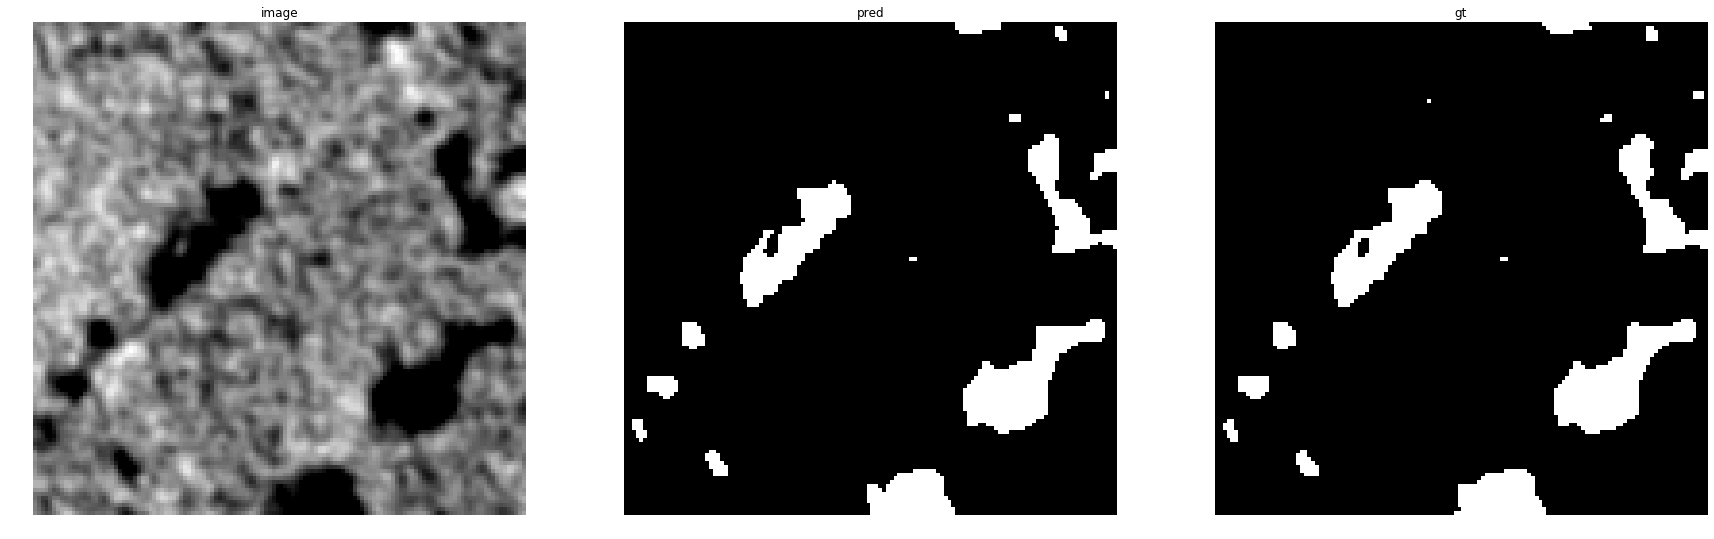

accuracy    : 0.99530029296875
precision   : 0.9966487935656837
recall      : 0.9538165490699166
f1          : 0.9747623729924615
pr_auc      : 0.9986601921550079
iou         : 0.9507672634271099


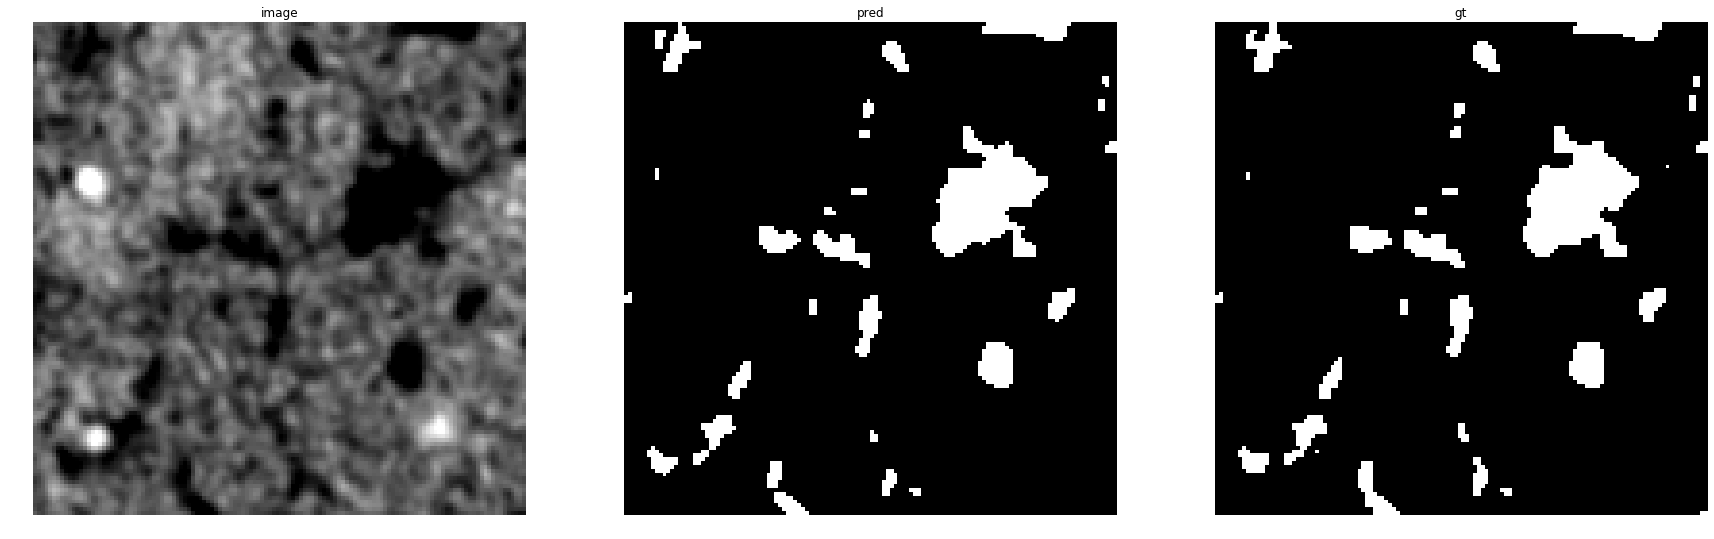

accuracy    : 0.99169921875
precision   : 0.9917910447761195
recall      : 0.9140302613480055
f1          : 0.9513242662848962
pr_auc      : 0.9954798010838556
iou         : 0.9071672354948805


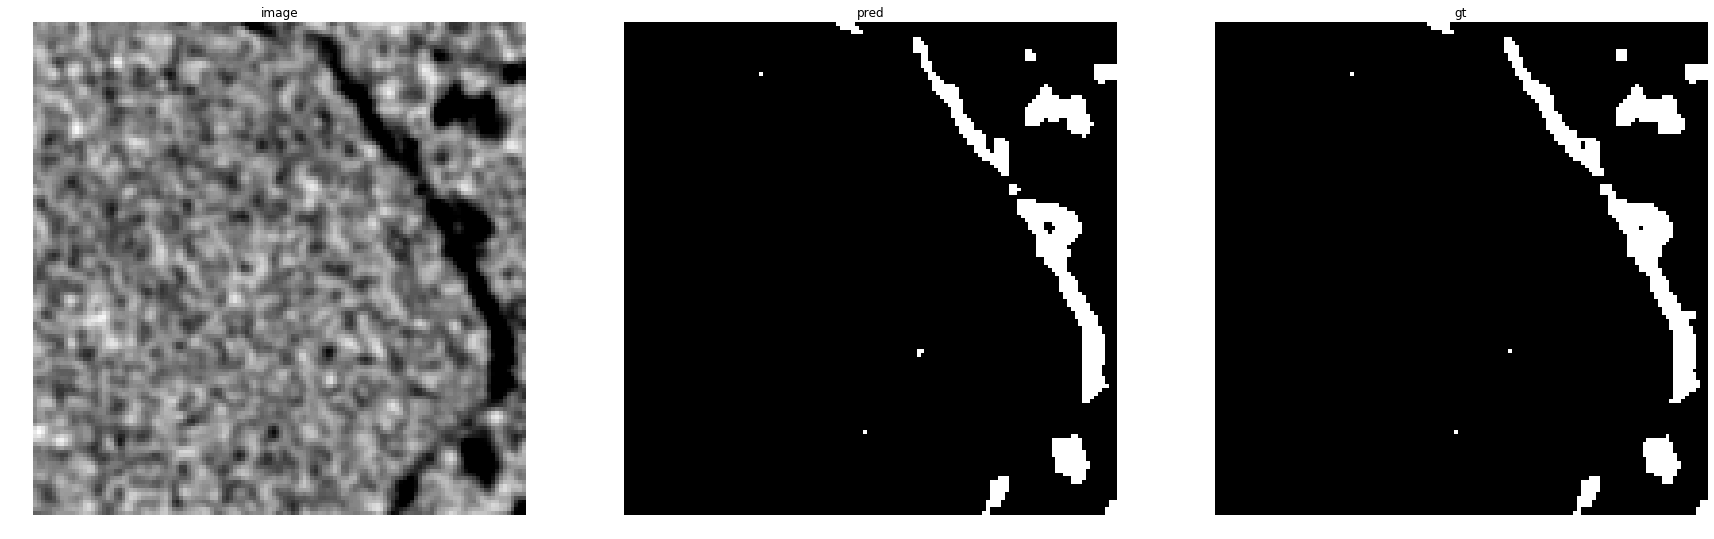

accuracy    : 0.995849609375
precision   : 0.9894366197183099
recall      : 0.934589800443459
f1          : 0.9612314709236032
pr_auc      : 0.9949382044400193
iou         : 0.9253567508232712


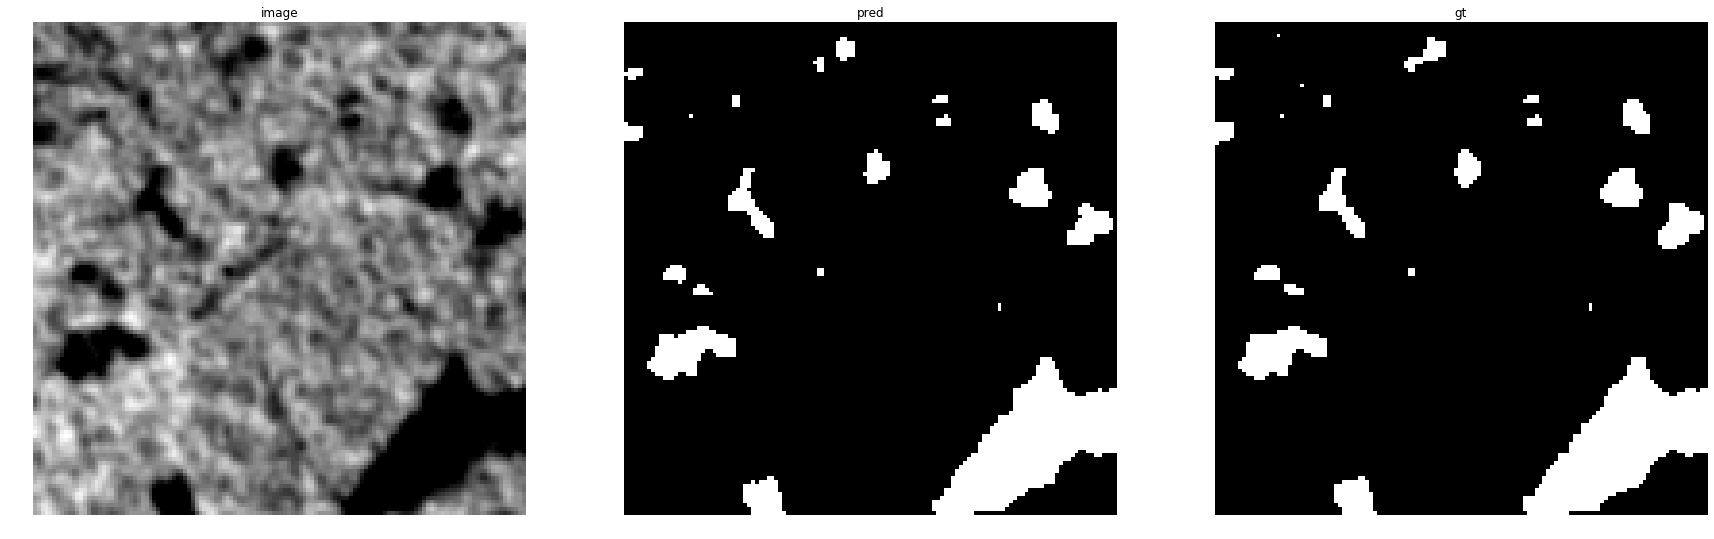

accuracy    : 0.99462890625
precision   : 0.9939759036144579
recall      : 0.9548611111111112
f1          : 0.9740259740259741
pr_auc      : 0.9984004046529165
iou         : 0.9493670886075949


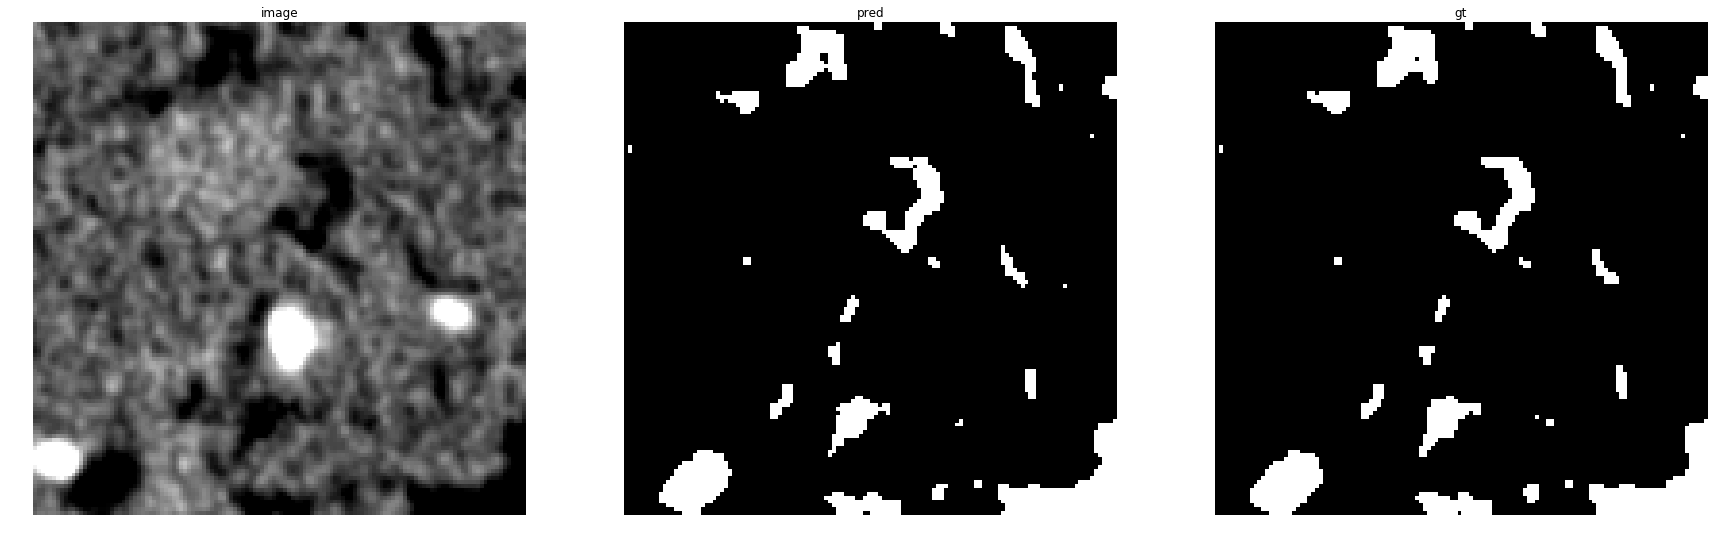

accuracy    : 0.99383544921875
precision   : 0.9854862119013063
recall      : 0.9437109103544128
f1          : 0.9641462548810792
pr_auc      : 0.9966567178929424
iou         : 0.9307745030843043


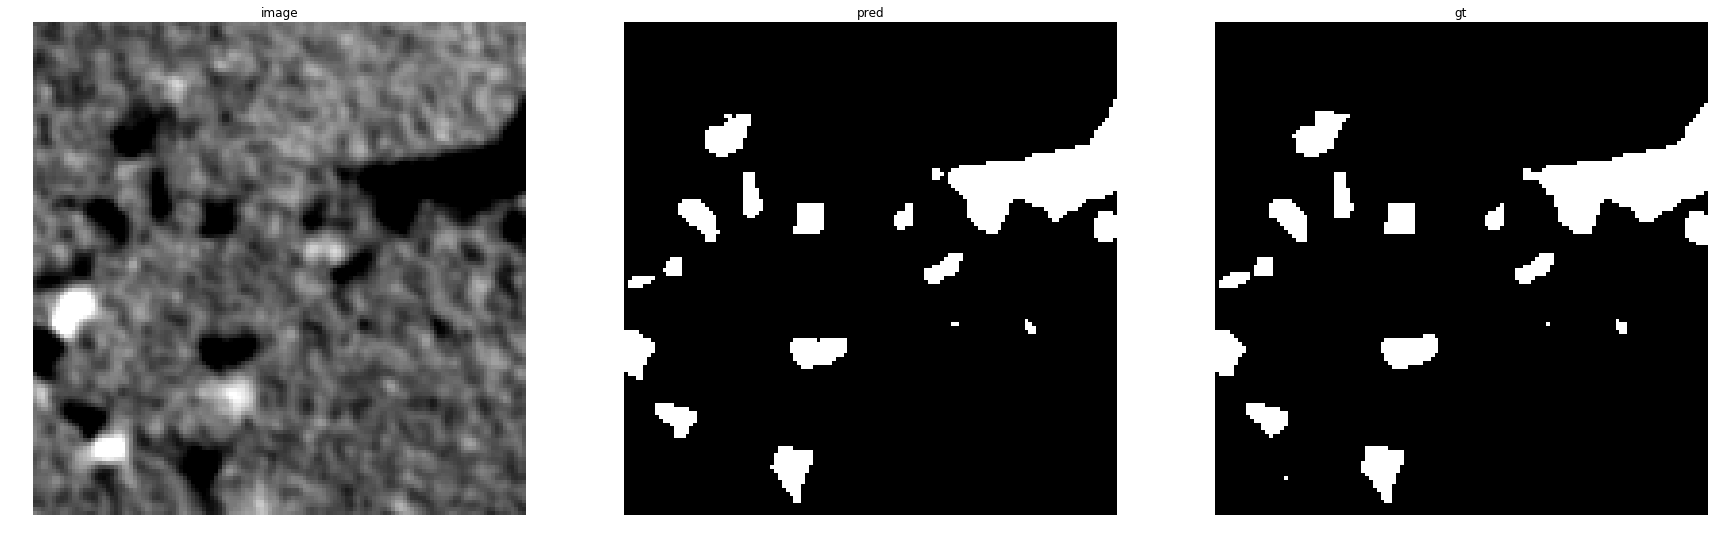

accuracy    : 0.9940185546875
precision   : 0.9922371206774877
recall      : 0.941728064300067
f1          : 0.9663230240549827
pr_auc      : 0.9980191449562457
iou         : 0.9348404255319149


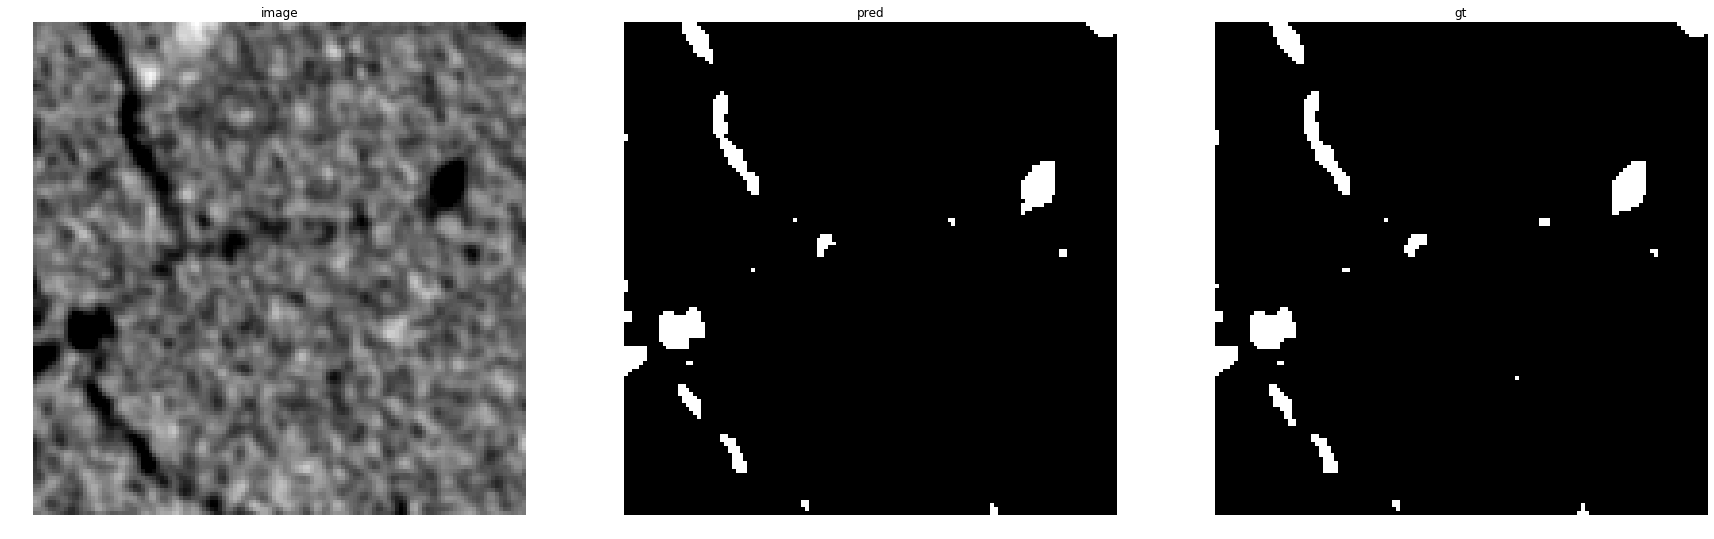

accuracy    : 0.9971923828125
precision   : 0.9881422924901185
recall      : 0.9259259259259259
f1          : 0.9560229445506693
pr_auc      : 0.9971436879915573
iou         : 0.9157509157509157


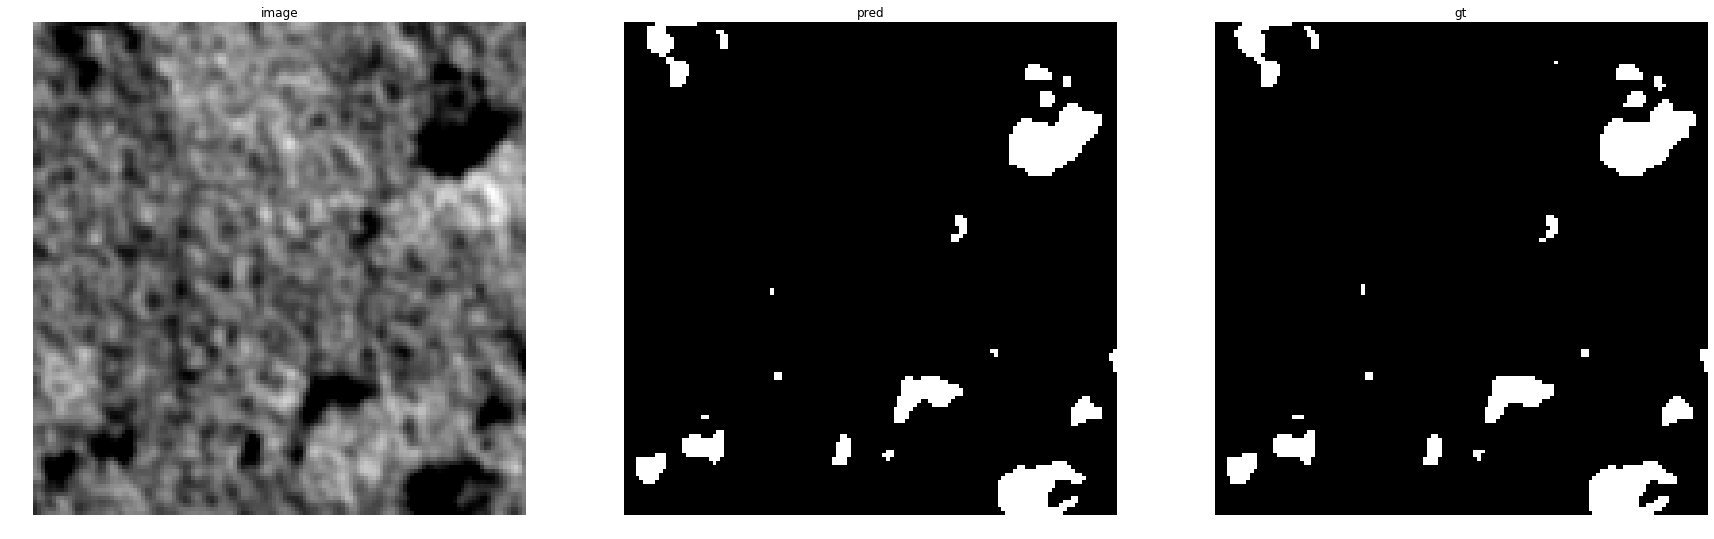

accuracy    : 0.995361328125
precision   : 0.9949031600407747
recall      : 0.9321872015281757
f1          : 0.9625246548323471
pr_auc      : 0.9967791619567103
iou         : 0.9277566539923955


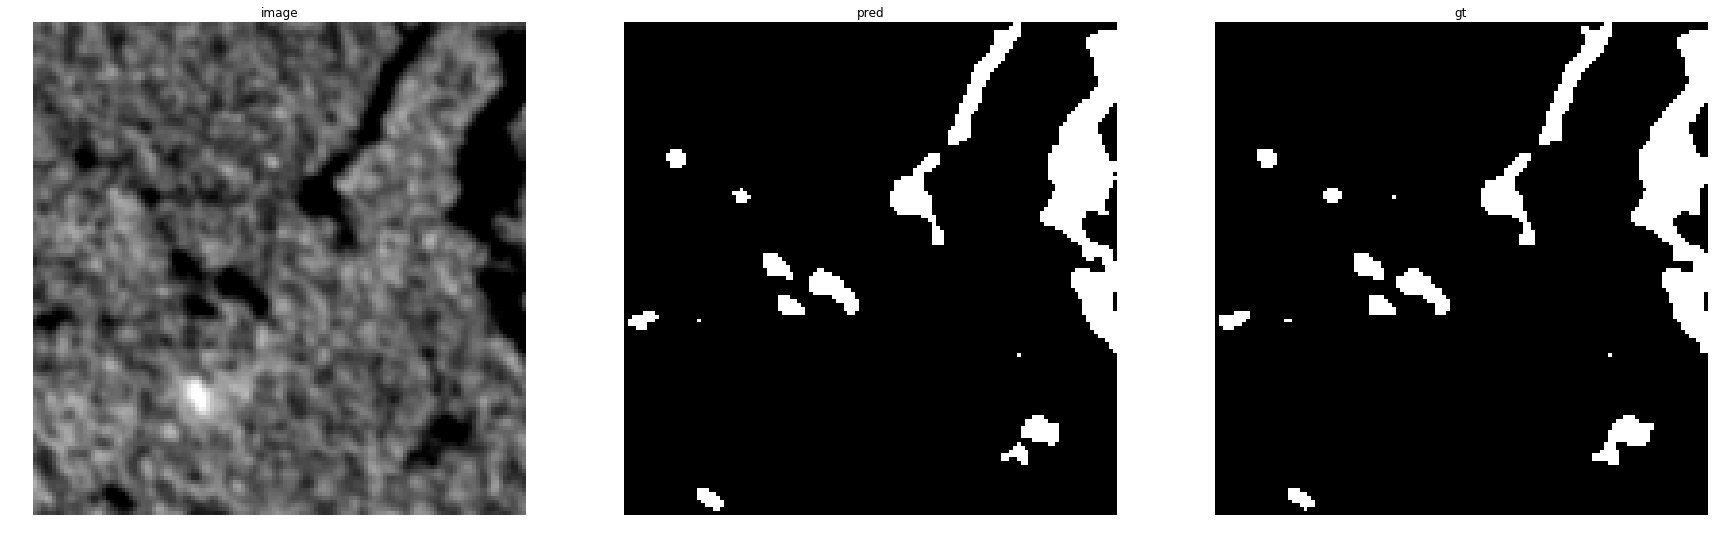

accuracy    : 0.99444580078125
precision   : 0.9934876989869754
recall      : 0.9436426116838488
f1          : 0.9679238632358125
pr_auc      : 0.9982002941323932
iou         : 0.9378415300546448


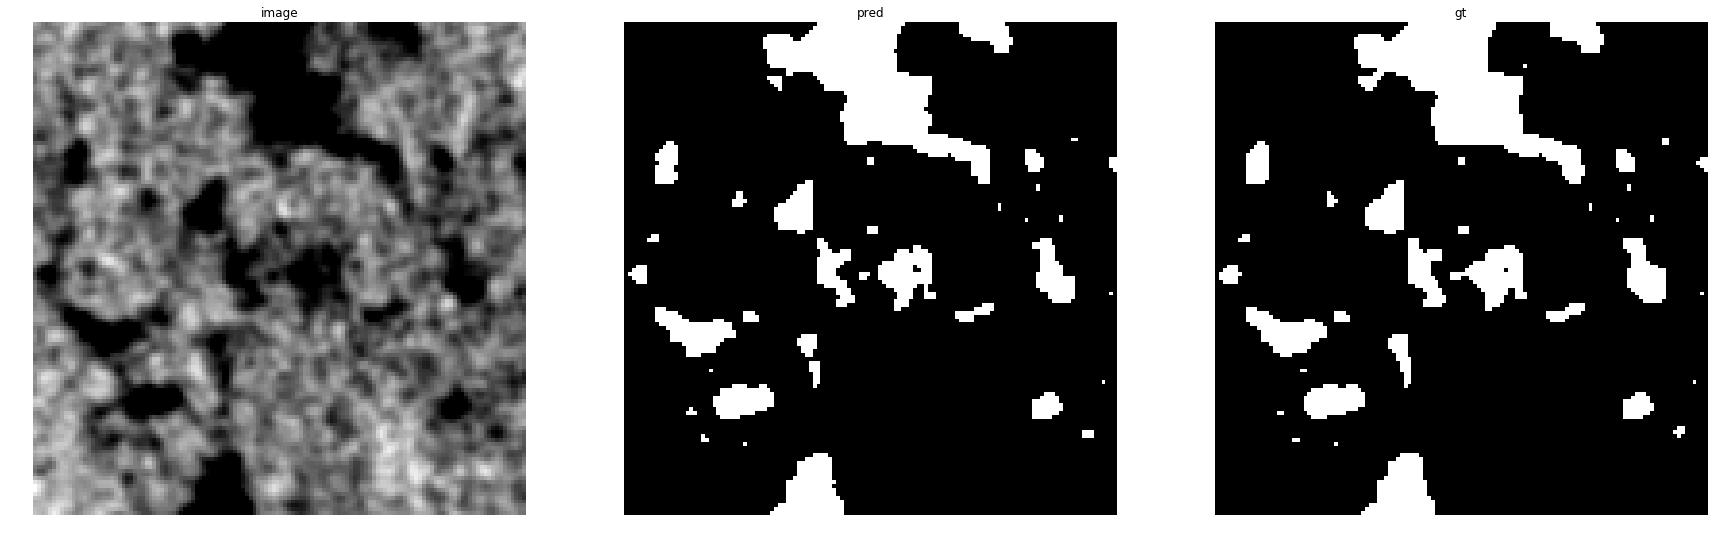

accuracy    : 0.99224853515625
precision   : 0.9950361010830325
recall      : 0.950021542438604
f1          : 0.972007934758651
pr_auc      : 0.9978892178510232
iou         : 0.9455403087478559


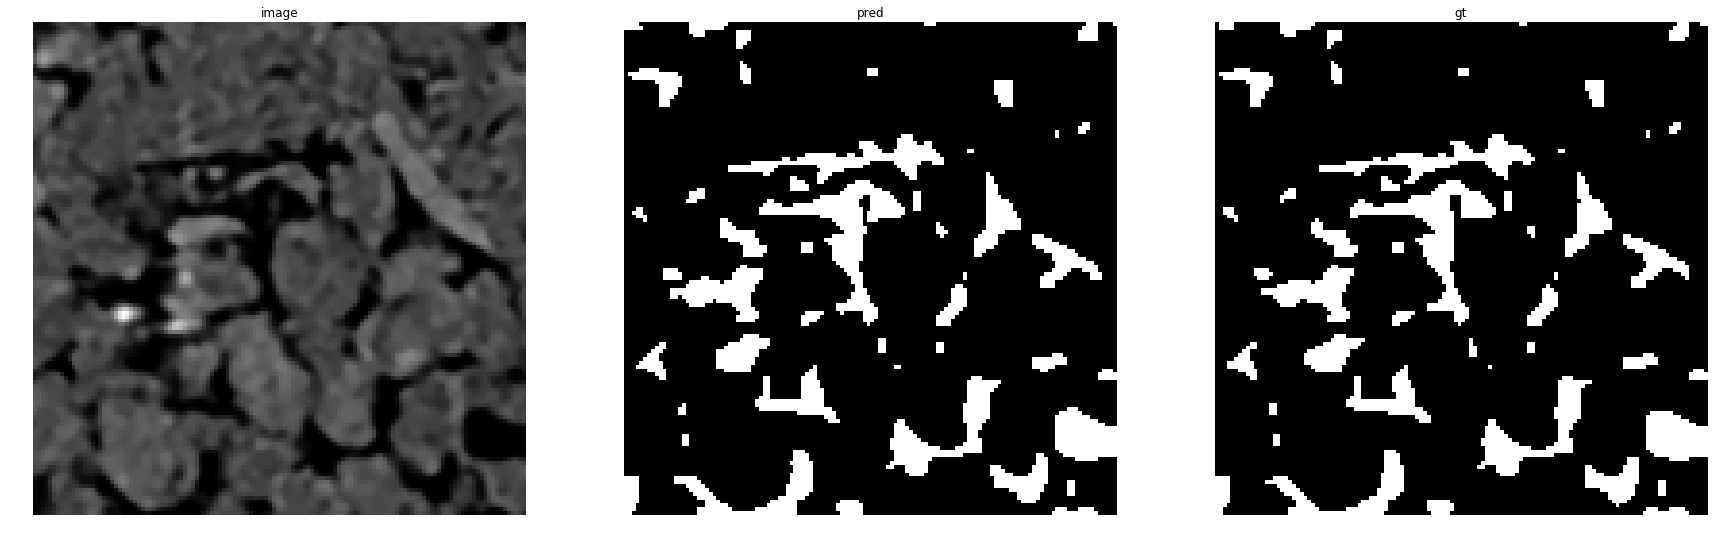

accuracy    : 0.99237060546875
precision   : 0.9580475998386446
recall      : 0.9912353923205343
f1          : 0.9743589743589743
pr_auc      : 0.9982114571723975
iou         : 0.95


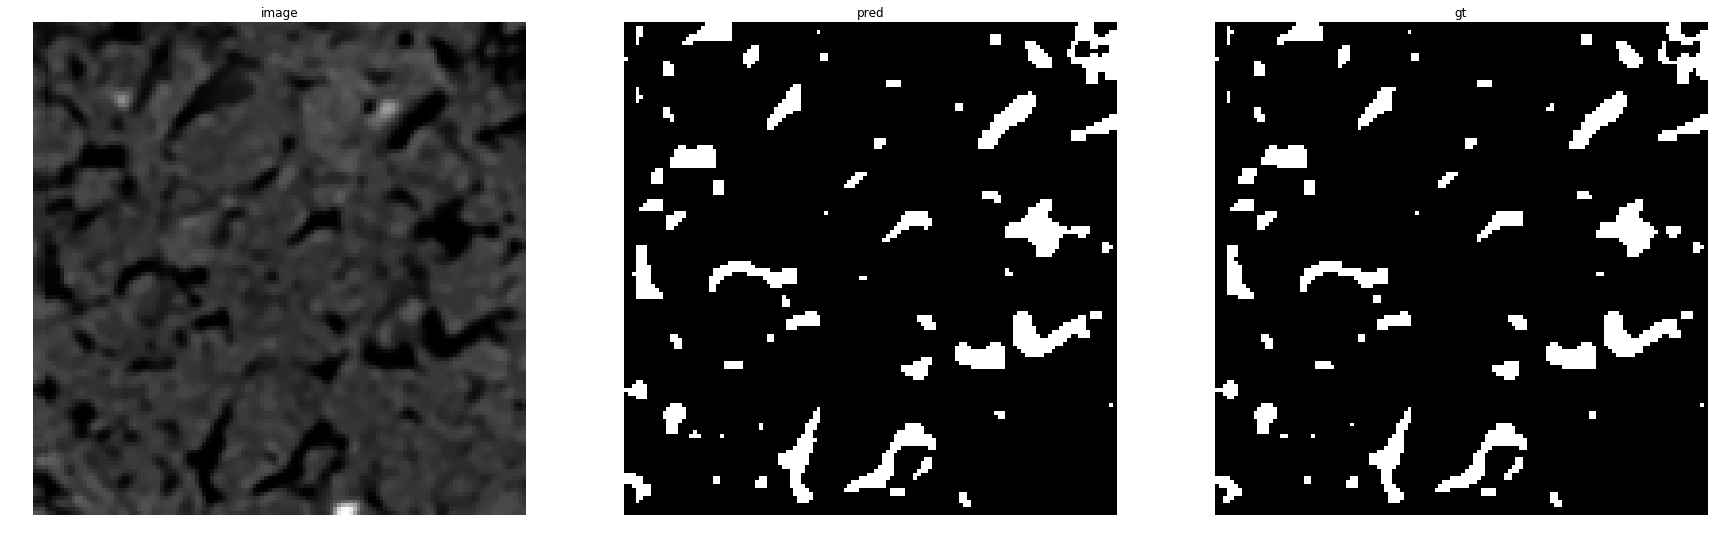

accuracy    : 0.99298095703125
precision   : 0.9399624765478424
recall      : 0.9875164257555847
f1          : 0.9631528356296059
pr_auc      : 0.9963536530764947
iou         : 0.9289245982694685


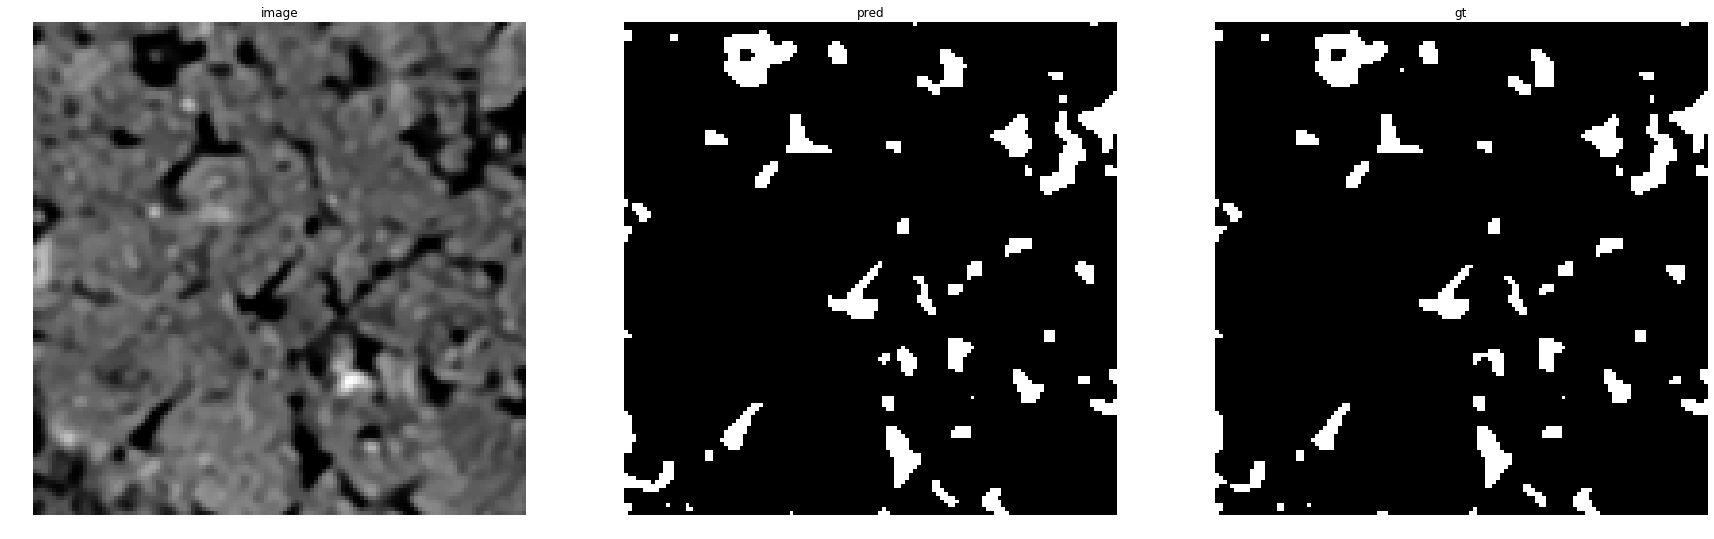

accuracy    : 0.99481201171875
precision   : 0.9486988847583643
recall      : 0.9876160990712074
f1          : 0.9677664012135002
pr_auc      : 0.9973434142115101
iou         : 0.9375459221160911


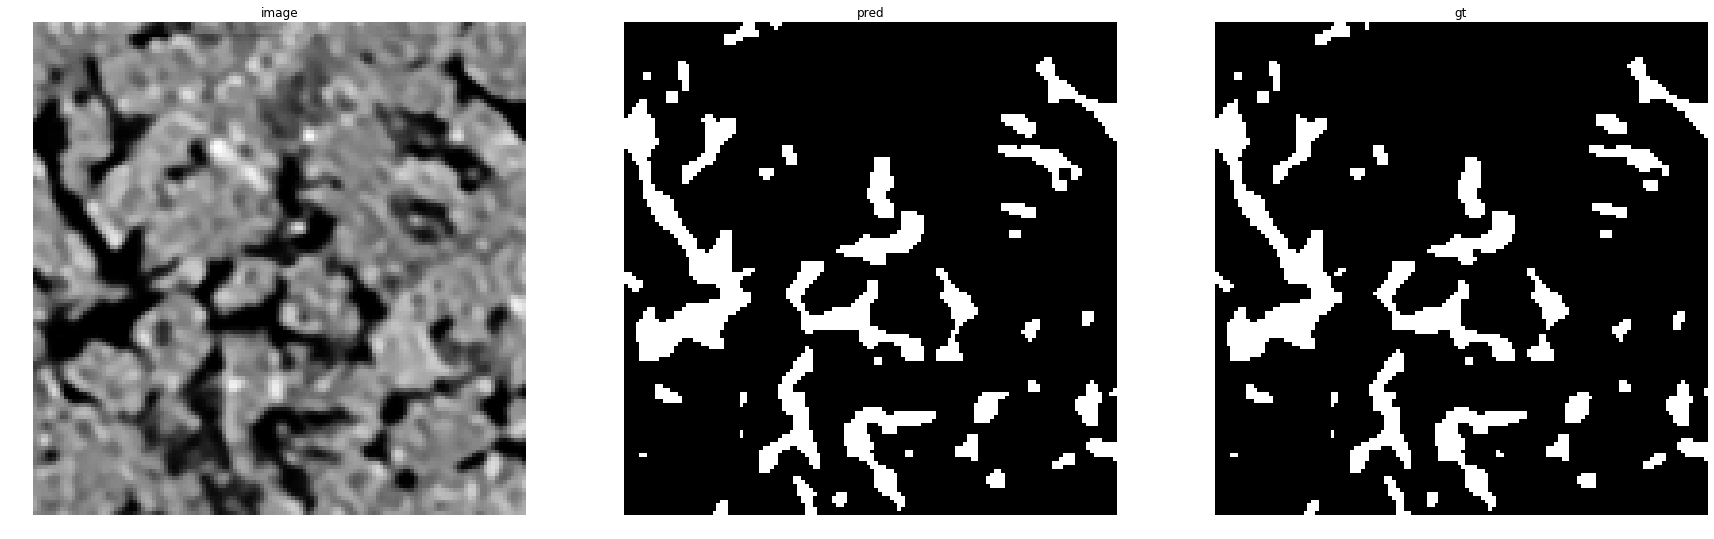

accuracy    : 0.9913330078125
precision   : 0.951340206185567
recall      : 0.9897039897039897
f1          : 0.9701429772918418
pr_auc      : 0.9972366469301708
iou         : 0.9420171498570845


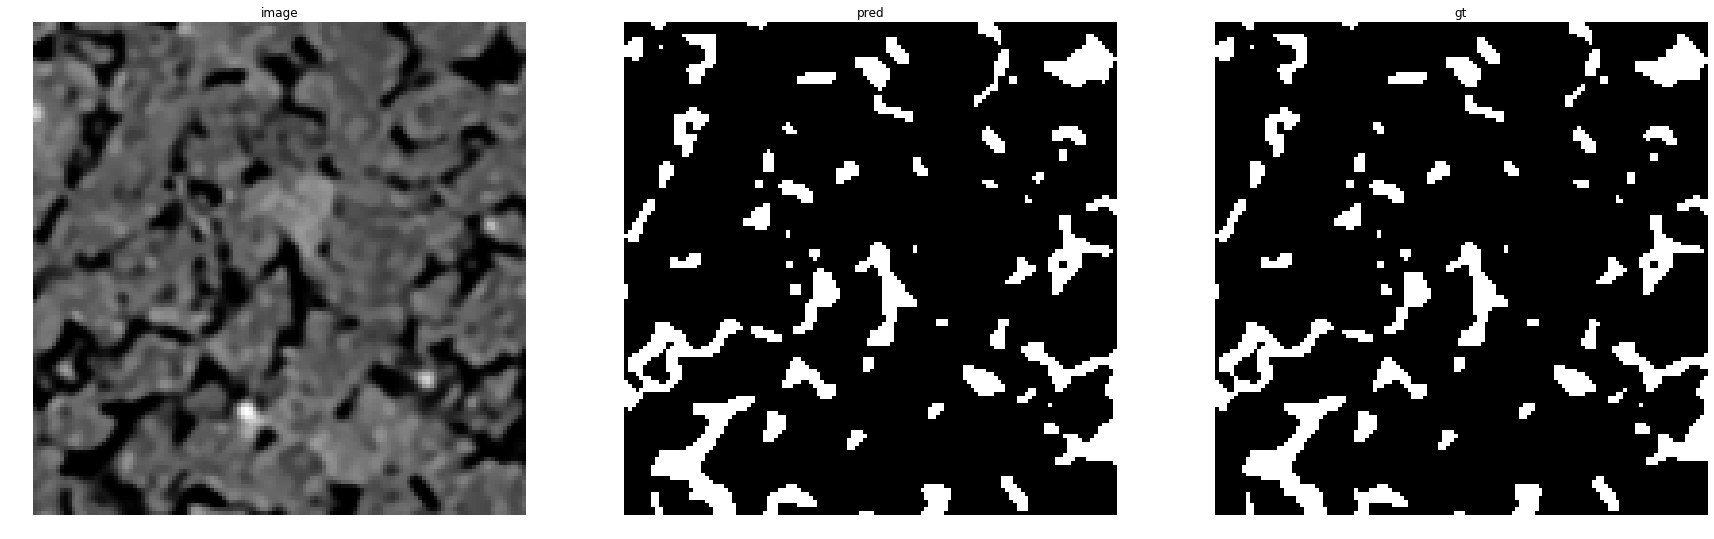

accuracy    : 0.9920654296875
precision   : 0.9556775010552976
recall      : 0.9890782000873743
f1          : 0.9720910261914985
pr_auc      : 0.9977877932323276
iou         : 0.9456975772765246


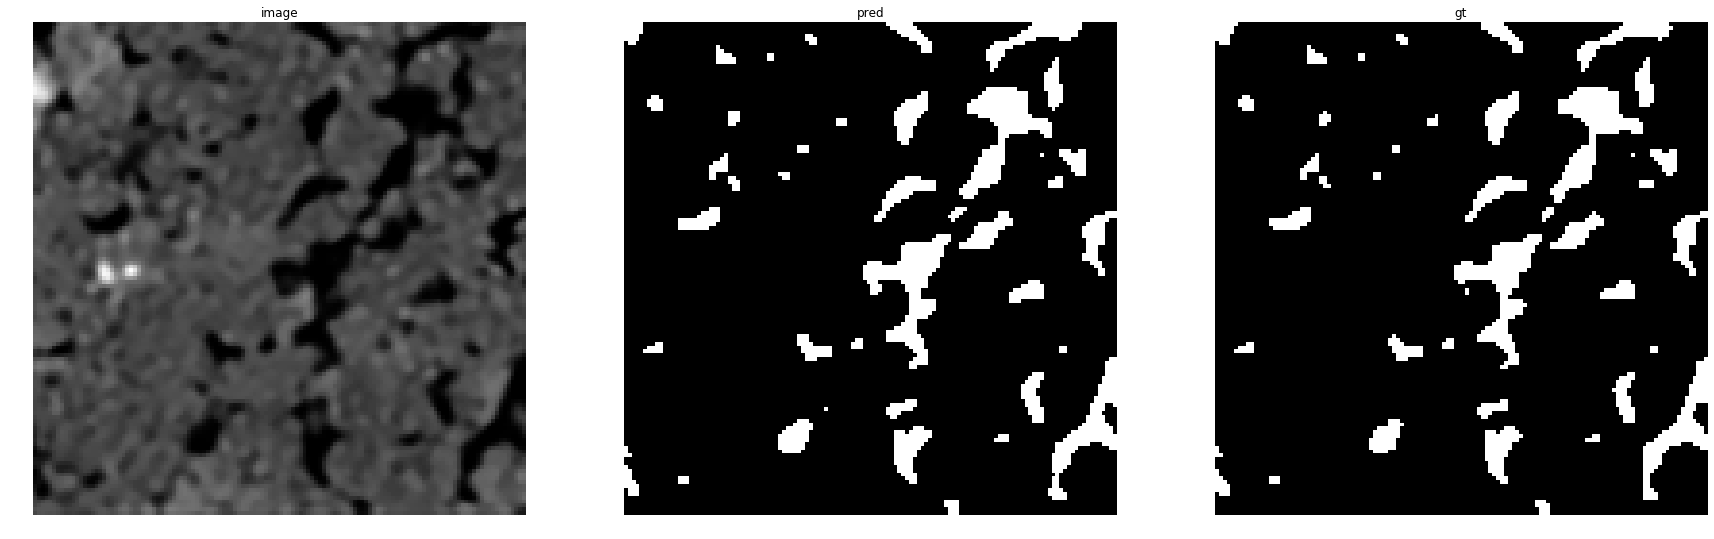

accuracy    : 0.99407958984375
precision   : 0.9519015659955258
recall      : 0.9935785172212492
f1          : 0.9722936303913167
pr_auc      : 0.9978516736072542
iou         : 0.9460811561978877


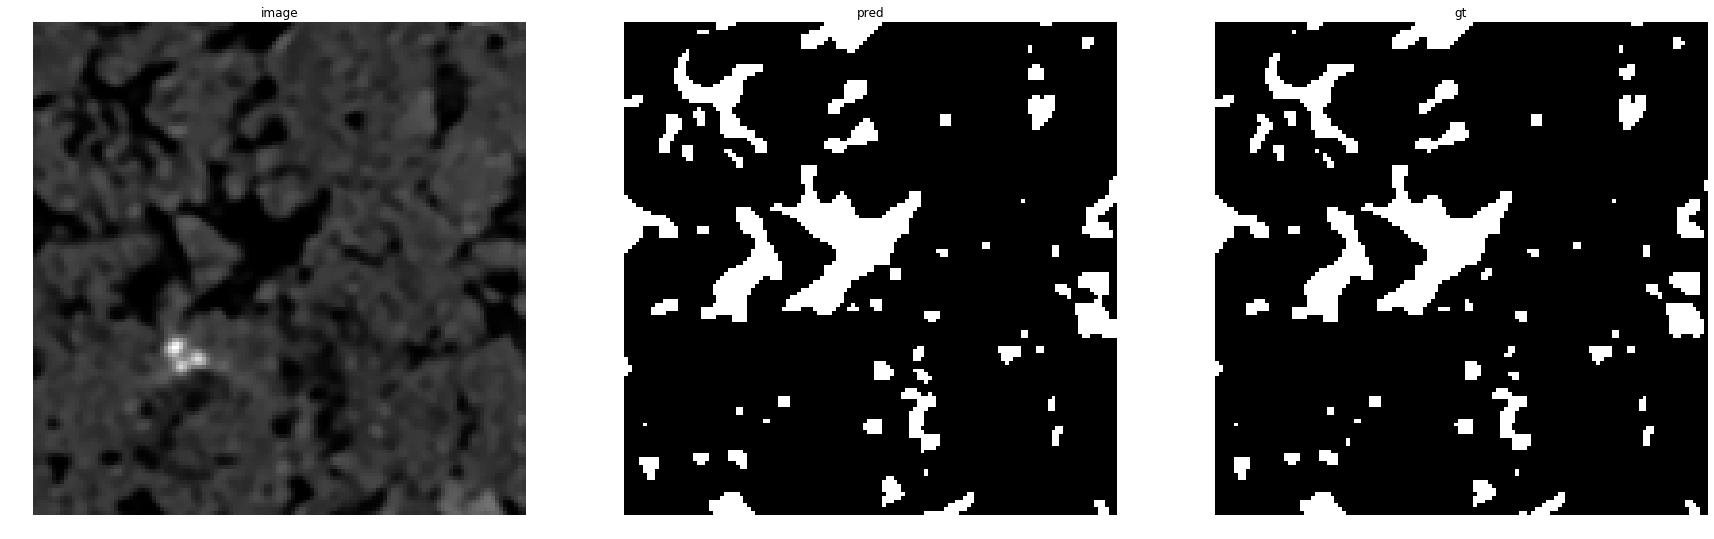

accuracy    : 0.99078369140625
precision   : 0.9325789721829326
recall      : 0.9959718026183283
f1          : 0.9632335037740443
pr_auc      : 0.9977768607678771
iou         : 0.9290746829497417


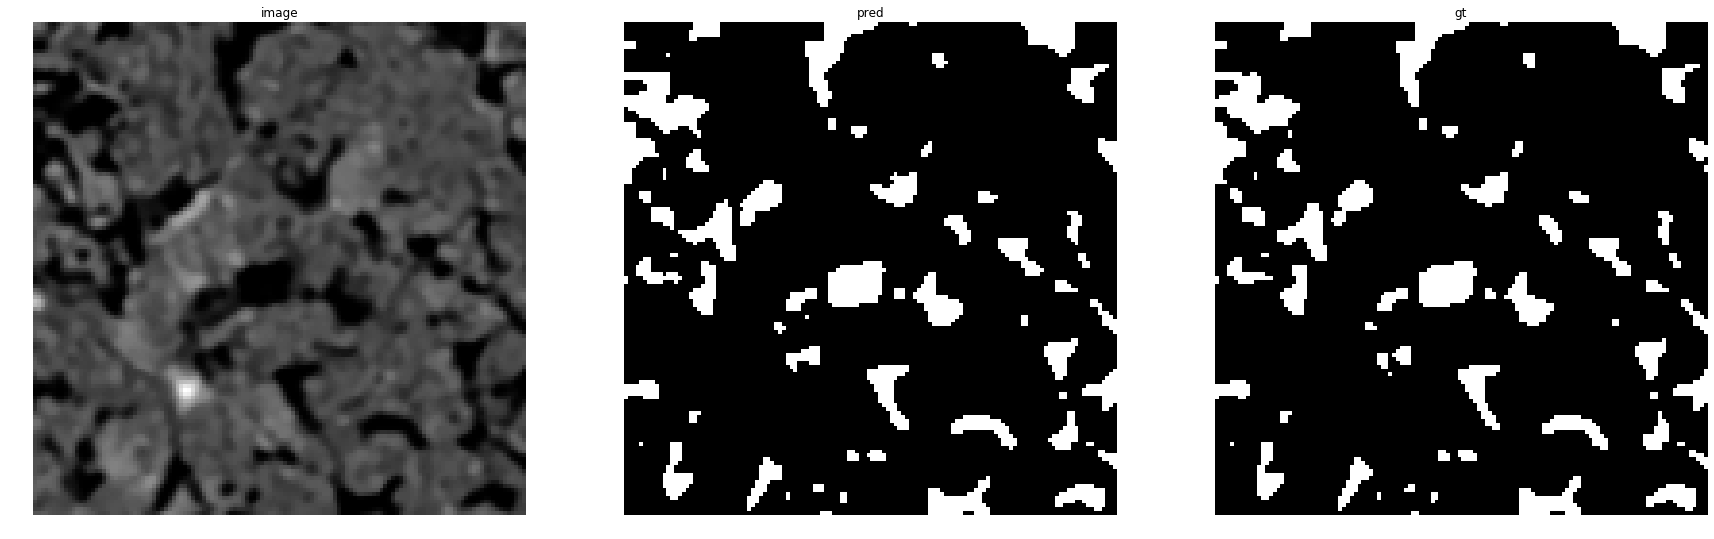

accuracy    : 0.99212646484375
precision   : 0.9496434937611408
recall      : 0.9925477410340009
f1          : 0.9706217262582554
pr_auc      : 0.9978750618163663
iou         : 0.9429203539823009


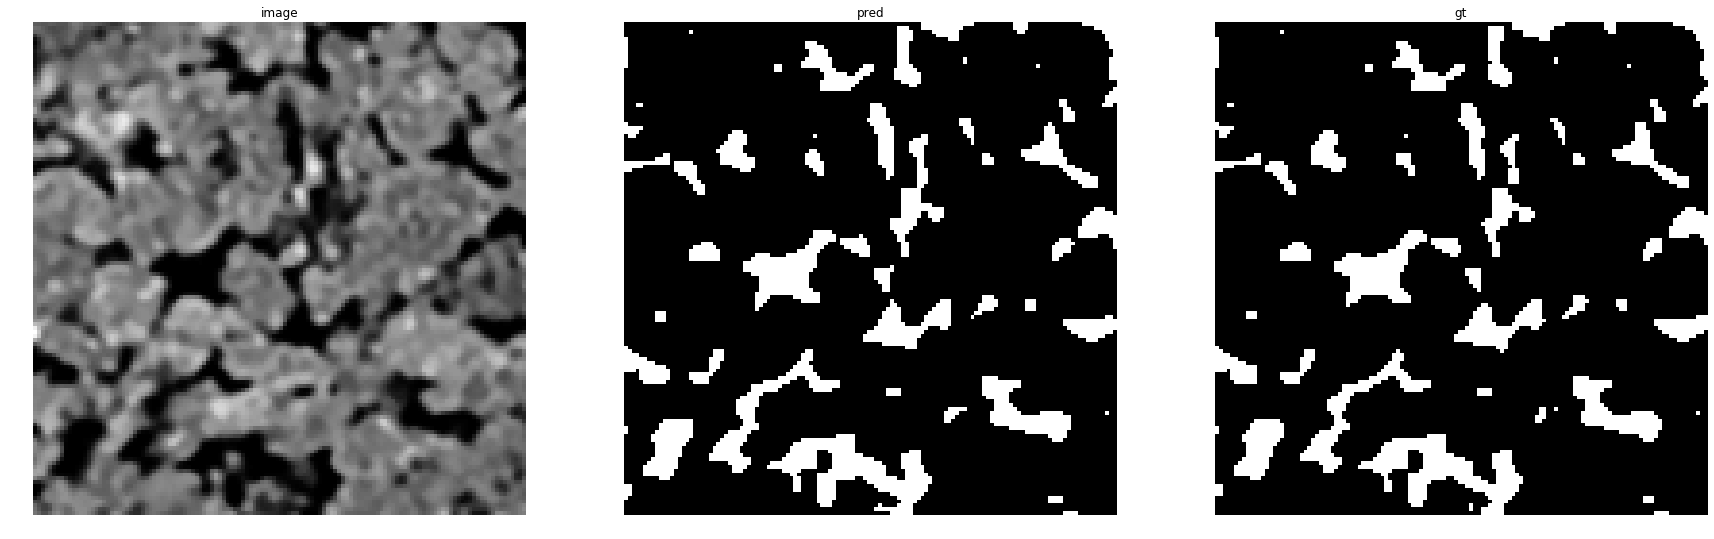

accuracy    : 0.9925537109375
precision   : 0.9561866125760649
recall      : 0.9940953184310417
f1          : 0.9747725392886684
pr_auc      : 0.9983645473561877
iou         : 0.9507866075030255


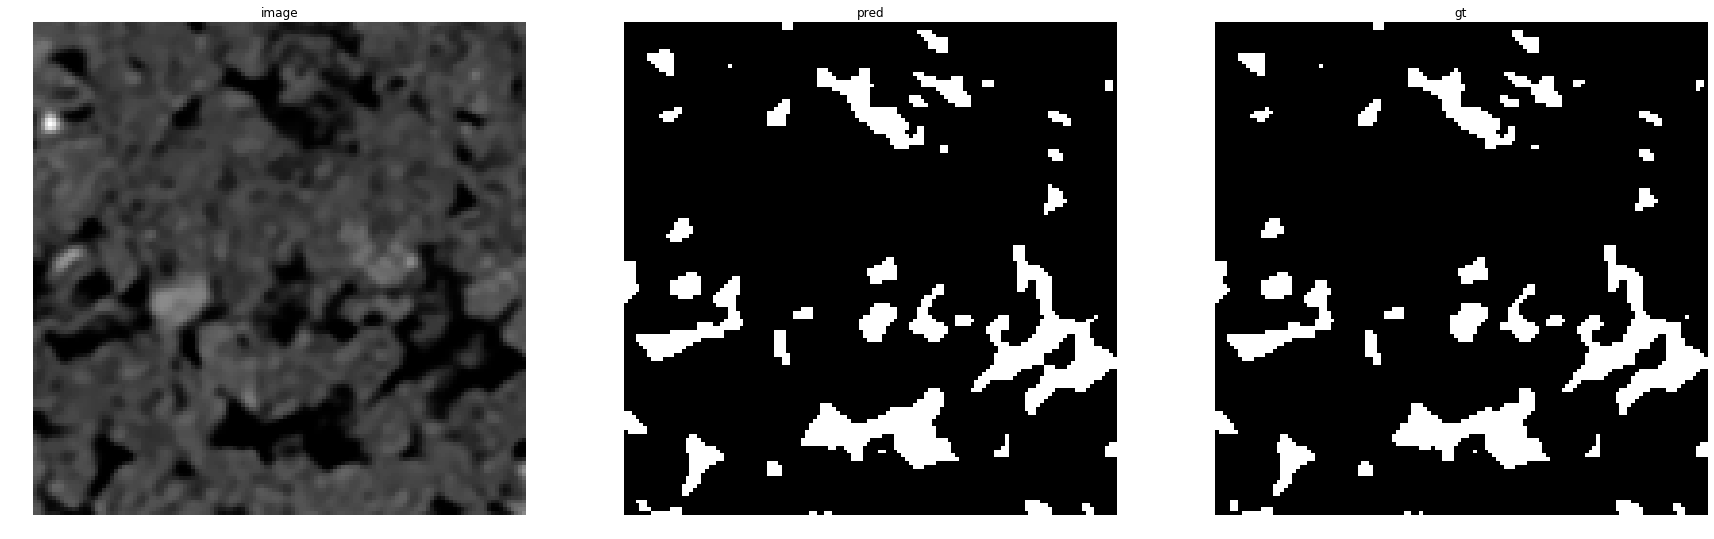

accuracy    : 0.992919921875
precision   : 0.9519184069936862
recall      : 0.9914011127971675
f1          : 0.9712586719524282
pr_auc      : 0.9977026780675438
iou         : 0.9441233140655106


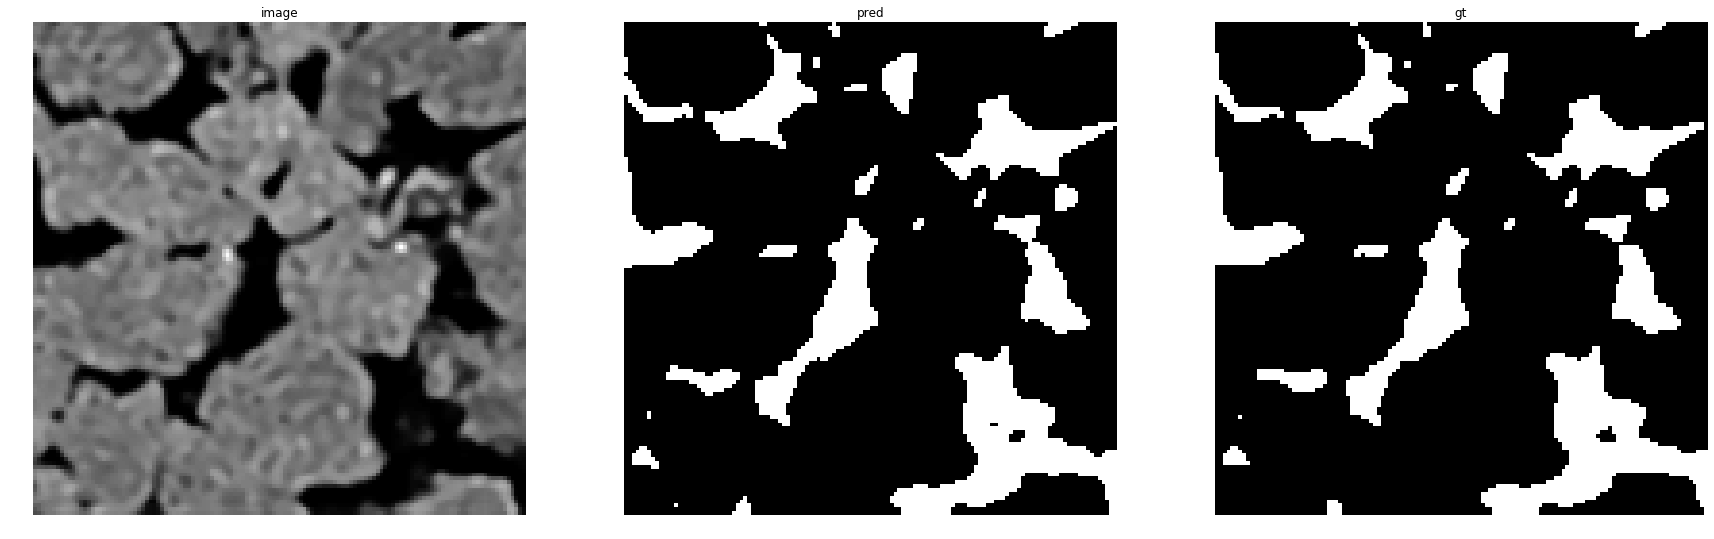

accuracy    : 0.9921875
precision   : 0.9733924611973392
recall      : 0.9858838626884825
f1          : 0.9795983423653172
pr_auc      : 0.9988760895905807
iou         : 0.9600124960949703


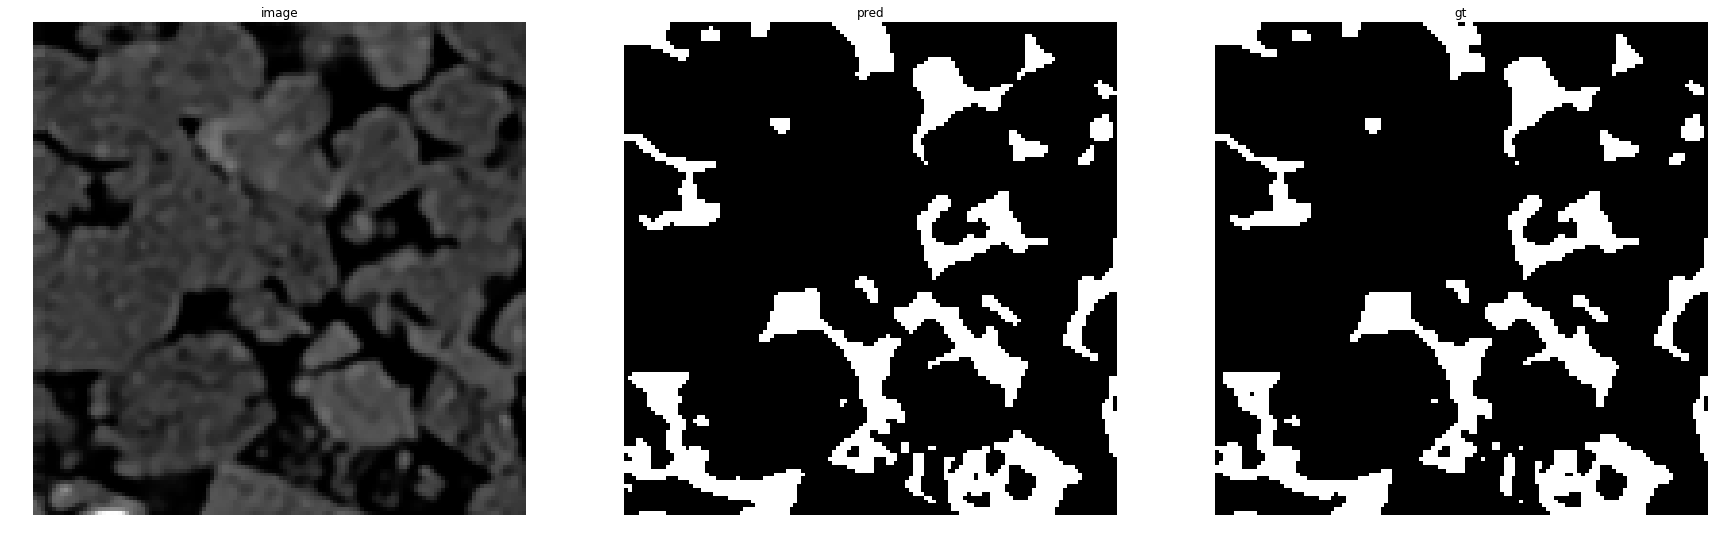

accuracy    : 0.988037109375
precision   : 0.9506057781919851
recall      : 0.9880529544720698
f1          : 0.9689677010766307
pr_auc      : 0.9975154030646127
iou         : 0.9398034398034398


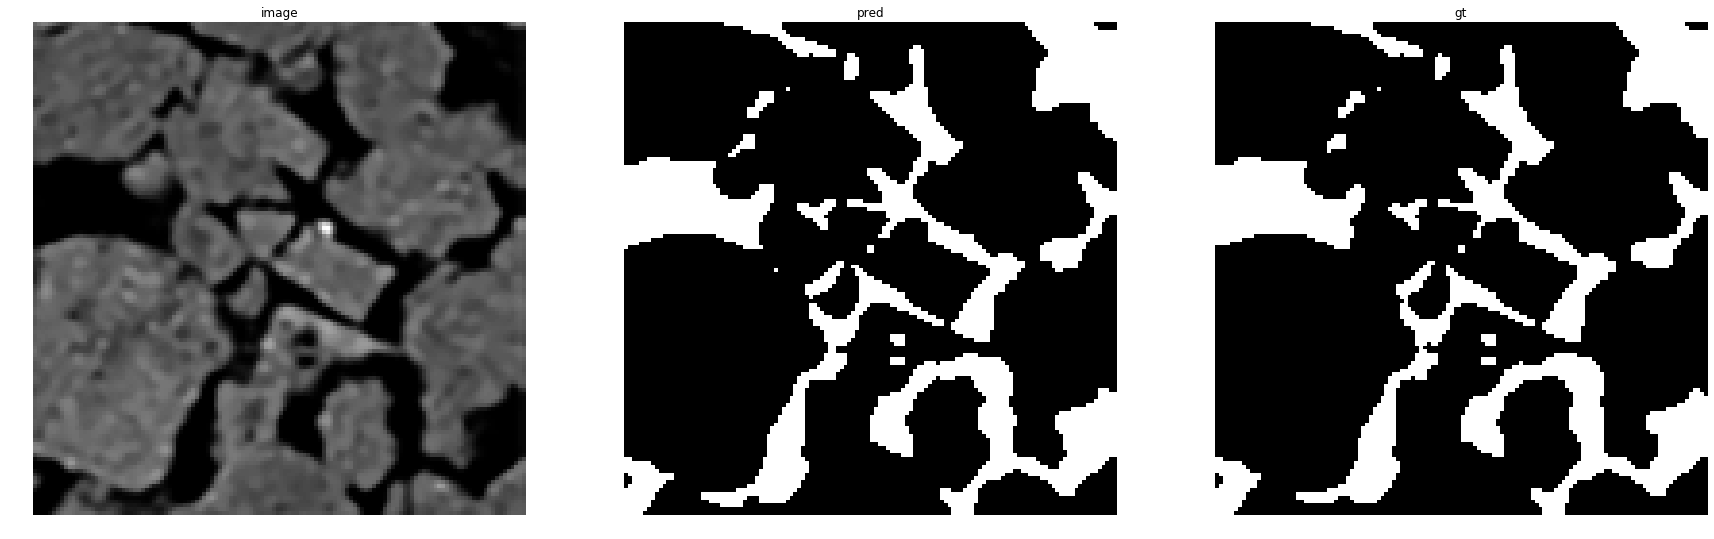

accuracy    : 0.9921875
precision   : 0.9765807962529274
recall      : 0.9899762595621208
f1          : 0.9832329054231072
pr_auc      : 0.9992181553982541
iou         : 0.9670188095851585


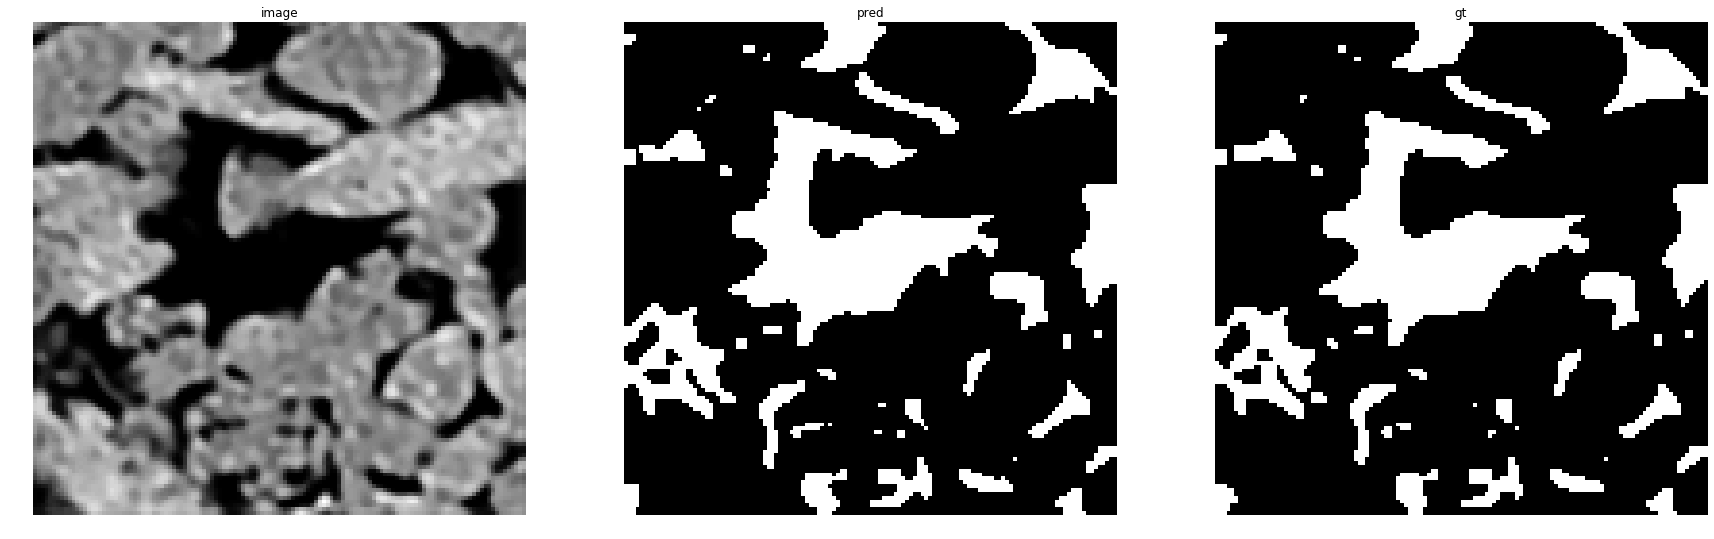

accuracy    : 0.988037109375
precision   : 0.964935064935065
recall      : 0.9838453389830508
f1          : 0.974298452661946
pr_auc      : 0.99830045788732
iou         : 0.9498849399130657


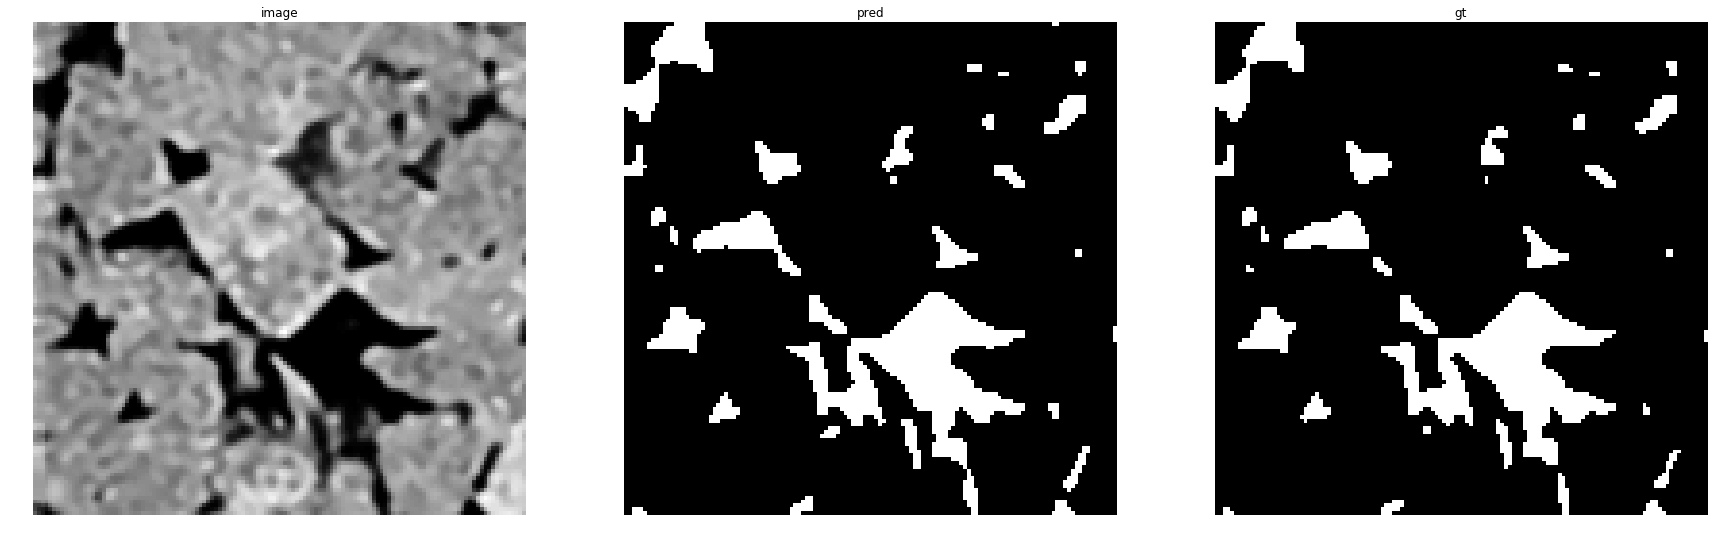

accuracy    : 0.99078369140625
precision   : 0.9466791393826005
recall      : 0.9820475497331392
f1          : 0.9640390569183139
pr_auc      : 0.9973673904257897
iou         : 0.9305747126436782


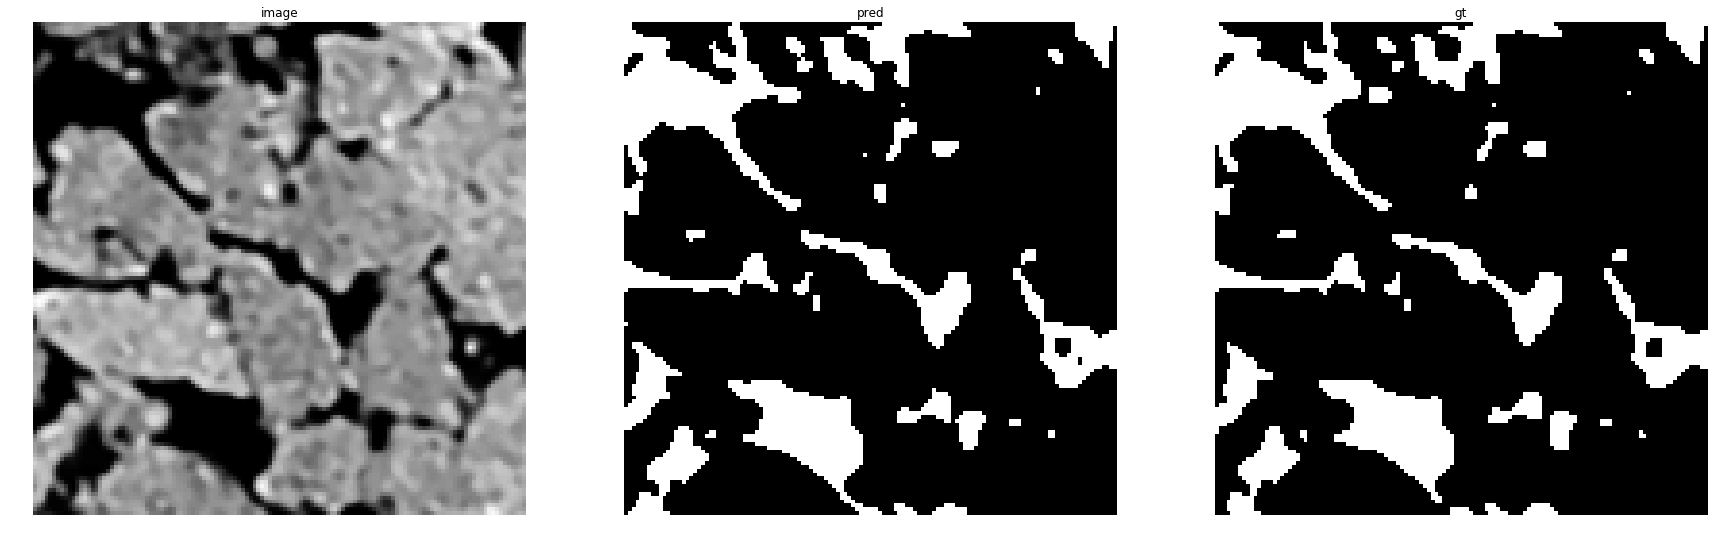

accuracy    : 0.9893798828125
precision   : 0.9621809013551844
recall      : 0.9826198905696814
f1          : 0.9722929936305733
pr_auc      : 0.9979177774950411
iou         : 0.9460799504183453


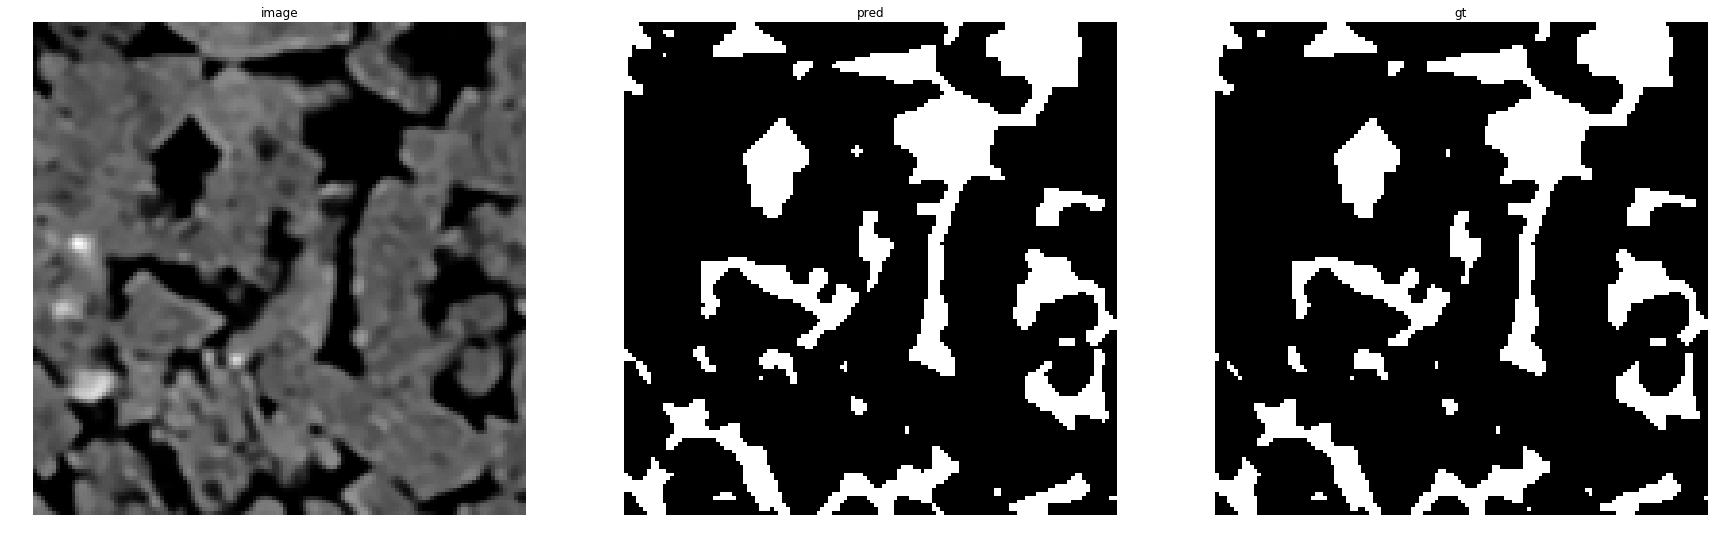

accuracy    : 0.98773193359375
precision   : 0.9579923622476814
recall      : 0.9867940432705816
f1          : 0.9721799307958476
pr_auc      : 0.9983745858294891
iou         : 0.9458658766496095


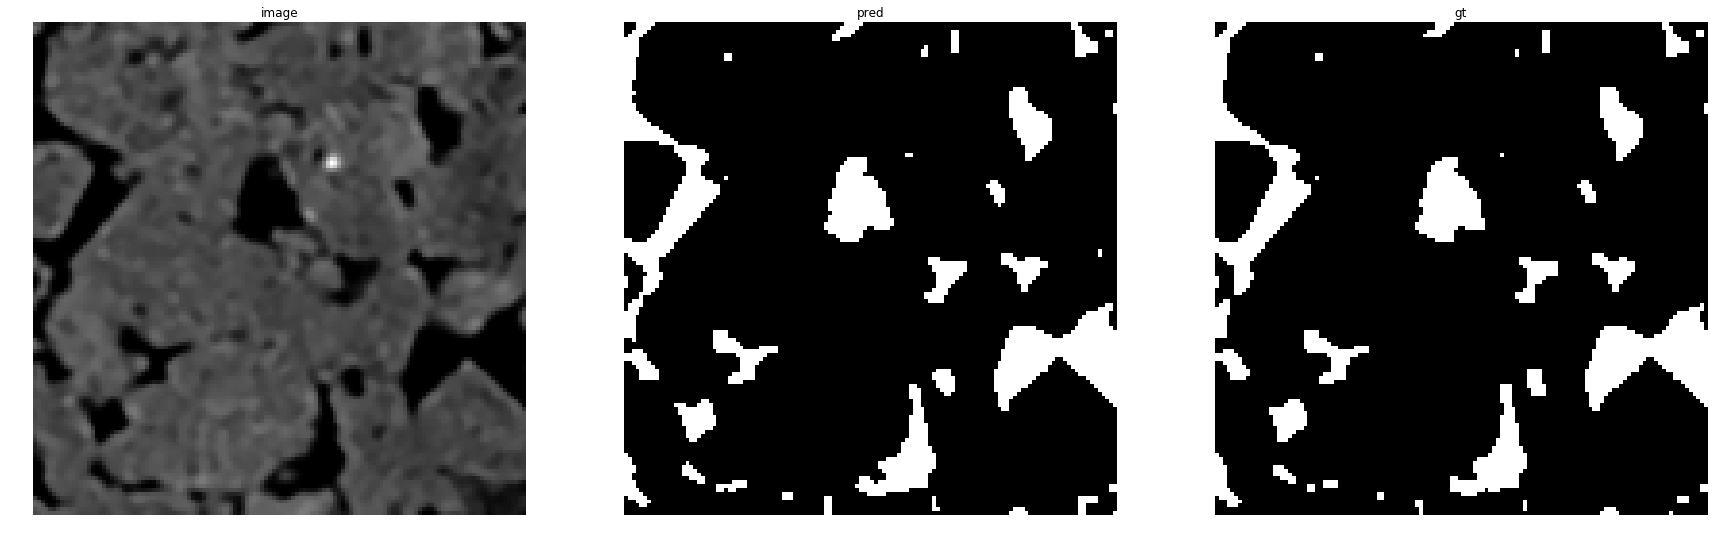

accuracy    : 0.9932861328125
precision   : 0.9632558139534884
recall      : 0.9852521408182683
f1          : 0.9741298212605833
pr_auc      : 0.9984047630412861
iou         : 0.9495644199908299


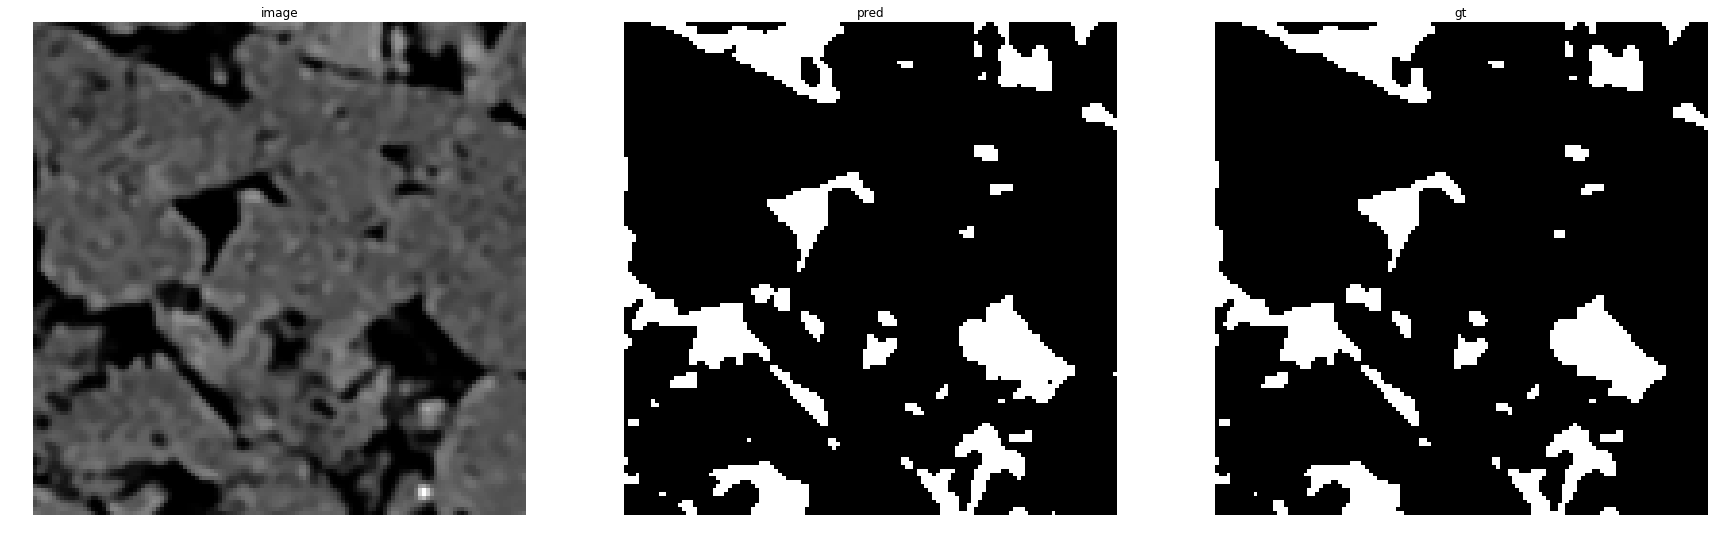

accuracy    : 0.9913330078125
precision   : 0.958664546899841
recall      : 0.9844897959183674
f1          : 0.9714055577929924
pr_auc      : 0.9975475115728326
iou         : 0.9444009397024276


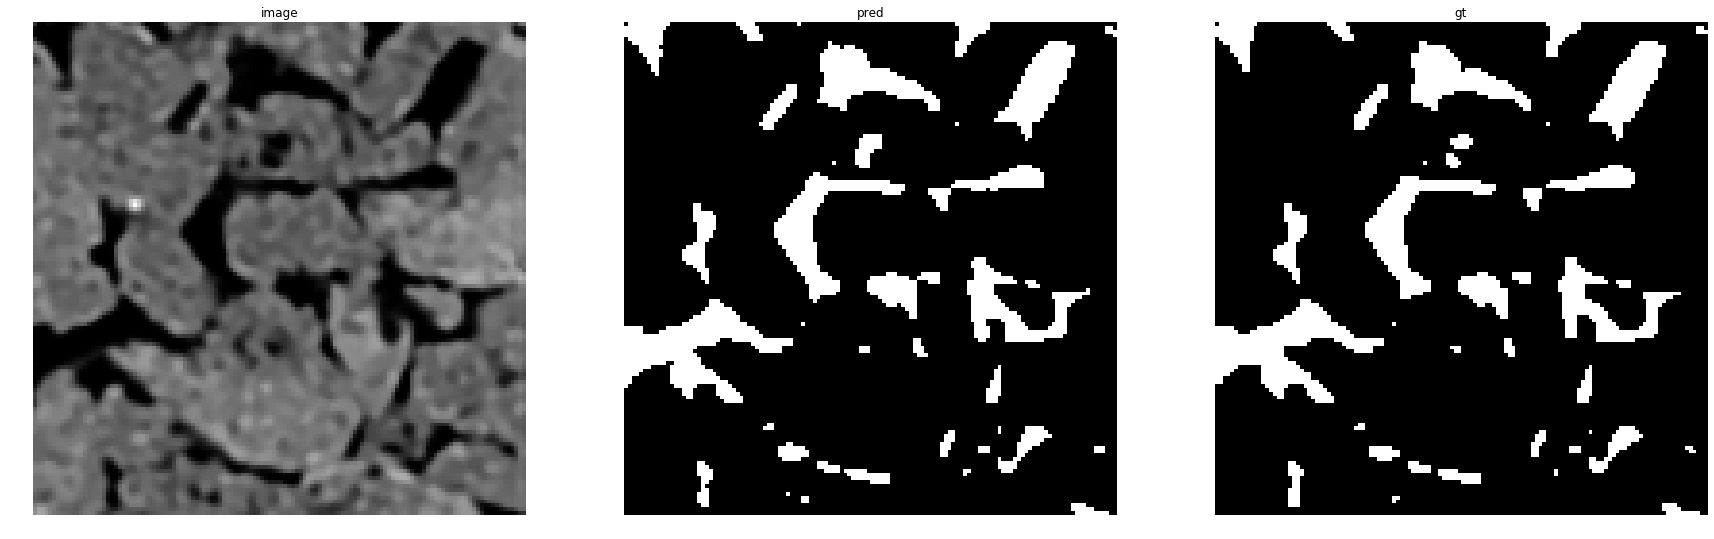

accuracy    : 0.99163818359375
precision   : 0.956173619890434
recall      : 0.9856646394439618
f1          : 0.9706951871657753
pr_auc      : 0.9976229922904652
iou         : 0.9430590191188695


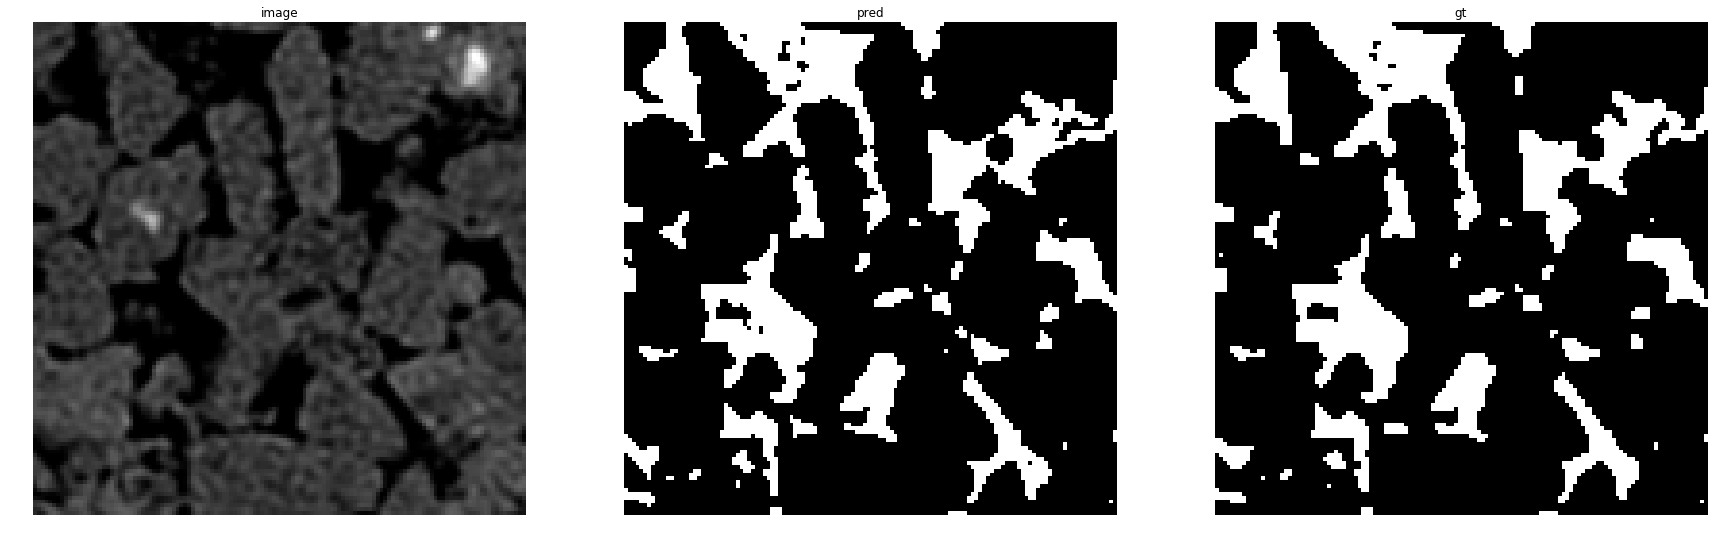

accuracy    : 0.98187255859375
precision   : 0.956461835216313
recall      : 0.9614958448753462
f1          : 0.9589722337339411
pr_auc      : 0.9945897705761487
iou         : 0.9211783439490446


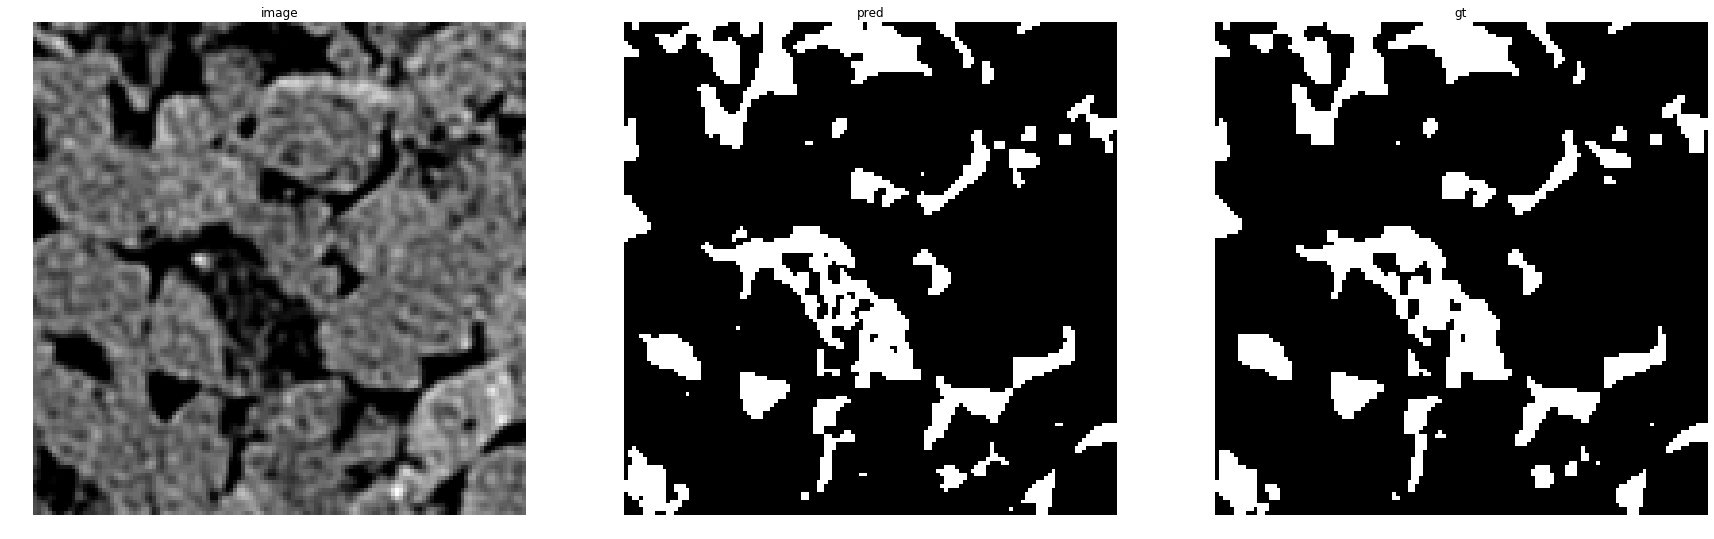

accuracy    : 0.9810791015625
precision   : 0.9457181389076197
recall      : 0.9495599187542315
f1          : 0.9476351351351352
pr_auc      : 0.9914333135415268
iou         : 0.9004815409309791


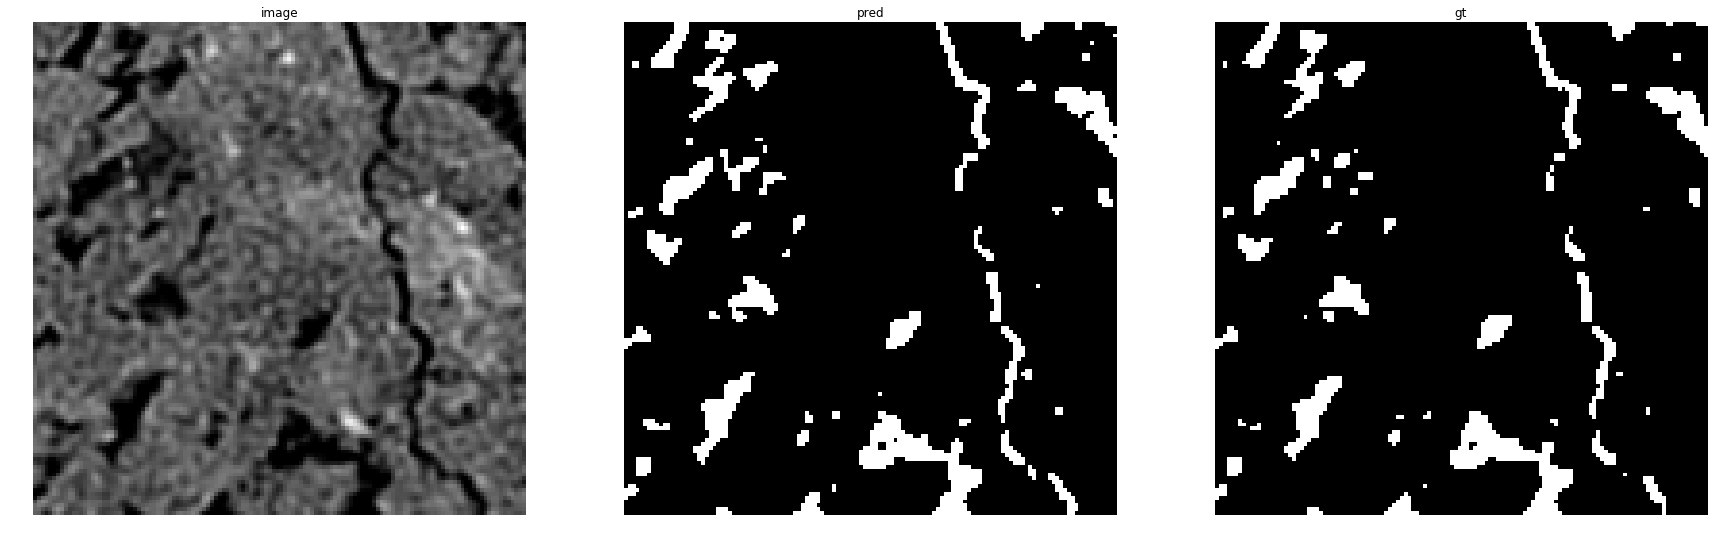

accuracy    : 0.985107421875
precision   : 0.8857319332921556
recall      : 0.9604822505023443
f1          : 0.9215938303341902
pr_auc      : 0.9844997666727094
iou         : 0.8545887961859356


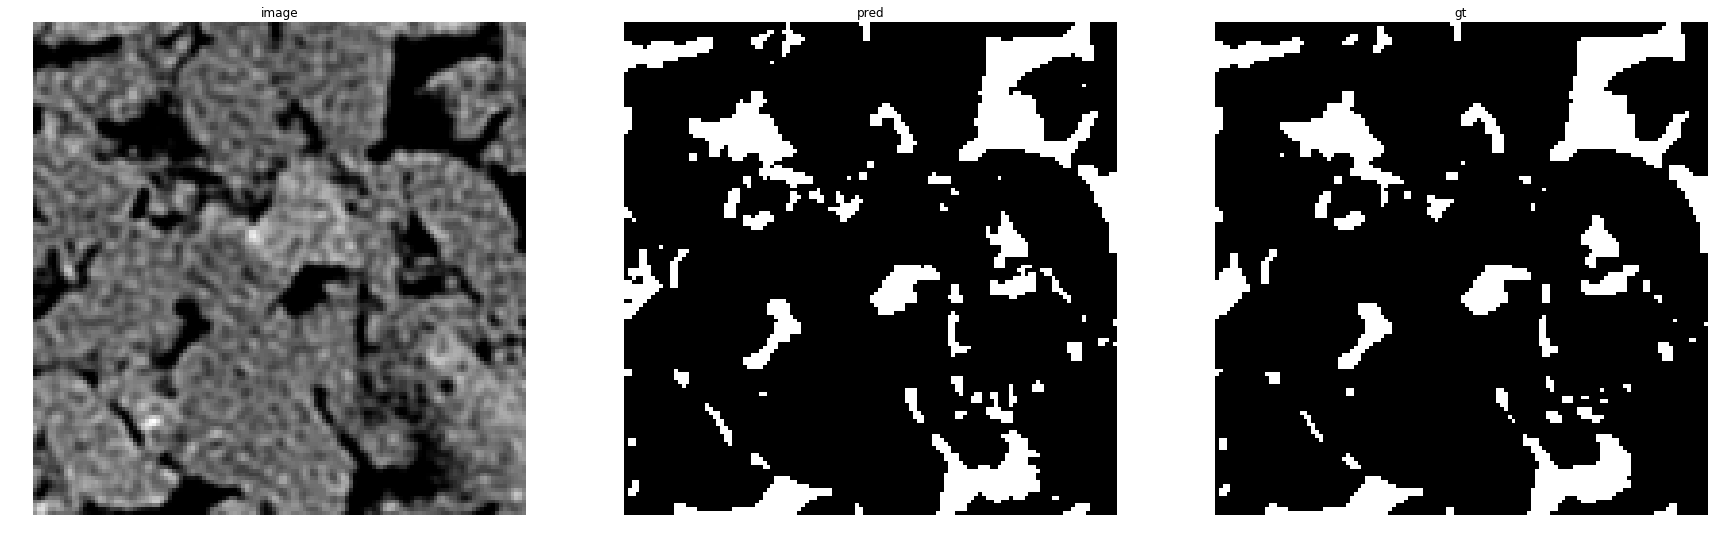

accuracy    : 0.9793701171875
precision   : 0.9131274131274131
recall      : 0.9543987086359967
f1          : 0.9333070244672453
pr_auc      : 0.9885489521678242
iou         : 0.8749537550869404


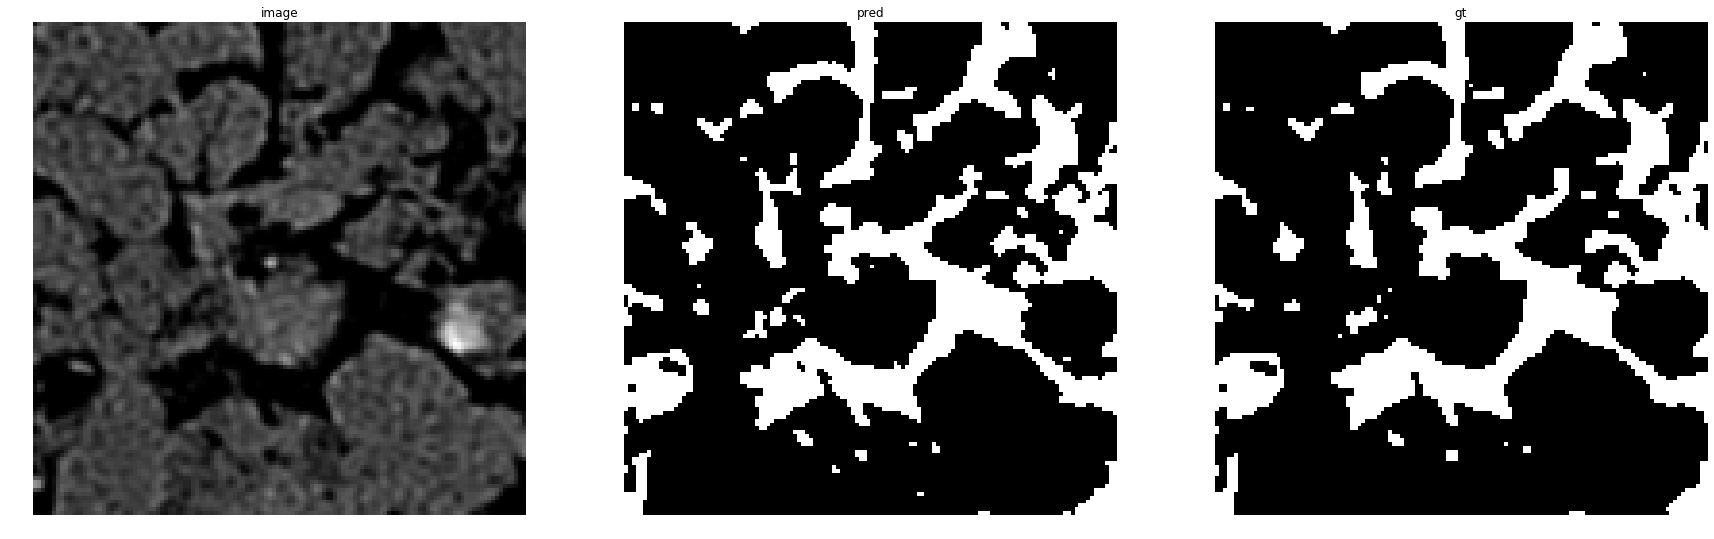

accuracy    : 0.97802734375
precision   : 0.9476640285933112
recall      : 0.9599172485130593
f1          : 0.9537512846865366
pr_auc      : 0.9937070570984959
iou         : 0.9115913555992141


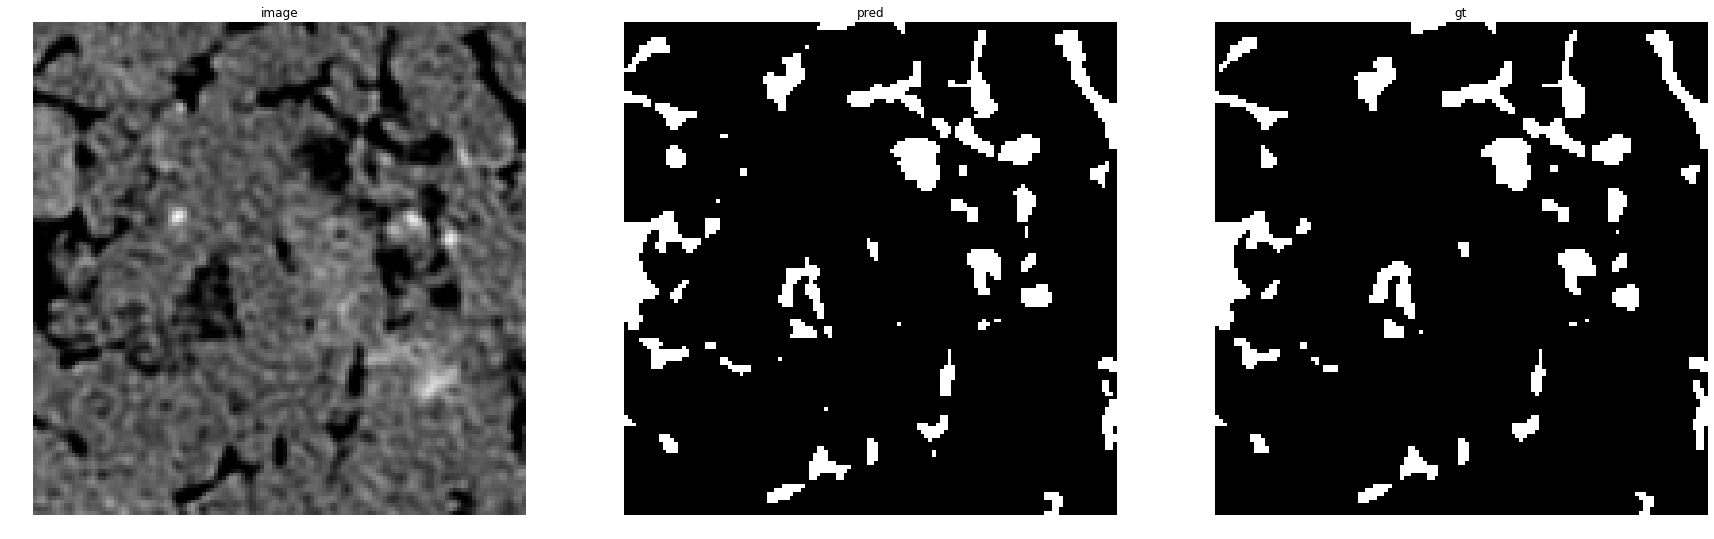

accuracy    : 0.98577880859375
precision   : 0.911136757068667
recall      : 0.9523522316043426
f1          : 0.9312887053966382
pr_auc      : 0.9861962660040976
iou         : 0.8714128035320088


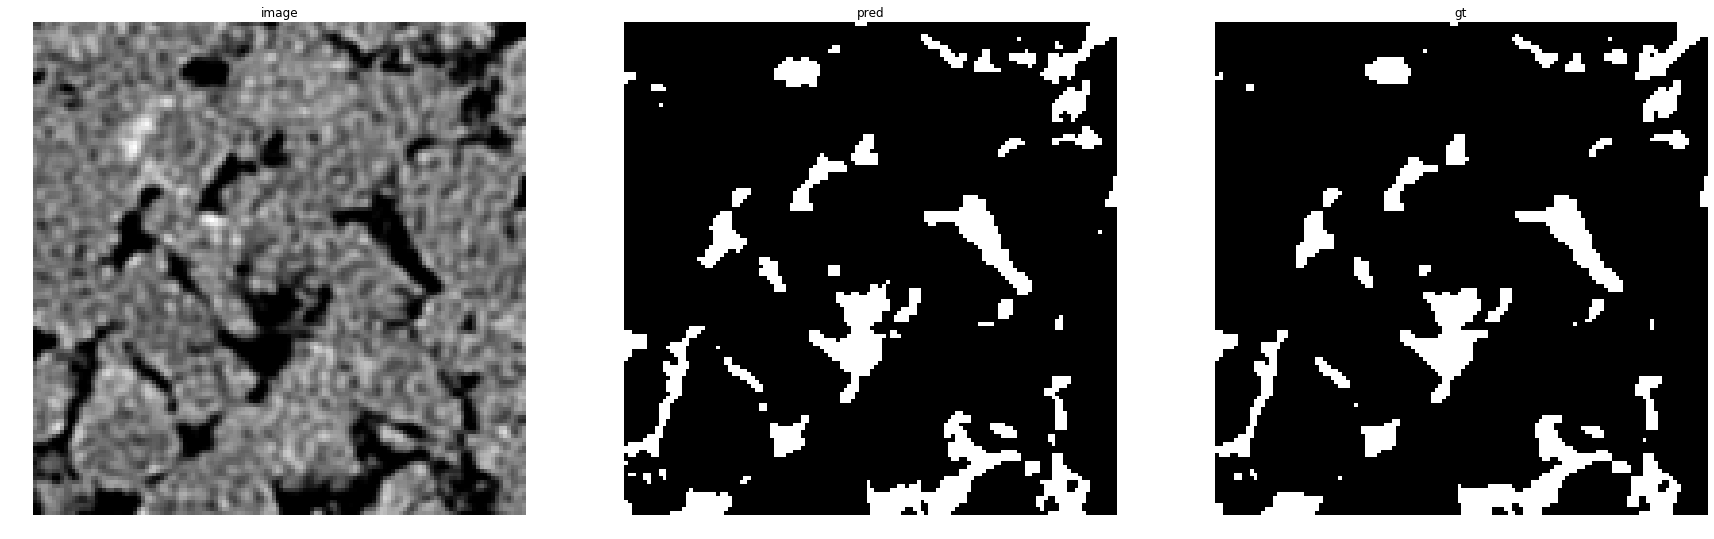

accuracy    : 0.982177734375
precision   : 0.9120151371807
recall      : 0.9478859390363815
f1          : 0.9296046287367407
pr_auc      : 0.9867013491539586
iou         : 0.8684684684684685


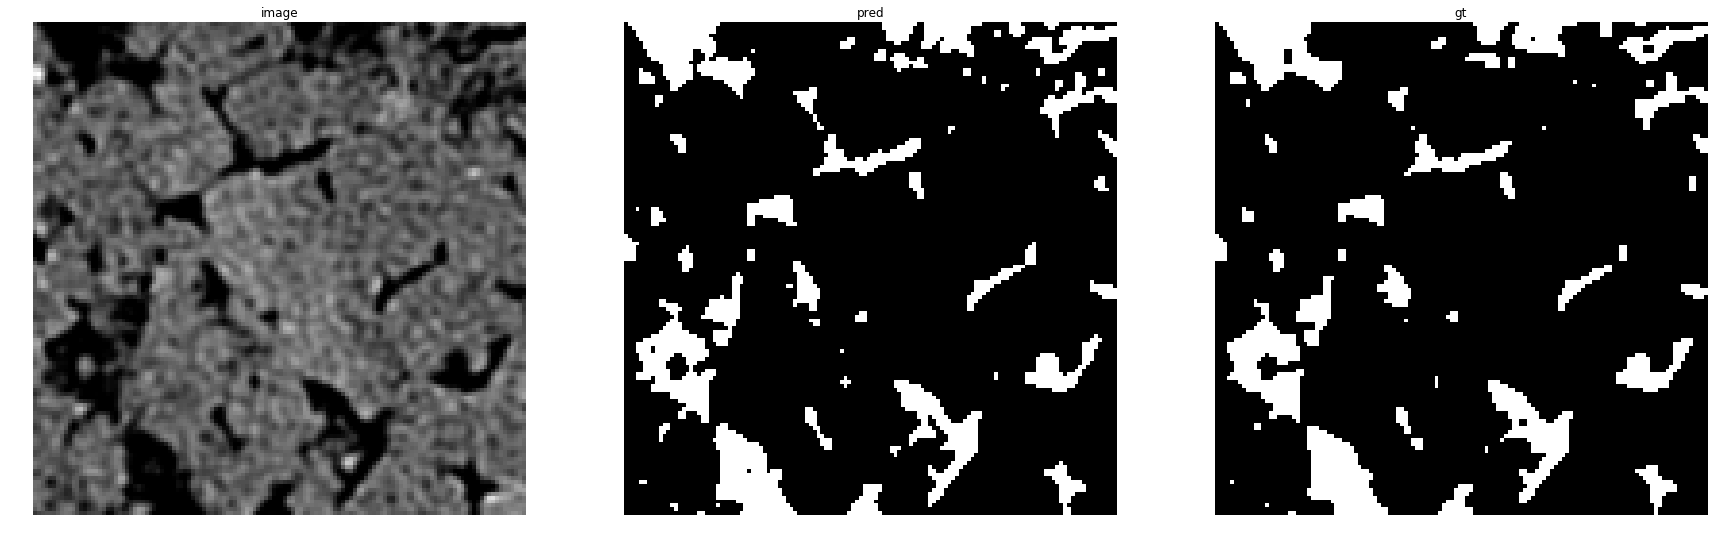

accuracy    : 0.980712890625
precision   : 0.9169749280723387
recall      : 0.9513859275053305
f1          : 0.9338635412306404
pr_auc      : 0.9880052826077445
iou         : 0.8759324695720455


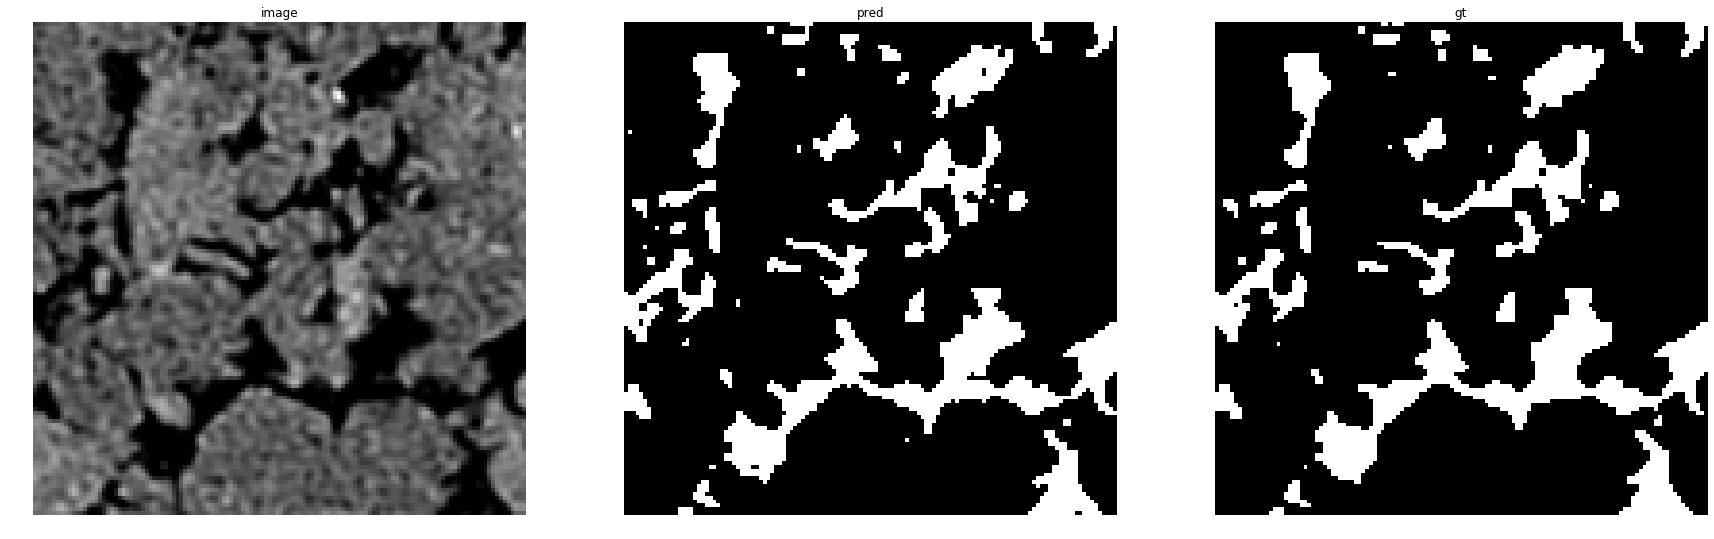

accuracy    : 0.98388671875
precision   : 0.9542036910457963
recall      : 0.9555099247091033
f1          : 0.9548563611491109
pr_auc      : 0.9929288599971783
iou         : 0.9136125654450262


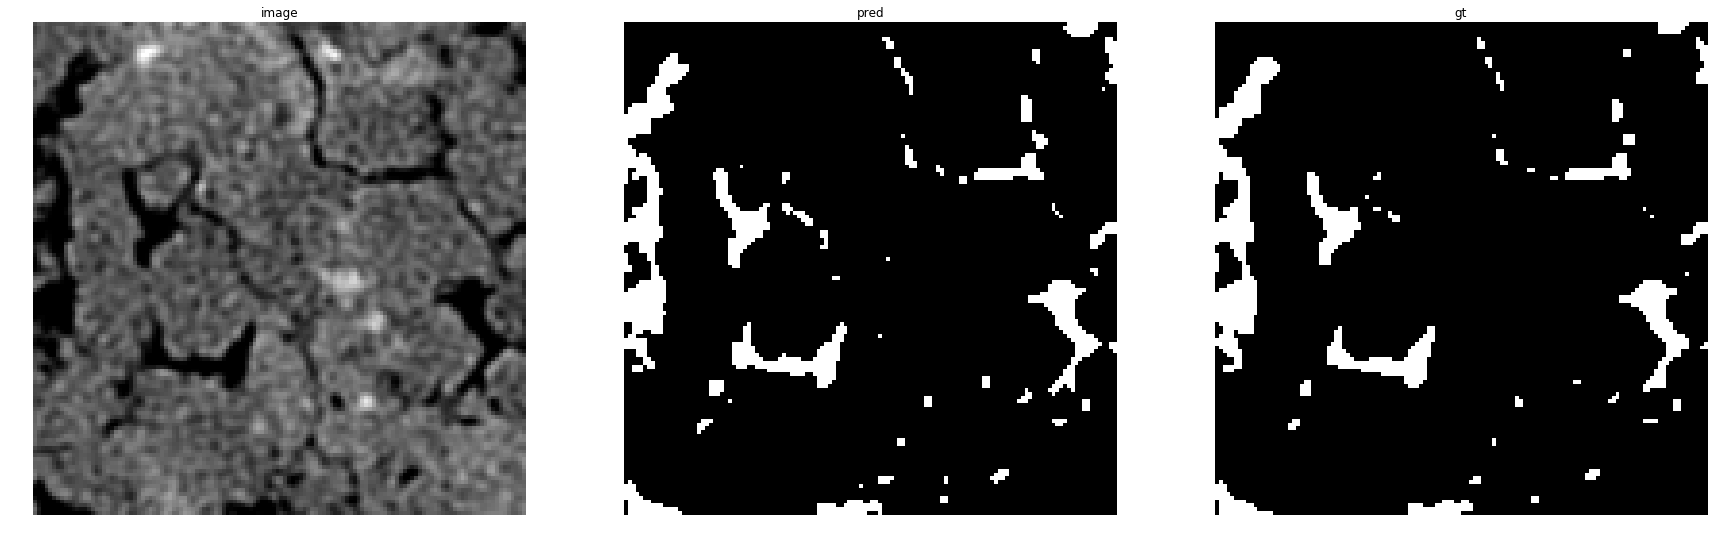

accuracy    : 0.98675537109375
precision   : 0.8879837067209776
recall      : 0.961764705882353
f1          : 0.92340275326509
pr_auc      : 0.9884077468387107
iou         : 0.8577049180327869


In [27]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [28]:
stack_name = 'carbRNF'

In [29]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 688.33it/s]
100%|██████████| 700/700 [00:07<00:00, 97.11it/s] 


In [30]:
predicted_stack = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 241701.30it/s]
25200it [02:03, 204.55it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3233.36it/s]


In [31]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack.preds, 
                                    mode='stack')))

accuracy    : 0.977205
precision   : 0.865103
recall      : 0.947591
f1          : 0.904470
pr_auc      : 0.979691
iou         : 0.825600
